**TRABAJO FINAL PROYECTO DE OPEN DATA I**

En esta competencia, Expedia nos desafía a contextualizar los datos de los clientes y predecir la probabilidad de que un usuario se aloje en 100 grupos de hoteles diferentes.

Expedia está interesado en predecir qué grupo de hoteles va a reservar un usuario.

site_name (Identificación del punto de venta de Expedia)
posa_continent (ID del continente asociado)
user_location_country (ID del país donde está el cliente)
user_location_region (ID de la región donde está el cliente)
user_location_city (ID de la ciudad donde está el cliente)
orig_destination_distance (Distencia entre el cliente y el hotel en el momento de la búsqueda)
user_id (ID del usuario)
is_mobile (1-cuando se conecto desde el móvil)
is_package (1-si la reserva se generó como parte de un paquete (con vuelo))
channel (canal de marketing)
srch_ci (cadena de fecha de registro)
srch_co (cadena de fecha de pago)
srch_adults_cnt (número de adultos especificados en la habitación)
srch_children_cnt (número de niños (ocupación extra) especificados en la habitación)
srch_rm_cnt (número de habitaciones especificados en la búsqueda)
srch_destination_id (ID del destino donde se realizó la busqueda del hotel)
srch_destination_type_id (ID del tipo de destino)
hotel_continent (continente del hotel)
hotel_country (país del hotel)
hotel_market (mercado del hotel)
is_booking (1- si es una reserva, 0- si es un click)
cnt (número de eventos similares en el contexto de la misma sesión de usuario)
hotel_cluster (ID de un grupo de hoteles)

A continuación lo que hacemos es importar todo aquello que vamos a utilizar posteriormente para los códigos.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pylab import *

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Una vez importado todo, tenemos que cargar todos los datos que, en este caso, expedia nos proporciona.
Para ello es necesario cargar (en nuestro caso) el documento excel que nos proporcionaba en Python, para ello hemos de 
convertirlo en un documento .csv.
Una vez subido a Python lo cargamos en nuestro notebook. Para ello, tenemos que saber la dirección correcta en la que hemos
cargado nuestro archivo

In [4]:
pd.options.display.max_columns = None
pd.options.display.max_rows =None

In [5]:
myData = pd.read_csv('./datos/train.csv')
myData.head()

date_time  site_name  posa_continent  user_location_country  \
0  2014-08-11 07:46:59          2               3                     66   
1  2014-08-11 08:22:12          2               3                     66   
2  2014-08-11 08:24:33          2               3                     66   
3  2014-08-09 18:05:16          2               3                     66   
4  2014-08-09 18:08:18          2               3                     66   

   user_location_region  user_location_city  orig_destination_distance  \
0                   348               48862                  2234.2641   
1                   348               48862                  2234.2641   
2                   348               48862                  2234.2641   
3                   442               35390                   913.1932   
4                   442               35390                   913.6259   

   user_id  is_mobile  is_package  channel     srch_ci     srch_co  \
0       12          0           1        9  2014-08-27  2014-08-31   
1       12          0           1        9  2014-08-29  2014-09-02   
2       12          0           0        9  2014-08-29  2014-09-02   
3       93          0           0        3  2014-11-23  2014-11-28   
4       93          0           0        3  2014-11-23  2014-11-28   

   srch_adults_cnt  srch_children_cnt  srch_rm_cnt  srch_destination_id  \
0                2                  0          1.0               8250.0   
1                2                  0          1.0               8250.0   
2                2                  0          1.0               8250.0   
3                2                  0          1.0              14984.0   
4                2                  0          1.0              14984.0   

   srch_destination_type_id  is_booking  cnt  hotel_continent  hotel_country  \
0                       1.0         0.0  3.0              2.0           50.0   
1                       1.0         1.0  1.0              2.0           50.0   
2                       1.0         0.0  1.0              2.0           50.0   
3                       1.0         0.0  1.0              2.0           50.0   
4                       1.0         0.0  1.0              2.0           50.0   

   hotel_market  hotel_cluster  
0         628.0            1.0  
1         628.0            1.0  
2         628.0            1.0  
3        1457.0           80.0  
4        1457.0           21.0

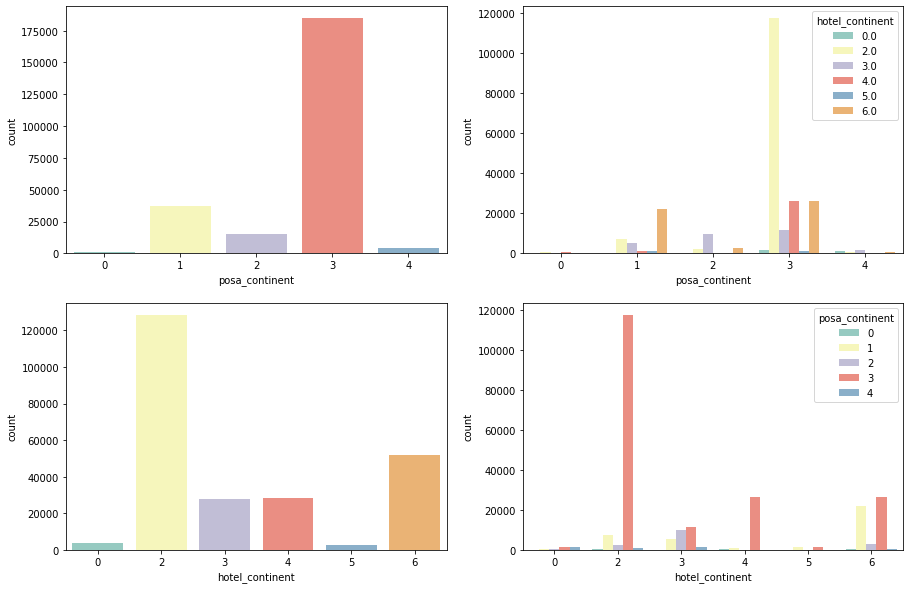

In [10]:


# Plot post_continent & hotel_continent
fig, ((axis1,axis2),(axis3,axis4)) = plt.subplots(2,2,figsize=(15,10))


sns.countplot('posa_continent', data=myData,order=[0,1,2,3,4],palette="Set3",ax=axis1)

# Plot frequency for each posa_continent decomposed by hotel_continent
sns.countplot('posa_continent', hue='hotel_continent',data=myData,order=[0,1,2,3,4],palette="Set3",ax=axis2)

# Plot frequency for each hotel_continent
sns.countplot('hotel_continent', data=myData,order=[0,2,3,4,5,6],palette="Set3",ax=axis3)

# Plot frequency for each hotel_continent decomposed by posa_continent
sns.countplot('hotel_continent', hue='posa_continent', data=myData, order=[0,2,3,4,5,6],palette="Set3",ax=axis4)

In [8]:
myData['date'] = pd.to_datetime(myData['date_time'])
myData['date'] = myData['date'].dt.date
myData['month-year'] = pd.to_datetime(myData['date']).dt.to_period('M')
myData['hours'] = pd.to_datetime(myData['date_time'])
myData['hours'] = myData['hours'].dt.hour
myData['year'] = pd.to_datetime(myData['date']).dt.to_period('Y')
myData['month'] = pd.to_datetime(myData['date']).dt.to_period('M')
myData['mes'] = pd.to_datetime(myData['date_time'])
myData['mes'] = myData['mes'].dt.month
myData = myData.sort_values(by = 'month-year')
myData.head()

date_time  site_name  posa_continent  user_location_country  \
101940  2013-01-14 09:57:25          2               3                     66   
142252  2013-01-29 12:20:45         37               1                     69   
142253  2013-01-29 12:30:08         37               1                     69   
142254  2013-01-29 12:30:48         37               1                     69   
142255  2013-01-29 13:11:18         37               1                     69   

        user_location_region  user_location_city  orig_destination_distance  \
101940                   442               35390                   799.9374   
142252                   908               28451                        NaN   
142253                   908               28451                        NaN   
142254                   908               28451                        NaN   
142255                   908               28451                        NaN   

        user_id  is_mobile  is_package  channel     srch_ci     srch_co  \
101940   397128          0           1        0  2013-03-10  2013-03-15   
142252   552136          0           0        9  2013-03-25  2013-03-28   
142253   552136          0           0        9  2013-03-25  2013-03-28   
142254   552136          0           0        9  2013-03-25  2013-03-28   
142255   552136          0           1        5  2013-02-08  2013-02-11   

        srch_adults_cnt  srch_children_cnt  srch_rm_cnt  srch_destination_id  \
101940                3                  2          1.0               8791.0   
142252                2                  0          1.0               8238.0   
142253                2                  0          1.0               8238.0   
142254                2                  0          1.0               8238.0   
142255                2                  0          1.0               8213.0   

        srch_destination_type_id  is_booking  cnt  hotel_continent  \
101940                       1.0         0.0  1.0              4.0   
142252                       1.0         0.0  1.0              6.0   
142253                       1.0         0.0  1.0              6.0   
142254                       1.0         0.0  1.0              6.0   
142255                       1.0         0.0  2.0              6.0   

        hotel_country  hotel_market  hotel_cluster        date month-year  \
101940            8.0         110.0           83.0  2013-01-14    2013-01   
142252           31.0         155.0           42.0  2013-01-29    2013-01   
142253           31.0         155.0           15.0  2013-01-29    2013-01   
142254           31.0         155.0            5.0  2013-01-29    2013-01   
142255           68.0         275.0           46.0  2013-01-29    2013-01   

        hours  year    month  mes  
101940      9  2013  2013-01    1  
142252     12  2013  2013-01    1  
142253     12  2013  2013-01    1  
142254     12  2013  2013-01    1  
142255     13  2013  2013-01    1

In [10]:
myData['date'] = pd.to_datetime(myData['date_time'])
myData['date'] = myData['date'].dt.date
myData['month-year'] = pd.to_datetime(myData['date']).dt.to_period('M')
myData['mes'] = pd.to_datetime(myData['date_time'])
myData['mes'] = myData['mes'].dt.month
myData['year'] = pd.to_datetime(myData['date']).dt.to_period('Y')
myData = myData.sort_values(by = 'month-year')
myData.head()

date_time  site_name  posa_continent  user_location_country  \
101940  2013-01-14 09:57:25          2               3                     66   
142252  2013-01-29 12:20:45         37               1                     69   
142253  2013-01-29 12:30:08         37               1                     69   
142254  2013-01-29 12:30:48         37               1                     69   
142255  2013-01-29 13:11:18         37               1                     69   

        user_location_region  user_location_city  orig_destination_distance  \
101940                   442               35390                   799.9374   
142252                   908               28451                        NaN   
142253                   908               28451                        NaN   
142254                   908               28451                        NaN   
142255                   908               28451                        NaN   

        user_id  is_mobile  is_package  channel     srch_ci     srch_co  \
101940   397128          0           1        0  2013-03-10  2013-03-15   
142252   552136          0           0        9  2013-03-25  2013-03-28   
142253   552136          0           0        9  2013-03-25  2013-03-28   
142254   552136          0           0        9  2013-03-25  2013-03-28   
142255   552136          0           1        5  2013-02-08  2013-02-11   

        srch_adults_cnt  srch_children_cnt  srch_rm_cnt  srch_destination_id  \
101940                3                  2          1.0               8791.0   
142252                2                  0          1.0               8238.0   
142253                2                  0          1.0               8238.0   
142254                2                  0          1.0               8238.0   
142255                2                  0          1.0               8213.0   

        srch_destination_type_id  is_booking  cnt  hotel_continent  \
101940                       1.0         0.0  1.0              4.0   
142252                       1.0         0.0  1.0              6.0   
142253                       1.0         0.0  1.0              6.0   
142254                       1.0         0.0  1.0              6.0   
142255                       1.0         0.0  2.0              6.0   

        hotel_country  hotel_market  hotel_cluster        date month-year  \
101940            8.0         110.0           83.0  2013-01-14    2013-01   
142252           31.0         155.0           42.0  2013-01-29    2013-01   
142253           31.0         155.0           15.0  2013-01-29    2013-01   
142254           31.0         155.0            5.0  2013-01-29    2013-01   
142255           68.0         275.0           46.0  2013-01-29    2013-01   

        mes  year  
101940    1  2013  
142252    1  2013  
142253    1  2013  
142254    1  2013  
142255    1  2013

In [ ]:
condiciones = [(datos.eventAccel == 0) & (datos.eventBrake == 0),
               (datos.eventAccel > 0) & (datos.eventBrake == 0),
               (datos.eventAccel == 0) & (datos.eventBrake > 0),
               (datos.eventAccel > 0) & (datos.eventBrake > 0)
               ]
elecciones = np.array((0, 1, 2, 3), dtype="int8")
datos["Categoría"] = np.select(condiciones, elecciones, -1)

In [16]:
condiciones = [(myData.srch_adults_cnt == 0) & (myData.srch_children_cnt == 0),
              (myData.srch_adults_cnt == 0) & (myData.srch_children_cnt == 1),
              (myData.srch_adults_cnt == 0) & (myData.srch_children_cnt == 2),
              (myData.srch_adults_cnt == 0) & (myData.srch_children_cnt == 3),
              (myData.srch_adults_cnt == 0) & (myData.srch_children_cnt == 4),
              (myData.srch_adults_cnt == 0) & (myData.srch_children_cnt == 5),
              (myData.srch_adults_cnt == 0) & (myData.srch_children_cnt == 6),
              (myData.srch_adults_cnt == 0) & (myData.srch_children_cnt == 7),
              #(myData.srch_adults_cnt == 0) & (myData.srch_children_cnt == 8),
             # (myData.srch_adults_cnt == 0) & (myData.srch_children_cnt == 9),
              (myData.srch_adults_cnt == 1) & (myData.srch_children_cnt == 0),
              (myData.srch_adults_cnt == 1) & (myData.srch_children_cnt == 1),
              (myData.srch_adults_cnt == 1) & (myData.srch_children_cnt == 2),
              (myData.srch_adults_cnt == 1) & (myData.srch_children_cnt == 3),
              (myData.srch_adults_cnt == 1) & (myData.srch_children_cnt == 4),
              (myData.srch_adults_cnt == 1) & (myData.srch_children_cnt == 5),
              (myData.srch_adults_cnt == 1) & (myData.srch_children_cnt == 6),
              (myData.srch_adults_cnt == 1) & (myData.srch_children_cnt == 7),
            #  (myData.srch_adults_cnt == 1) & (myData.srch_children_cnt == 8),
             # (myData.srch_adults_cnt == 1) & (myData.srch_children_cnt == 9),
              (myData.srch_adults_cnt == 2) & (myData.srch_children_cnt == 0),
              (myData.srch_adults_cnt == 2) & (myData.srch_children_cnt == 1),
              (myData.srch_adults_cnt == 2) & (myData.srch_children_cnt == 2),
              (myData.srch_adults_cnt == 2) & (myData.srch_children_cnt == 3),
              (myData.srch_adults_cnt == 2) & (myData.srch_children_cnt == 4),
              (myData.srch_adults_cnt == 2) & (myData.srch_children_cnt == 5),
              (myData.srch_adults_cnt == 2) & (myData.srch_children_cnt == 6),
              (myData.srch_adults_cnt == 2) & (myData.srch_children_cnt == 7),
              #(myData.srch_adults_cnt == 2) & (myData.srch_children_cnt == 8),
              #(myData.srch_adults_cnt == 2) & (myData.srch_children_cnt == 9),
              (myData.srch_adults_cnt == 3) & (myData.srch_children_cnt == 0),
              (myData.srch_adults_cnt == 3) & (myData.srch_children_cnt == 1),
              (myData.srch_adults_cnt == 3) & (myData.srch_children_cnt == 2),
              (myData.srch_adults_cnt == 3) & (myData.srch_children_cnt == 3),
              (myData.srch_adults_cnt == 3) & (myData.srch_children_cnt == 4),
              (myData.srch_adults_cnt == 3) & (myData.srch_children_cnt == 5),
              (myData.srch_adults_cnt == 3) & (myData.srch_children_cnt == 6),
              (myData.srch_adults_cnt == 3) & (myData.srch_children_cnt == 7),
            #  (myData.srch_adults_cnt == 3) & (myData.srch_children_cnt == 8),
             # (myData.srch_adults_cnt == 3) & (myData.srch_children_cnt == 9),
              (myData.srch_adults_cnt == 4) & (myData.srch_children_cnt == 0),
              (myData.srch_adults_cnt == 4) & (myData.srch_children_cnt == 1),
              (myData.srch_adults_cnt == 4) & (myData.srch_children_cnt == 2),
              (myData.srch_adults_cnt == 4) & (myData.srch_children_cnt == 3),
              (myData.srch_adults_cnt == 4) & (myData.srch_children_cnt == 4),
              (myData.srch_adults_cnt == 4) & (myData.srch_children_cnt == 5),
              (myData.srch_adults_cnt == 4) & (myData.srch_children_cnt == 6),
              (myData.srch_adults_cnt == 4) & (myData.srch_children_cnt == 7),
              (myData.srch_adults_cnt == 5) & (myData.srch_children_cnt == 0),
              (myData.srch_adults_cnt == 5) & (myData.srch_children_cnt == 1),
              (myData.srch_adults_cnt == 5) & (myData.srch_children_cnt == 2),
              (myData.srch_adults_cnt == 5) & (myData.srch_children_cnt == 3),
              (myData.srch_adults_cnt == 5) & (myData.srch_children_cnt == 4),
              (myData.srch_adults_cnt == 5) & (myData.srch_children_cnt == 5),
              (myData.srch_adults_cnt == 5) & (myData.srch_children_cnt == 6),
              (myData.srch_adults_cnt == 5) & (myData.srch_children_cnt == 7),
              ]

elecciones = np.array((0, 1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47), dtype="int8")
myData["Categoría"] = np.select(condiciones, elecciones, 48)
myData.head()

date_time  site_name  posa_continent  user_location_country  \
101940  2013-01-14 09:57:25          2               3                     66   
142252  2013-01-29 12:20:45         37               1                     69   
142253  2013-01-29 12:30:08         37               1                     69   
142254  2013-01-29 12:30:48         37               1                     69   
142255  2013-01-29 13:11:18         37               1                     69   

        user_location_region  user_location_city  orig_destination_distance  \
101940                   442               35390                   799.9374   
142252                   908               28451                        NaN   
142253                   908               28451                        NaN   
142254                   908               28451                        NaN   
142255                   908               28451                        NaN   

        user_id  is_mobile  is_package  channel     srch_ci     srch_co  \
101940   397128          0           1        0  2013-03-10  2013-03-15   
142252   552136          0           0        9  2013-03-25  2013-03-28   
142253   552136          0           0        9  2013-03-25  2013-03-28   
142254   552136          0           0        9  2013-03-25  2013-03-28   
142255   552136          0           1        5  2013-02-08  2013-02-11   

        srch_adults_cnt  srch_children_cnt  srch_rm_cnt  srch_destination_id  \
101940                3                  2          1.0               8791.0   
142252                2                  0          1.0               8238.0   
142253                2                  0          1.0               8238.0   
142254                2                  0          1.0               8238.0   
142255                2                  0          1.0               8213.0   

        srch_destination_type_id  is_booking  cnt  hotel_continent  \
101940                       1.0         0.0  1.0              4.0   
142252                       1.0         0.0  1.0              6.0   
142253                       1.0         0.0  1.0              6.0   
142254                       1.0         0.0  1.0              6.0   
142255                       1.0         0.0  2.0              6.0   

        hotel_country  hotel_market  hotel_cluster        date month-year  \
101940            8.0         110.0           83.0  2013-01-14    2013-01   
142252           31.0         155.0           42.0  2013-01-29    2013-01   
142253           31.0         155.0           15.0  2013-01-29    2013-01   
142254           31.0         155.0            5.0  2013-01-29    2013-01   
142255           68.0         275.0           46.0  2013-01-29    2013-01   

        mes  year  Categoría  
101940    1  2013         26  
142252    1  2013         16  
142253    1  2013         16  
142254    1  2013         16  
142255    1  2013         16

In [32]:
condicionesTrimestre = [(myData.mes == 1) & (myData.year == 2013),
                        (myData.mes == 2) & (myData.year == 2013),
                        (myData.mes == 3) & (myData.year == 2013),
                        (myData.mes == 4) & (myData.year == 2013),
                        (myData.mes == 5) & (myData.year == 2013),
                        (myData.mes == 6) & (myData.year == 2013),
                        (myData.mes == 7) & (myData.year == 2013),
                        (myData.mes == 8) & (myData.year == 2013),
                        (myData.mes == 9) & (myData.year == 2013),
                        (myData.mes == 10) & (myData.year == 2013),
                        (myData.mes == 11) & (myData.year == 2013),
                        (myData.mes == 12) & (myData.year == 2013),
                        (myData.mes == 1) & (myData.year == 2014),
                        (myData.mes == 2) & (myData.year == 2014),
                        (myData.mes == 3) & (myData.year == 2014),
                        (myData.mes == 4) & (myData.year == 2014),
                        (myData.mes == 5) & (myData.year == 2014),
                        (myData.mes == 6) & (myData.year == 2014),
                        (myData.mes == 7) & (myData.year == 2014),
                        (myData.mes == 8) & (myData.year == 2014),
                        (myData.mes == 9) & (myData.year == 2014),
                        (myData.mes == 10) & (myData.year == 2014),
                        (myData.mes == 11) & (myData.year == 2014),
                        (myData.mes == 12) & (myData.year == 2014),
                        
             ]

eleccionesTrimestre = np.array((0,1,1,1, 1, 2,2,2,2,3,3,3, 3,4,4,4,4,5,5,5,5,6,6,6), dtype="int8")
myData["trimestre"] = np.select(condicionesTrimestre, eleccionesTrimestre, -1)
myData.head()

date_time  site_name  posa_continent  user_location_country  \
101940  2013-01-14 09:57:25          2               3                     66   
142252  2013-01-29 12:20:45         37               1                     69   
142253  2013-01-29 12:30:08         37               1                     69   
142254  2013-01-29 12:30:48         37               1                     69   
142255  2013-01-29 13:11:18         37               1                     69   

        user_location_region  user_location_city  orig_destination_distance  \
101940                   442               35390                   799.9374   
142252                   908               28451                        NaN   
142253                   908               28451                        NaN   
142254                   908               28451                        NaN   
142255                   908               28451                        NaN   

        user_id  is_mobile  is_package  channel     srch_ci     srch_co  \
101940   397128          0           1        0  2013-03-10  2013-03-15   
142252   552136          0           0        9  2013-03-25  2013-03-28   
142253   552136          0           0        9  2013-03-25  2013-03-28   
142254   552136          0           0        9  2013-03-25  2013-03-28   
142255   552136          0           1        5  2013-02-08  2013-02-11   

        srch_adults_cnt  srch_children_cnt  srch_rm_cnt  srch_destination_id  \
101940                3                  2          1.0               8791.0   
142252                2                  0          1.0               8238.0   
142253                2                  0          1.0               8238.0   
142254                2                  0          1.0               8238.0   
142255                2                  0          1.0               8213.0   

        srch_destination_type_id  is_booking  cnt  hotel_continent  \
101940                       1.0         0.0  1.0              4.0   
142252                       1.0         0.0  1.0              6.0   
142253                       1.0         0.0  1.0              6.0   
142254                       1.0         0.0  1.0              6.0   
142255                       1.0         0.0  2.0              6.0   

        hotel_country  hotel_market  hotel_cluster        date month-year  \
101940            8.0         110.0           83.0  2013-01-14    2013-01   
142252           31.0         155.0           42.0  2013-01-29    2013-01   
142253           31.0         155.0           15.0  2013-01-29    2013-01   
142254           31.0         155.0            5.0  2013-01-29    2013-01   
142255           68.0         275.0           46.0  2013-01-29    2013-01   

        mes  year  Categoría  trimestre  
101940    1  2013         26          0  
142252    1  2013         16          0  
142253    1  2013         16          0  
142254    1  2013         16          0  
142255    1  2013         16          0

In [17]:
myData.tail()

date_time  site_name  posa_continent  user_location_country  \
29039   2014-12-05 11:23:00          2               3                     66   
29040   2014-12-30 07:18:36          2               3                     66   
228736  2014-12-12 13:03:05          2               3                     66   
228734  2014-12-10 20:09:29          2               3                     66   
183760  2014-12-05 13:17:36          2               3                     66   

        user_location_region  user_location_city  orig_destination_distance  \
29039                    293               53327                    82.7942   
29040                    293               53327                   727.5369   
228736                   363               12346                   665.8626   
228734                   258               13134                   605.6988   
183760                   351               29925                   142.7902   

        user_id  is_mobile  is_package  channel     srch_ci     srch_co  \
29039    118700          0           0        2  2015-03-12  2015-03-13   
29040    118700          0           0        9  2015-06-27  2015-07-04   
228736   838506          0           0        9  2015-01-08  2015-01-11   
228734   838506          0           0        9  2015-01-08  2015-01-11   
183760   672464          0           0        9  2014-12-08  2014-12-11   

        srch_adults_cnt  srch_children_cnt  srch_rm_cnt  srch_destination_id  \
29039                 2                  0          1.0              27320.0   
29040                 2                  2          1.0               4454.0   
228736                1                  0          1.0              12177.0   
228734                1                  0          1.0              12177.0   
183760                1                  0          1.0              27351.0   

        srch_destination_type_id  is_booking  cnt  hotel_continent  \
29039                        6.0         0.0  1.0              2.0   
29040                        3.0         0.0  1.0              2.0   
228736                       6.0         1.0  1.0              2.0   
228734                       6.0         0.0  1.0              2.0   
183760                       6.0         1.0  1.0              2.0   

        hotel_country  hotel_market  hotel_cluster        date month-year  \
29039            50.0         644.0           55.0  2014-12-05    2014-12   
29040            50.0         682.0           10.0  2014-12-30    2014-12   
228736           50.0         350.0           95.0  2014-12-12    2014-12   
228734           50.0         350.0           95.0  2014-12-10    2014-12   
183760           50.0         638.0           95.0  2014-12-05    2014-12   

        mes  year  Categoría  
29039    12  2014         16  
29040    12  2014         18  
228736   12  2014          8  
228734   12  2014          8  
183760   12  2014          8

In [21]:
myData['year'].describe()

count     243445
unique         2
top         2014
freq      174072
Name: year, dtype: object

In [ ]:
myData['Agrupacion']= pd.to_srch_adults_cnt(myDate['srch_adults_cnt'] = 0, myDate['srch_children_cnt'] = )

In [25]:
myData.fecha = pd.to_datetime(myData.date)
myData["trimestre"] = myData.fecha.dt.datetime + (myData.date.dt.mes<=3)


AttributeError: 'DatetimeProperties' object has no attribute 'datetime'

In [6]:
myData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243445 entries, 0 to 243444
Data columns (total 24 columns):
date_time                    243445 non-null object
site_name                    243445 non-null int64
posa_continent               243445 non-null int64
user_location_country        243445 non-null int64
user_location_region         243445 non-null int64
user_location_city           243445 non-null int64
orig_destination_distance    157252 non-null float64
user_id                      243445 non-null int64
is_mobile                    243445 non-null int64
is_package                   243445 non-null int64
channel                      243445 non-null int64
srch_ci                      243218 non-null object
srch_co                      243218 non-null object
srch_adults_cnt              243445 non-null int64
srch_children_cnt            243445 non-null int64
srch_rm_cnt                  243444 non-null float64
srch_destination_id          243444 non-null float64
srch_destinat

D:\Open Data\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Unrecognized location 'top_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if sys.path[0] == '':


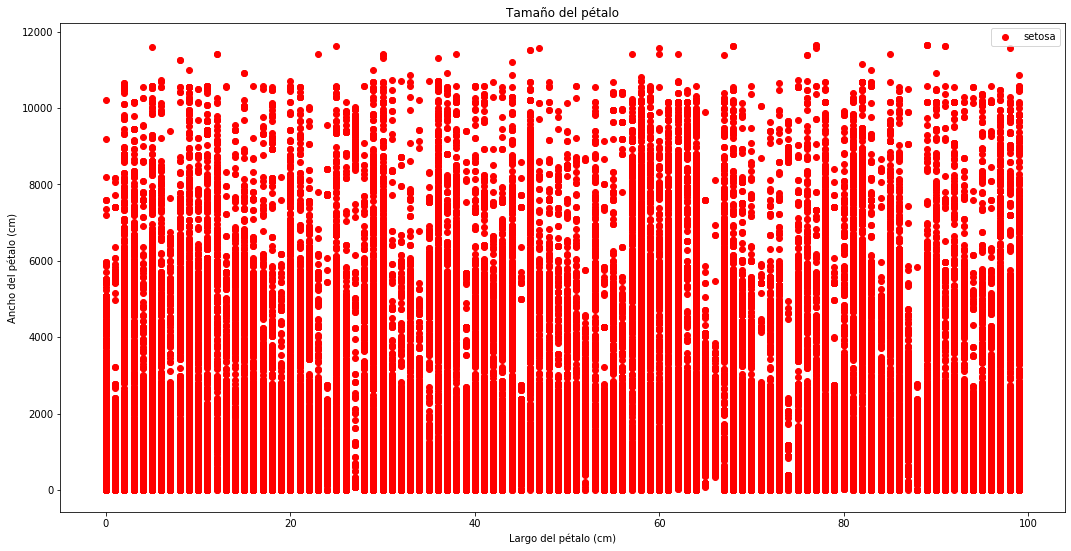

In [3]:

# Ejemplo diagrama de dispersion entre Petal.Length y Petal.Width
plt.figure(figsize=(18,9))
plt.scatter(myData['hotel_cluster'], myData['orig_destination_distance'], 
            c='red', label='setosa')
#plt.scatter(versicolor['hotel_cluster'], versicolor['orig_destination_distance'], 
 #           c='green', label='versicolor')
#plt.scatter(virginica['hotel_cluster'], virginica['orig_destination_distance'], 
#            c='blue', label='virginica')
plt.title('Tamaño del pétalo')
plt.xlabel('Largo del pétalo (cm)')
plt.ylabel('Ancho del pétalo (cm)')
plt.legend(loc='top_left')
plt.show()

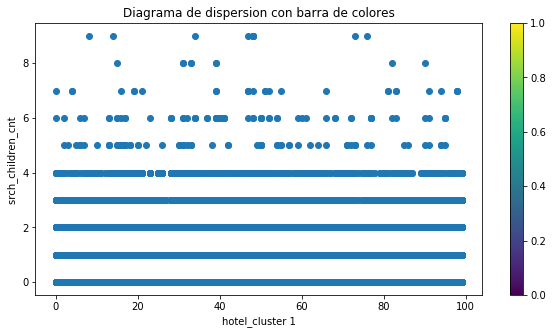

In [6]:
fig, ax1 = plt.subplots(nrows = 1, figsize=(10,5))   
sc = ax1.scatter(myData["hotel_cluster"], myData["srch_children_cnt"], marker = 'o')  
ax1.set_title('Diagrama de dispersion con barra de colores')
ax1.set_xlabel('hotel_cluster 1')
ax1.set_ylabel('srch_children_cnt ') 
# expresiones regulares; patron quer nos permite encontrar caracteres sixtrix.es y regexr \w{1,20}[.]\w{1,20}[@]\w{1,20}(.es)
plt.colorbar(sc)

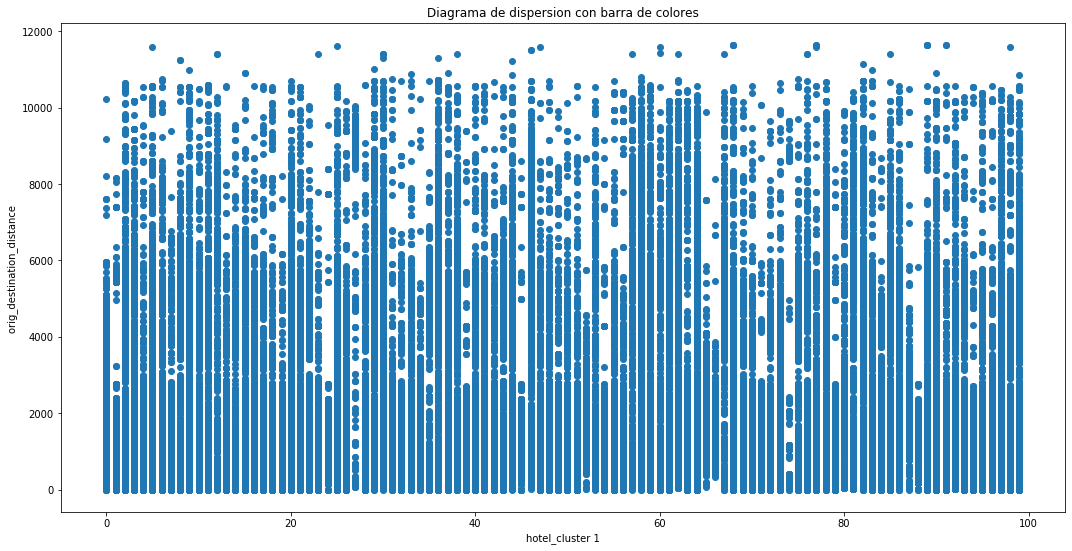

In [10]:
fig, ax1 = plt.subplots(nrows = 1, figsize=(18,9))   
sc = ax1.scatter(myData["hotel_cluster"], myData["orig_destination_distance"], marker = 'o')  
ax1.set_title('Diagrama de dispersion con barra de colores')
ax1.set_xlabel('hotel_cluster 1')
ax1.set_ylabel('orig_destination_distance ') 
# expresiones regulares; patron quer nos permite encontrar caracteres sixtrix.es y regexr \w{1,20}[.]\w{1,20}[@]\w{1,20}(.es)
plt.show(sc)

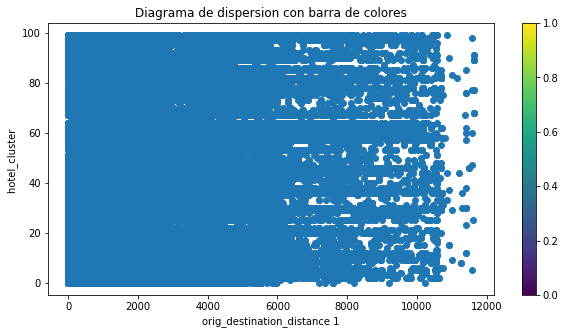

In [8]:
fig, ax1 = plt.subplots(nrows = 1, figsize=(10,5))   
sc = ax1.scatter(myData["orig_destination_distance"], myData["hotel_cluster"], marker = 'o')  
ax1.set_title('Diagrama de dispersion con barra de colores')
ax1.set_xlabel('orig_destination_distance 1')
ax1.set_ylabel('hotel_cluster ') 
# expresiones regulares; patron quer nos permite encontrar caracteres sixtrix.es y regexr \w{1,20}[.]\w{1,20}[@]\w{1,20}(.es)
plt.colorbar(sc)

Una vez cargado todo nuestros datos en el notebook, pedimos que solo nos muestre los 5 primeros

In [6]:
myData.head()

date_time  site_name  posa_continent  user_location_country  \
0  2014-08-11 07:46:59          2               3                     66   
1  2014-08-11 08:22:12          2               3                     66   
2  2014-08-11 08:24:33          2               3                     66   
3  2014-08-09 18:05:16          2               3                     66   
4  2014-08-09 18:08:18          2               3                     66   

   user_location_region  user_location_city  orig_destination_distance  \
0                   348               48862                  2234.2641   
1                   348               48862                  2234.2641   
2                   348               48862                  2234.2641   
3                   442               35390                   913.1932   
4                   442               35390                   913.6259   

   user_id  is_mobile  is_package  ...  srch_children_cnt srch_rm_cnt  \
0       12          0           1  ...                  0         1.0   
1       12          0           1  ...                  0         1.0   
2       12          0           0  ...                  0         1.0   
3       93          0           0  ...                  0         1.0   
4       93          0           0  ...                  0         1.0   

  srch_destination_id  srch_destination_type_id  is_booking  cnt  \
0              8250.0                       1.0         0.0  3.0   
1              8250.0                       1.0         1.0  1.0   
2              8250.0                       1.0         0.0  1.0   
3             14984.0                       1.0         0.0  1.0   
4             14984.0                       1.0         0.0  1.0   

   hotel_continent  hotel_country  hotel_market  hotel_cluster  
0              2.0           50.0         628.0            1.0  
1              2.0           50.0         628.0            1.0  
2              2.0           50.0         628.0            1.0  
3              2.0           50.0        1457.0           80.0  
4              2.0           50.0        1457.0           21.0  

[5 rows x 24 columns]

In [1]:
myData.info()

NameError: name 'myData' is not defined

Aqui hacemos un ejemplo de algo que aplicamos mas abajo para ver si funciona con los 50 primeros datos

In [8]:

#if elem !=1 
# you can define a function like this or use a lambda function    contar nulos de un valor de una columna que se repite en otra != 1 and elem != 2 and elem != 3
def count_even_numbers(series):
  return len([elem for elem in series if elem * 1 != elem])

myData.head(50).groupby('user_location_country')['orig_destination_distance'].apply(count_even_numbers).reset_index(name='num_even_numbers')

user_location_country  num_even_numbers
0                     66                13
1                    195                24

Para conocer un poco más nuestros datos vamos a cargar solo aquellos que cumplan una cierta condición impuesta por nosotros;
En este caso, delimitamos todas aquellas filas donde la columna site_name (Identificación del punto de venta de Expedia) sea 
igual a 2.

In [9]:
Mascara_1 = myData.site_name == 2
myData[Mascara_1]

date_time  site_name  posa_continent  user_location_country  \
0       2014-08-11 07:46:59          2               3                     66   
1       2014-08-11 08:22:12          2               3                     66   
2       2014-08-11 08:24:33          2               3                     66   
3       2014-08-09 18:05:16          2               3                     66   
4       2014-08-09 18:08:18          2               3                     66   
5       2014-08-09 18:13:12          2               3                     66   
6       2014-07-16 09:42:23          2               3                     66   
7       2014-07-16 09:45:48          2               3                     66   
8       2014-07-16 09:52:11          2               3                     66   
9       2014-07-16 09:55:24          2               3                     66   
10      2014-07-16 10:00:06          2               3                     66   
11      2014-07-16 10:02:58          2               3                     66   
12      2014-01-17 06:24:56          2               3                     66   
13      2014-01-18 14:33:31          2               3                     66   
14      2014-01-21 06:39:08          2               3                     66   
15      2014-01-21 06:40:18          2               3                     66   
16      2014-01-22 06:10:02          2               3                     66   
17      2014-01-24 11:52:04          2               3                     66   
18      2014-01-24 17:26:24          2               3                     66   
19      2014-02-27 17:44:23          2               3                     66   
20      2014-02-27 18:01:32          2               3                     66   
21      2014-12-30 09:50:51          2               3                     66   
22      2014-12-30 09:55:43          2               3                     66   
23      2014-12-30 09:56:26          2               3                     66   
24      2014-10-22 12:20:56          2               3                     66   
25      2014-11-10 12:38:02          2               3                     66   
74      2013-02-15 13:18:43          2               3                     66   
75      2013-02-16 11:57:50          2               3                     66   
76      2013-02-16 12:03:45          2               3                     66   
77      2013-02-16 12:23:57          2               3                     66   
...                     ...        ...             ...                    ...   
243374  2014-07-28 21:17:03          2               3                     66   
243375  2014-07-28 21:18:18          2               3                     66   
243376  2014-07-28 21:23:21          2               3                     66   
243377  2014-07-29 12:53:36          2               3                     66   
243378  2014-08-12 21:01:48          2               3                     66   
243379  2014-08-12 21:02:11          2               3                     66   
243380  2014-08-12 21:08:58          2               3                     66   
243381  2014-08-12 21:24:44          2               3                     66   
243382  2014-08-21 12:38:31          2               3                     66   
243383  2014-08-25 16:12:20          2               3                     66   
243384  2014-08-30 13:18:45          2               3                     66   
243385  2014-09-02 17:43:09          2               3                     66   
243386  2014-09-14 16:58:21          2               3                     66   
243387  2014-09-24 07:00:59          2               3                     66   
243388  2014-09-28 14:16:00          2               3                     66   
243389  2014-11-01 19:56:35          2               3                     66   
243390  2014-11-08 07:50:05          2               3                     66   
243391  2014-11-08 07:51:44          2           

Otra de las cosas que nos dimos cuenta es que no solo la mayoría de los datos la columna site_name (Identificación del punto de venta de Expedia) es igual a 2 sino que tambien se cumple que la columna user_location_country (El ID del país donde se encuentra el cliente) es igual a 66 en la mayoría de las filas. 
Por lo tanto, decidimos buscar todos aquellos datos donde se cumplen las dos condiciones

In [10]:
Mascara_1 = myData.site_name == 2
Mascara_2 = myData.user_location_country == 66
myData[Mascara_1 & Mascara_2]

date_time  site_name  posa_continent  user_location_country  \
0       2014-08-11 07:46:59          2               3                     66   
1       2014-08-11 08:22:12          2               3                     66   
2       2014-08-11 08:24:33          2               3                     66   
3       2014-08-09 18:05:16          2               3                     66   
4       2014-08-09 18:08:18          2               3                     66   
5       2014-08-09 18:13:12          2               3                     66   
6       2014-07-16 09:42:23          2               3                     66   
7       2014-07-16 09:45:48          2               3                     66   
8       2014-07-16 09:52:11          2               3                     66   
9       2014-07-16 09:55:24          2               3                     66   
10      2014-07-16 10:00:06          2               3                     66   
11      2014-07-16 10:02:58          2               3                     66   
12      2014-01-17 06:24:56          2               3                     66   
13      2014-01-18 14:33:31          2               3                     66   
14      2014-01-21 06:39:08          2               3                     66   
15      2014-01-21 06:40:18          2               3                     66   
16      2014-01-22 06:10:02          2               3                     66   
17      2014-01-24 11:52:04          2               3                     66   
18      2014-01-24 17:26:24          2               3                     66   
19      2014-02-27 17:44:23          2               3                     66   
20      2014-02-27 18:01:32          2               3                     66   
21      2014-12-30 09:50:51          2               3                     66   
22      2014-12-30 09:55:43          2               3                     66   
23      2014-12-30 09:56:26          2               3                     66   
24      2014-10-22 12:20:56          2               3                     66   
25      2014-11-10 12:38:02          2               3                     66   
74      2013-02-15 13:18:43          2               3                     66   
75      2013-02-16 11:57:50          2               3                     66   
76      2013-02-16 12:03:45          2               3                     66   
77      2013-02-16 12:23:57          2               3                     66   
...                     ...        ...             ...                    ...   
243372  2014-07-28 21:03:18          2               3                     66   
243373  2014-07-28 21:10:36          2               3                     66   
243374  2014-07-28 21:17:03          2               3                     66   
243375  2014-07-28 21:18:18          2               3                     66   
243376  2014-07-28 21:23:21          2               3                     66   
243377  2014-07-29 12:53:36          2               3                     66   
243378  2014-08-12 21:01:48          2               3                     66   
243379  2014-08-12 21:02:11          2               3                     66   
243380  2014-08-12 21:08:58          2               3                     66   
243381  2014-08-12 21:24:44          2               3                     66   
243382  2014-08-21 12:38:31          2               3                     66   
243383  2014-08-25 16:12:20          2               3                     66   
243384  2014-08-30 13:18:45          2               3                     66   
243385  2014-09-02 17:43:09          2               3                     66   
243386  2014-09-14 16:58:21          2               3                     66   
243387  2014-09-24 07:00:59          2               3                     66   
243388  2014-09-28 14:16:00          2               3                     66   
243389  2014-11-01 19:56:35          2           

Otro criterio que hemos usado ha sido coger solo aquellos valores donde la columna user_location_country sea 66

In [13]:
Mascara_2 = myData.user_location_country == 66
myData[Mascara_2]

date_time  site_name  posa_continent  user_location_country  \
0       2014-08-11 07:46:59          2               3                     66   
1       2014-08-11 08:22:12          2               3                     66   
2       2014-08-11 08:24:33          2               3                     66   
3       2014-08-09 18:05:16          2               3                     66   
4       2014-08-09 18:08:18          2               3                     66   
5       2014-08-09 18:13:12          2               3                     66   
6       2014-07-16 09:42:23          2               3                     66   
7       2014-07-16 09:45:48          2               3                     66   
8       2014-07-16 09:52:11          2               3                     66   
9       2014-07-16 09:55:24          2               3                     66   
10      2014-07-16 10:00:06          2               3                     66   
11      2014-07-16 10:02:58          2               3                     66   
12      2014-01-17 06:24:56          2               3                     66   
13      2014-01-18 14:33:31          2               3                     66   
14      2014-01-21 06:39:08          2               3                     66   
15      2014-01-21 06:40:18          2               3                     66   
16      2014-01-22 06:10:02          2               3                     66   
17      2014-01-24 11:52:04          2               3                     66   
18      2014-01-24 17:26:24          2               3                     66   
19      2014-02-27 17:44:23          2               3                     66   
20      2014-02-27 18:01:32          2               3                     66   
21      2014-12-30 09:50:51          2               3                     66   
22      2014-12-30 09:55:43          2               3                     66   
23      2014-12-30 09:56:26          2               3                     66   
24      2014-10-22 12:20:56          2               3                     66   
25      2014-11-10 12:38:02          2               3                     66   
74      2013-02-15 13:18:43          2               3                     66   
75      2013-02-16 11:57:50          2               3                     66   
76      2013-02-16 12:03:45          2               3                     66   
77      2013-02-16 12:23:57          2               3                     66   
...                     ...        ...             ...                    ...   
243372  2014-07-28 21:03:18          2               3                     66   
243373  2014-07-28 21:10:36          2               3                     66   
243374  2014-07-28 21:17:03          2               3                     66   
243375  2014-07-28 21:18:18          2               3                     66   
243376  2014-07-28 21:23:21          2               3                     66   
243377  2014-07-29 12:53:36          2               3                     66   
243378  2014-08-12 21:01:48          2               3                     66   
243379  2014-08-12 21:02:11          2               3                     66   
243380  2014-08-12 21:08:58          2               3                     66   
243381  2014-08-12 21:24:44          2               3                     66   
243382  2014-08-21 12:38:31          2               3                     66   
243383  2014-08-25 16:12:20          2               3                     66   
243384  2014-08-30 13:18:45          2               3                     66   
243385  2014-09-02 17:43:09          2               3                     66   
243386  2014-09-14 16:58:21          2               3                     66   
243387  2014-09-24 07:00:59          2               3                     66   
243388  2014-09-28 14:16:00          2               3                     66   
243389  2014-11-01 19:56:35          2           

A continuación, buscaremos los valores máximos, mínimos, la media, moda y mediana de cada columna 

La primera columna es:
    **site_name** (Identificación del punto de venta de Expedia)

In [14]:
max(myData.site_name)

53

In [15]:
min(myData.site_name)

2

In [16]:
myData.site_name.mean()

9.284031300704472

In [17]:
myData.site_name.median()

2.0

In [18]:
myData.site_name.mode()

0    2
dtype: int64

La segunda columna es: **posa_continent** (ID del continente asociado)

In [19]:
max(myData.posa_continent)

4

In [20]:
min(myData.posa_continent)

0

In [21]:
myData.posa_continent.mean()

2.630043747047588

In [22]:
myData.posa_continent.median()

3.0

In [23]:
myData.posa_continent.mode()

0    3
dtype: int64

La siguiente columna es: **user_location_country** (ID del país donde está el cliente)

In [24]:
max(myData.user_location_country)

239

In [25]:
min(myData.user_location_country)

0

In [26]:
myData.user_location_country.mean()

86.18241491918093

In [27]:
myData.user_location_country.median()

66.0

In [28]:
myData.user_location_country.mode()

0    66
dtype: int64

La siguiente columna es: **user_location_region** (ID de la región donde está el cliente)

In [29]:
max(myData.user_location_region)

1025

In [30]:
min(myData.user_location_region)

0

In [31]:
myData.user_location_region.mean()

317.81172749491674

In [32]:
myData.user_location_region.median()

314.0

In [33]:
myData.user_location_region.mode()

0    174
dtype: int64

La siguiente columna es: **user_location_city** (ID de la ciudad donde está el cliente)

In [34]:
max(myData.user_location_city)

56498

In [35]:
min(myData.user_location_city)

3

In [36]:
myData.user_location_city.mean()

28159.59698083756

In [37]:
myData.user_location_city.median()

27731.0

In [38]:
myData.user_location_city.mode()

0    48862
dtype: int64

La siguiente columna es: **orig_destination_distance** (Distencia entre el cliente y el hotel en el momento de la búsqueda)

In [39]:
max(myData.orig_destination_distance)

11641.2242

In [40]:
min(myData.orig_destination_distance)

0.0056

In [41]:
myData.orig_destination_distance.mean()

1966.7079351619816

In [42]:
myData.orig_destination_distance.median()

1148.9153999999999

In [43]:
myData.orig_destination_distance.mode()

0    2045.7074
dtype: float64

In [44]:
myData.orig_destination_distance.describe()

count    157252.000000
mean       1966.707935
std        2196.036712
min           0.005600
25%         316.629325
50%        1148.915400
75%        2571.086875
max       11641.224200
Name: orig_destination_distance, dtype: float64

La siguiente columna es: **user_id** (ID del usuario)

In [45]:
myData.user_id.describe()

count    243445.000000
mean     457985.640165
std      255292.045701
min          12.000000
25%      211912.000000
50%      455515.000000
75%      670487.000000
max      880346.000000
Name: user_id, dtype: float64

La siguiente columna es: **is_mobile** (1-cuando se conecto desde el móvil)

In [46]:
myData.is_mobile.describe()

count    243445.000000
mean          0.132720
std           0.339272
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: is_mobile, dtype: float64

La siguiente columna es: **is_package** (1-si la reserva se generó como parte de un paquete (con vuelo))

In [47]:
myData.is_package.describe()

count    243445.000000
mean          0.255027
std           0.435877
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: is_package, dtype: float64

La siguiente columna es: **channel** (canal de marketing)

In [48]:
myData.channel.describe()

count    243445.000000
mean          5.850213
std           3.734812
min           0.000000
25%           2.000000
50%           9.000000
75%           9.000000
max          10.000000
Name: channel, dtype: float64

La siguiente columna es: **srch_ci** (cadena de fecha de registro)

In [49]:
myData.srch_ci.describe()

count         243218
unique          1063
top       2014-12-26
freq            1613
Name: srch_ci, dtype: object

La siguiente columna es: **srch_co** (cadena de fecha de pago)

In [50]:
myData.srch_co.describe()

count         243218
unique          1063
top       2015-01-02
freq            1581
Name: srch_co, dtype: object

La siguiente columna es: **srch_adults_cnt** (número de adultos especificados en la habitación)

In [51]:
myData.srch_adults_cnt.describe()

count    243445.000000
mean          2.034123
std           0.931776
min           0.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           9.000000
Name: srch_adults_cnt, dtype: float64

La siguiente columna es: **srch_children_cnt** (número de niños (ocupación extra) especificados en la habitación)

In [52]:
myData.srch_children_cnt.describe()

count    243445.000000
mean          0.331537
std           0.727912
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: srch_children_cnt, dtype: float64

La siguiente columna es: **srch_rm_cnt** (número de habitaciones especificados en la búsqueda)

In [53]:
myData.srch_rm_cnt.describe()

count    243444.000000
mean          1.118992
std           0.462895
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           8.000000
Name: srch_rm_cnt, dtype: float64

La siguiente columna es: **srch_destination_id** (ID del destino donde se realizó la busqueda del hotel)

In [54]:
myData.srch_destination_id.describe()

count    243444.000000
mean      14566.312626
std       11037.863058
min           8.000000
25%        8267.000000
50%       11319.000000
75%       19197.000000
max       65035.000000
Name: srch_destination_id, dtype: float64

La siguiente columna es: **srch_destination_type_id** (ID del destino donde se realizó la busqueda del hotel)

In [55]:
myData.srch_destination_type_id.describe()

count    243444.000000
mean          2.613521
std           2.167395
min           1.000000
25%           1.000000
50%           1.000000
75%           5.000000
max           9.000000
Name: srch_destination_type_id, dtype: float64

La siguiente columna es: **hotel_continent** (continente del hotel)

In [56]:
myData.hotel_continent.describe()

count    243444.000000
mean          3.209087
std           1.645094
min           0.000000
25%           2.000000
50%           2.000000
75%           4.000000
max           6.000000
Name: hotel_continent, dtype: float64

La siguiente columna es: **hotel_country** (país del hotel)

In [57]:
myData.hotel_country.describe()

count    243444.000000
mean         80.463782
std          55.836060
min           0.000000
25%          50.000000
50%          50.000000
75%         105.000000
max         212.000000
Name: hotel_country, dtype: float64

La siguiente columna es: **hotel_market** (mercado del hotel)

In [58]:
myData.hotel_market.describe()

count    243444.000000
mean        605.465503
std         513.962000
min           0.000000
25%         168.000000
50%         611.000000
75%         701.000000
max        2117.000000
Name: hotel_market, dtype: float64

La siguiente columna es: **is_booking** (1- si es una reserva, 0- si es un click)

In [59]:
myData.is_booking.describe()

count    243444.000000
mean          0.083929
std           0.277282
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: is_booking, dtype: float64

La siguiente columna es: **cnt** (número de eventos similares en el contexto de la misma sesión de usuario)

In [60]:
myData.cnt.describe()

count    243444.000000
mean          1.476902
std           1.198180
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          59.000000
Name: cnt, dtype: float64

La siguiente columna es: **hotel_cluster** (ID de un grupo de hoteles)

In [61]:
myData.hotel_cluster.describe()

count    243444.000000
mean         49.644144
std          28.972730
min           0.000000
25%          25.000000
50%          49.000000
75%          73.000000
max          99.000000
Name: hotel_cluster, dtype: float64

El **siguiente paso** será descubrir aquellos **valores nulos** que aparecen y en que columna se encuentran.


Este código es capaz de analizar todos los valores nulos que hay en cada columna y mostrarnos dicha cantidad.
Como podemos observar, hay 12 columnas que tienen mínimo un valor nulo; de esas 12 columnas, 9 de ellas tienen únicamente un valor nulo por lo que decidimos descubrir de que fila forman parte dichos valores.

In [13]:
myData.isnull().sum()

date_time                        0
site_name                        0
posa_continent                   0
user_location_country            0
user_location_region             0
user_location_city               0
orig_destination_distance    86193
user_id                          0
is_mobile                        0
is_package                       0
channel                          0
srch_ci                        227
srch_co                        227
srch_adults_cnt                  0
srch_children_cnt                0
srch_rm_cnt                      1
srch_destination_id              1
srch_destination_type_id         1
is_booking                       1
cnt                              1
hotel_continent                  1
hotel_country                    1
hotel_market                     1
hotel_cluster                    1
dtype: int64

Con este código nos damos cuenta que la fila que tiene el valor nulo en la columna "hotel_cluster" es la 243444

In [14]:
myData.tail().hotel_cluster.dropna

<bound method Series.dropna of 243440     8.0
243441    20.0
243442    14.0
243443    35.0
243444     NaN
Name: hotel_cluster, dtype: float64>

Después, miramos que fila era la que tenía el valor nulo en la columna "hotel_market"

In [15]:
myData.tail().hotel_market.dropna

<bound method Series.dropna of 243440    1447.0
243441    1447.0
243442    1447.0
243443    1447.0
243444       NaN
Name: hotel_market, dtype: float64>

Como tanto la columna "hotel_cluster" y "hotel_market" tienen su valor nulo en la fila número 243444, decidimos imprimir todos los valores de dicha fila y comparar que las demás columnas que tenían un valor nulo también pertenecen al mismo número de fila 

In [16]:
myData.iloc[243444:,:]

date_time  site_name  posa_continent  user_location_country  \
243444  2014-11-02 11:46:05         37               1                     69   

        user_location_region  user_location_city  orig_destination_distance  \
243444                  1011                6436                        NaN   

        user_id  is_mobile  is_package  ...  srch_children_cnt srch_rm_cnt  \
243444   880346          0           0  ...                  0         NaN   

       srch_destination_id  srch_destination_type_id  is_booking  cnt  \
243444                 NaN                       NaN         NaN  NaN   

        hotel_continent  hotel_country  hotel_market  hotel_cluster  
243444              NaN            NaN           NaN            NaN  

[1 rows x 24 columns]

Al descubrir que era cierto y que el resto de columnas con un valor nulo pertenecian a la misma fila, decidimos borrarla.

In [17]:
myData = myData.drop([243444])
myData.tail()

date_time  site_name  posa_continent  user_location_country  \
243439  2014-10-31 17:58:35         37               1                     69   
243440  2014-10-31 18:00:06         37               1                     69   
243441  2014-10-31 18:04:24         37               1                     69   
243442  2014-10-31 18:13:44         37               1                     69   
243443  2014-10-31 18:18:47         37               1                     69   

        user_location_region  user_location_city  orig_destination_distance  \
243439                  1011                6436                        NaN   
243440                  1011                6436                        NaN   
243441                  1011                6436                        NaN   
243442                  1011                6436                        NaN   
243443                  1011                6436                        NaN   

        user_id  is_mobile  is_package  ...  srch_children_cnt srch_rm_cnt  \
243439   880346          0           0  ...                  0         1.0   
243440   880346          0           0  ...                  0         1.0   
243441   880346          0           0  ...                  0         1.0   
243442   880346          0           0  ...                  0         1.0   
243443   880346          0           0  ...                  0         1.0   

       srch_destination_id  srch_destination_type_id  is_booking  cnt  \
243439              8823.0                       1.0         0.0  1.0   
243440              8823.0                       1.0         0.0  1.0   
243441              8823.0                       1.0         0.0  1.0   
243442              8823.0                       1.0         0.0  1.0   
243443              8823.0                       1.0         0.0  1.0   

        hotel_continent  hotel_country  hotel_market  hotel_cluster  
243439              3.0            0.0        1447.0           14.0  
243440              3.0            0.0        1447.0            8.0  
243441              3.0            0.0        1447.0           20.0  
243442              3.0            0.0        1447.0           14.0  
243443              3.0            0.0        1447.0           35.0  

[5 rows x 24 columns]

Finalmente, comprobamos que se ha borrado correctamente la fila y que el número de valores nulos ha disminuido.

In [18]:
myData.isnull().sum()

date_time                        0
site_name                        0
posa_continent                   0
user_location_country            0
user_location_region             0
user_location_city               0
orig_destination_distance    86192
user_id                          0
is_mobile                        0
is_package                       0
channel                          0
srch_ci                        227
srch_co                        227
srch_adults_cnt                  0
srch_children_cnt                0
srch_rm_cnt                      0
srch_destination_id              0
srch_destination_type_id         0
is_booking                       0
cnt                              0
hotel_continent                  0
hotel_country                    0
hotel_market                     0
hotel_cluster                    0
dtype: int64

El siguiente codigo es una prueba sobre la respuesta del profesor en el foro

In [68]:
myData['perc']= myData['user_location_country']/myData['hotel_country'].sum()
myData

date_time  site_name  posa_continent  user_location_country  \
0       2014-08-11 07:46:59          2               3                     66   
1       2014-08-11 08:22:12          2               3                     66   
2       2014-08-11 08:24:33          2               3                     66   
3       2014-08-09 18:05:16          2               3                     66   
4       2014-08-09 18:08:18          2               3                     66   
5       2014-08-09 18:13:12          2               3                     66   
6       2014-07-16 09:42:23          2               3                     66   
7       2014-07-16 09:45:48          2               3                     66   
8       2014-07-16 09:52:11          2               3                     66   
9       2014-07-16 09:55:24          2               3                     66   
10      2014-07-16 10:00:06          2               3                     66   
11      2014-07-16 10:02:58          2               3                     66   
12      2014-01-17 06:24:56          2               3                     66   
13      2014-01-18 14:33:31          2               3                     66   
14      2014-01-21 06:39:08          2               3                     66   
15      2014-01-21 06:40:18          2               3                     66   
16      2014-01-22 06:10:02          2               3                     66   
17      2014-01-24 11:52:04          2               3                     66   
18      2014-01-24 17:26:24          2               3                     66   
19      2014-02-27 17:44:23          2               3                     66   
20      2014-02-27 18:01:32          2               3                     66   
21      2014-12-30 09:50:51          2               3                     66   
22      2014-12-30 09:55:43          2               3                     66   
23      2014-12-30 09:56:26          2               3                     66   
24      2014-10-22 12:20:56          2               3                     66   
25      2014-11-10 12:38:02          2               3                     66   
26      2013-06-15 15:10:49         30               4                    195   
27      2013-06-15 15:38:05         30               4                    195   
28      2014-11-22 14:32:46         30               4                    195   
29      2014-11-22 14:37:05         30               4                    195   
...                     ...        ...             ...                    ...   
243414  2014-10-03 10:13:51         37               1                     69   
243415  2014-10-21 15:10:49         37               1                     69   
243416  2014-10-25 16:10:26         37               1                     69   
243417  2014-10-25 16:11:42         37               1                     69   
243418  2014-10-25 16:15:07         37               1                     69   
243419  2014-10-26 09:57:10         37               1                     69   
243420  2014-10-26 09:59:10         37               1                     69   
243421  2014-10-26 19:39:39         37               1                     69   
243422  2014-10-26 19:44:49         37               1                     69   
243423  2014-10-26 19:45:27         37               1                     69   
243424  2014-10-26 19:50:35         37               1                     69   
243425  2014-10-29 16:07:17         37               1                     69   
243426  2014-10-29 16:07:49         37               1                     69   
243427  2014-10-29 16:09:02         37               1                     69   
243428  2014-10-29 16:13:01         37               1                     69   
243429  2014-10-31 15:48:49         37               1                     69   
243430  2014-10-31 16:03:28         37               1                     69   
243431  2014-10-31 16:29:02         37           

Los dos siguientes codigos nos enseñan los valores unicos de cada columna seleccionada

In [69]:
pd.unique(myData['user_location_country'].values.ravel())

array([ 66, 195,  69,   3,  55,  23,  46, 205, 194, 133, 182,  68, 215,
       103, 134,   1,  77, 202, 239,  80, 198,  85,  93,  28,   0,  70,
       119,  12, 148, 167,  75, 154, 231, 173, 141,  71,  24,   6, 190,
       209,  51,  49, 157, 162, 158,   5, 235,  63, 143,  54,  32,  62,
        29, 168,  52, 130, 214,  39,  50, 225,  27,  48, 179,  64, 221,
        91, 206,  82, 229, 191,  59, 219, 101,  19, 230, 142, 115, 166,
       208, 111, 217,  57,  47, 109,  26, 181, 218, 176, 174,  34, 233,
       105, 108,  92, 144, 192,  16, 114, 118, 104, 163,  74, 184, 150,
       178, 129, 125, 131, 117,   4,  58, 156,  30,  31,  65, 149, 126,
        67, 152, 228, 197, 123,  43,  83,  45,  13,  95,  15,  44, 139,
        10,  60, 146, 124,  76,  73, 137, 238,  99, 188, 224, 223, 155,
        72,  87, 122, 222, 196], dtype=int64)

In [70]:
pd.unique(myData['hotel_country'].values.ravel())

array([ 50., 185., 151., 204.,   8.,  87.,   5., 105.,  77., 198.,  88.,
        82.,  99.,  70., 106., 203.,  22., 208.,   0.,  68., 107.,  46.,
       135., 163.,  11., 144.,  48., 146.,  51., 182., 171.,  63.,  31.,
       170.,  21., 200., 162.,  47.,  96., 121.,  36., 125., 141., 196.,
       128., 124.,  93., 140., 152.,  84.,  52., 174.,  35., 118., 186.,
        32.,  80., 100.,   1., 130., 126., 168., 136.,  79.,  26.,   7.,
       129., 180., 169.,  12.,  17., 104., 110.,  34., 158., 153.,  15.,
       132., 119., 193., 127.,   9.,  67., 160.,  66., 161.,  92., 122.,
        23.,  13., 147.,  98., 102., 148., 115., 194.,   3., 111.,  72.,
       157.,  73., 202.,  27.,   2.,  39., 199., 190.,  60., 206., 159.,
        53., 131., 143., 212.,  10., 137.,  45.,  81., 179.,  57., 108.,
        19.,  24.,   4.,  64.,  78.,  38., 167., 109., 201.,  25.,  83.,
        75.,  76., 120., 112.,  89.,  61., 156.,  29., 139., 197.,  42.,
       178., 134.,  44.,  58.,  74., 184., 192.,  2

A continuacion, tras ver la gran cantidad de valores diferentes que había en la columna "user_location_country" he dividido mediante unas mascaras los valores de 25 en 25. Una vez divididos he mirado los valores unicos que habia ahí de la columna "hotel_country" y he echo una grafica para ver la cantidad de valores de la columna "user_location_country" que mas se repiten

**MASCARA 1**

In [807]:
Mascara_1 = myData.user_location_country < 25
#Mascara_2 = myData.hotel_country == 66
myData[Mascara_1 ]

date_time  site_name  posa_continent  user_location_country  \
139     2013-12-01 21:59:08         24               2                      3   
140     2013-12-01 21:59:58         24               2                      3   
141     2013-12-01 22:00:44         24               2                      3   
142     2013-12-01 22:14:52         24               2                      3   
143     2013-12-02 01:46:54         24               2                      3   
144     2013-12-02 01:48:57         24               2                      3   
145     2013-12-02 02:04:08         24               2                      3   
146     2013-12-02 02:05:21         24               2                      3   
147     2013-12-02 02:08:28         24               2                      3   
148     2013-12-02 02:15:55         24               2                      3   
149     2013-12-02 02:22:05         24               2                      3   
150     2013-12-02 02:22:24         24               2                      3   
151     2013-12-02 02:25:52         24               2                      3   
152     2013-12-02 02:29:44         24               2                      3   
153     2013-12-02 02:31:37         24               2                      3   
154     2013-12-02 03:06:16         24               2                      3   
155     2013-12-02 03:06:49         24               2                      3   
156     2013-12-02 03:07:37         24               2                      3   
157     2013-12-02 03:08:12         24               2                      3   
158     2013-12-02 04:30:54         24               2                      3   
159     2013-12-02 04:42:45         24               2                      3   
160     2013-12-02 04:43:21         24               2                      3   
161     2014-01-25 23:50:48         24               2                      3   
162     2014-01-25 23:53:08         24               2                      3   
163     2014-01-25 23:54:43         24               2                      3   
164     2014-01-26 00:00:22         24               2                      3   
165     2014-02-23 20:54:40         24               2                      3   
166     2014-07-17 23:59:01         24               2                      3   
167     2014-07-18 00:24:15         24               2                      3   
168     2014-07-18 00:50:04         24               2                      3   
...                     ...        ...             ...                    ...   
240703  2014-10-01 04:28:58          2               3                      3   
240704  2014-10-01 04:35:50          2               3                      3   
240705  2014-10-01 04:37:16          2               3                      3   
240706  2014-10-01 04:42:18          2               3                      3   
240707  2014-10-01 04:44:17          2               3                      3   
240708  2014-10-01 04:50:25          2               3                      3   
240709  2014-10-01 04:53:49          2               3                      3   
240710  2014-10-01 05:00:37          2               3                      3   
240711  2014-10-01 05:10:16          2               3                      3   
240712  2014-10-01 05:13:41          2               3                      3   
240713  2014-10-01 05:16:11          2               3                      3   
240714  2014-10-01 05:19:20          2               3                      3   
240715  2014-10-01 05:28:54          2               3                      3   
240716  2014-10-01 05:32:16          2               3                      3   
240717  2014-10-01 05:35:10          2               3                      3   
240718  2014-10-01 05:52:15          2               3                      3   
240719  2014-10-01 06:37:13          2               3                      3   
240720  2014-10-01 06:37:54          2           

In [712]:
pd.unique(myData[Mascara_1]['hotel_country'].values.ravel())

array([105.,  88.,  50.,  82.,  99., 106.,  63., 141.,   5.,  36., 151.,
       204.,  93., 182., 171., 130., 196., 126., 168., 170.,  77.,  70.,
       162., 208.,  17., 104., 110.,   1.,  15.,  48.,  46., 107., 144.,
       203.,  23., 102.,   7., 194., 169.,  22.,  68., 152.,  13., 111.,
       115.,   8., 198., 163., 206., 112.,  34.,  64., 199., 119.,   9.,
       128., 197.,  73.,  42.,  67.,  21.,  92.,  79., 134., 122., 100.,
       135., 132.,  26.,  66., 118.,  20.,  12.,  51.,  47.,   0., 108.,
       180.,   4., 143.,  83., 147.,   3.,  30.,  61.,  31.,  14.,  58.,
        60., 127., 158.,  38.,  72.,  11., 156., 114., 121.,  71., 212.,
        55.,  24.,  94.,  52., 161., 211.])

In [641]:
pd.unique(myData[Mascara_1]['orig_destination_distance'].values.ravel())

array([      nan, 1047.4365, 1047.0505, ...,  120.1892,  109.6627,
        109.8409])

dependiendo del valor de la columna "user_location_country", me cuenta los nulos que hay en la columna "orig_destination_distance" para ese valor:
Ej. para el valor "user_location_country", hay 85 valores nulos en la columna "orig_destination_distance"

En el siguiente codigo me aparece el numero de valores nulos que hay de cada valor de la columna "user_location_country"

In [697]:
def count_even_numbers(series):
  return len([elem for elem in series if elem * 1 != elem])

tablaNulos = myData[Mascara_1].groupby('user_location_country')['orig_destination_distance'].apply(count_even_numbers).reset_index(name='valores_nulos')
tablaNulos

user_location_country  valores_nulos
0                       0            599
1                       1            371
2                       3           7017
3                       4              9
4                       5            441
5                       6             29
6                      10             26
7                      12            764
8                      13              5
9                      15             13
10                     16              4
11                     19            175
12                     23           2189
13                     24            156

En el siguiente codigo me aparece el numero de valores NO nulos que hay de cada valor de la columna "user_location_country"

In [698]:
def count_even_numbers(series):
  return len([elem for elem in series if elem * 1 == elem]) #  != para  nulos, == para los no nulos

tablaNoNulos = myData[Mascara_1].groupby('user_location_country')['orig_destination_distance'].apply(count_even_numbers).reset_index(name='valores_NO_nulos')
tablaNoNulos

user_location_country  valores_NO_nulos
0                       0                85
1                       1              3382
2                       3                 0
3                       4                 0
4                       5                 0
5                       6                 0
6                      10                 0
7                      12                 0
8                      13                 0
9                      15                 0
10                     16                23
11                     19                 0
12                     23                 0
13                     24                 0

In [713]:
#creamos dos funciones que nos cuenten los valores nulos y los no nulos
def count_nulos(series):
  return len([elem for elem in series if elem * 1 != elem]) #  != para  nulos, == para los no nulos
def count_NoNulos(series):
  return len([elem for elem in series if elem * 1 == elem])

#contamos los nulos que tiene cada valor de user_location_country en la columna orig_destination_distance, el valor user_location_country 0 tiene 4 valores nulos en la columna orig_destination_distance
dnull=myData[Mascara_1].groupby('user_location_country')['orig_destination_distance'].apply(count_nulos).reset_index(name='nulos')
#contamos los no nulos que tiene cada valor de user_location_country en la columna orig_destination_distance, el valor user_location_country 0 tiene 4 valores no nulos en la columna orig_destination_distance
dNotnull=myData[Mascara_1].groupby('user_location_country')['orig_destination_distance'].apply(count_NoNulos).reset_index(name='NoNulos')

#añadimos una columna para los valooresNoNulos, los valores totales
dnull['ValoresNoNulos']=dNotnull['NoNulos'] 
dnull['ValoresTotales'] = dnull['nulos'] + dNotnull['NoNulos']

#añadimos otras dos columnas para el %NoNulos y el %nulos, y lo configuramos para que se nos devuelvan solo dos decimales
resNull=100*dnull['nulos']/(dnull['nulos'] + dNotnull['NoNulos'])
resultNull=round(resNull,2)
dnull['%Nulos'] = resultNull
resNoNull=100*dNotnull['NoNulos']/(dnull['nulos'] + dNotnull['NoNulos'])
resultNoNull=round(resNoNull,2)
dnull['%NoNulos'] = resultNoNull

#imprimimos el subdataset que acabamos de construir
dnull

user_location_country  nulos  ValoresNoNulos  ValoresTotales  %Nulos  \
0                       0    599              85             684   87.57   
1                       1    371            3382            3753    9.89   
2                       3   7017               0            7017  100.00   
3                       4      9               0               9  100.00   
4                       5    441               0             441  100.00   
5                       6     29               0              29  100.00   
6                      10     26               0              26  100.00   
7                      12    764               0             764  100.00   
8                      13      5               0               5  100.00   
9                      15     13               0              13  100.00   
10                     16      4              23              27   14.81   
11                     19    175               0             175  100.00   
12                     23   2189               0            2189  100.00   
13                     24    156               0             156  100.00   

    %NoNulos  
0      12.43  
1      90.11  
2       0.00  
3       0.00  
4       0.00  
5       0.00  
6       0.00  
7       0.00  
8       0.00  
9       0.00  
10     85.19  
11      0.00  
12      0.00  
13      0.00

In [714]:
grouped_myData=myData[Mascara_1 ].groupby('user_location_country').agg({'orig_destination_distance':['min','max','mean']})
grouped_myData

orig_destination_distance                         
                                            min         max         mean
user_location_country                                                   
0                                        0.6746   8594.8170  2805.382884
1                                        0.3227  10087.4340  1720.319671
3                                           NaN         NaN          NaN
4                                           NaN         NaN          NaN
5                                           NaN         NaN          NaN
6                                           NaN         NaN          NaN
10                                          NaN         NaN          NaN
12                                          NaN         NaN          NaN
13                                          NaN         NaN          NaN
15                                          NaN         NaN          NaN
16                                       0.1518   1623.7226   369.910548
19                                          NaN         NaN          NaN
23                                          NaN         NaN          NaN
24                                          NaN         NaN          NaN

In [4]:
Mascara_0 = myData.user_location_country == 0
myData[Mascara_0 ]


date_time  site_name  posa_continent  user_location_country  \
3415    2013-05-03 14:10:34         22               2                      0   
3416    2013-05-03 14:13:47         22               2                      0   
3417    2013-05-03 14:28:35         22               2                      0   
3418    2013-05-09 16:27:35         22               2                      0   
3419    2013-05-17 12:29:54         22               2                      0   
3420    2013-05-17 12:33:53         22               2                      0   
3421    2013-05-17 12:43:52         22               2                      0   
3422    2013-06-17 13:58:42         22               2                      0   
3423    2013-06-17 14:00:04         22               2                      0   
3424    2013-06-25 12:12:49         22               2                      0   
3425    2013-06-25 13:40:11         22               2                      0   
3426    2013-06-25 13:56:42         22               2                      0   
3427    2013-06-25 13:59:28         22               2                      0   
3428    2013-07-06 18:28:36         22               2                      0   
3429    2013-07-06 18:32:58         22               2                      0   
3435    2013-07-18 14:05:14         22               2                      0   
3436    2013-07-18 14:25:15         22               2                      0   
3437    2013-08-07 21:27:00         22               2                      0   
3438    2013-08-10 15:26:15         22               2                      0   
3439    2013-09-04 19:17:35         22               2                      0   
3440    2013-09-04 19:22:53         22               2                      0   
3441    2013-09-04 19:37:37         22               2                      0   
3442    2013-09-04 19:38:39         22               2                      0   
3443    2013-09-04 19:44:07         22               2                      0   
3444    2013-09-04 19:45:27         22               2                      0   
3445    2013-09-04 20:14:47         22               2                      0   
3446    2013-09-21 11:56:40         22               2                      0   
3447    2013-09-21 12:05:31         22               2                      0   
3448    2013-11-12 14:46:29         22               2                      0   
3449    2013-11-12 14:49:07         22               2                      0   
...                     ...        ...             ...                    ...   
213023  2014-06-07 16:45:53         22               2                      0   
213024  2014-06-07 16:51:42         22               2                      0   
216028  2014-07-07 22:20:06         22               2                      0   
217663  2014-11-15 13:29:09         22               2                      0   
217664  2014-11-15 13:31:24         22               2                      0   
217665  2014-11-15 13:31:48         22               2                      0   
217666  2014-11-15 13:43:56         22               2                      0   
219364  2014-06-05 14:10:18         22               2                      0   
219365  2014-06-05 14:11:47         22               2                      0   
219366  2014-06-05 14:13:51         22               2                      0   
219367  2014-06-05 14:13:54         22               2                      0   
219368  2014-06-05 14:19:00         22               2                      0   
219369  2014-06-05 14:19:28         22               2                      0   
219370  2014-07-31 14:38:06         22               2                      0   
219371  2014-07-31 14:38:34         22               2                      0   
227751  2014-02-12 04:36:50          2               3                      0   
228214  2014-12-12 10:53:45          2               3                      0   
228215  2014-12-12 10:57:04          2           

D:\Open Data\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
D:\Open Data\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
D:\Open Data\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
D:\Open Data\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
D:\Open Data\lib\site-packages\matplotlib\cbook\__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


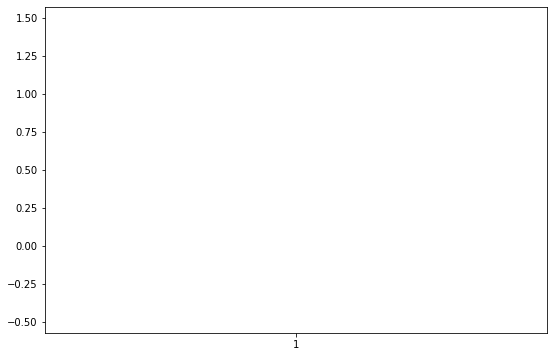

In [5]:
datos_1 =myData[Mascara_0 ].iloc[:,6]


datos_graf = [datos_1]

# Creando el objeto figura
fig = plt.figure(1, figsize=(9, 6))

# Creando el subgrafico
ax = fig.add_subplot(111)

# creando el grafico de cajas
bp = ax.boxplot(datos_graf)

# visualizar mas facile los atípicos
for flier in bp['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)
# los puntos aislados son valores atípicos

In [703]:
d = np.percentile(datos_1, 25)
d

220775.0

In [704]:
e = np.percentile(datos_1, 50)
e

561314.0

In [705]:
f = np.percentile(datos_1, 75)
f

720107.0

In [706]:
df0 = pd.DataFrame({
    
    'user_location_country':myData[Mascara_0].iloc[:,3],
    'user_location_region':myData[Mascara_0].iloc[:,4],
    'user_location_city':myData[Mascara_0].iloc[:,5],
    'orig_destination_distance':myData[Mascara_0].iloc[:,6],
    'hotel_continent':myData[Mascara_0].iloc[:,20],
    'hotel_country':myData[Mascara_0].iloc[:,21],
})
df0

user_location_country  user_location_region  user_location_city  \
3415                        0                   393               14187   
3416                        0                   393               14187   
3417                        0                   393               14187   
3418                        0                   393               14187   
3419                        0                   393               14187   
3420                        0                   393               14187   
3421                        0                   393               14187   
3422                        0                   393               14187   
3423                        0                   393               14187   
3424                        0                   393               14187   
3425                        0                   393               14187   
3426                        0                   393               14187   
3427                        0                   393               14187   
3428                        0                   275               49723   
3429                        0                   275               49723   
3435                        0                   393               14187   
3436                        0                   393               14187   
3437                        0                   393               14187   
3438                        0                   393               14187   
3439                        0                   393               14187   
3440                        0                   393               14187   
3441                        0                   393               14187   
3442                        0                   393               14187   
3443                        0                   393               14187   
3444                        0                   393               14187   
3445                        0                   393               14187   
3446                        0                   393               14187   
3447                        0                   393               14187   
3448                        0                   393               14187   
3449                        0                   393               14187   
...                       ...                   ...                 ...   
213023                      0                   203               54226   
213024                      0                   203               54226   
216028                      0                   203               54226   
217663                      0                   203               54226   
217664                      0                   203               54226   
217665                      0                   203               54226   
217666                      0                   203               54226   
219364                      0                   147               10568   
219365                      0                   147               10568   
219366                      0                   147               10568   
219367                      0                   147               10568   
219368                      0                   147               10568   
219369                      0                   147               10568   
219370                      0                   275               49723   
219371                      0                   275               49723   
227751                      0                   317               56136   
228214                      0                   275               49723   
228215                      0                   275               49723   
235347                      0                   203               54226   
235348                      0                   203               54226   
235349                      0                   203               54226   
235350                      0    

In [707]:
corr =df0.corr()
corr

user_location_country  user_location_region  \
user_location_country                        NaN                   NaN   
user_location_region                         NaN              1.000000   
user_location_city                           NaN             -0.072369   
orig_destination_distance                    NaN                   NaN   
hotel_continent                              NaN              0.233834   
hotel_country                                NaN              0.396770   

                           user_location_city  orig_destination_distance  \
user_location_country                     NaN                        NaN   
user_location_region                -0.072369                        NaN   
user_location_city                   1.000000                        NaN   
orig_destination_distance                 NaN                   1.000000   
hotel_continent                      0.106165                  -0.533513   
hotel_country                       -0.084941                  -0.602582   

                           hotel_continent  hotel_country  
user_location_country                  NaN            NaN  
user_location_region              0.233834       0.396770  
user_location_city                0.106165      -0.084941  
orig_destination_distance        -0.533513      -0.602582  
hotel_continent                   1.000000       0.259268  
hotel_country                     0.259268       1.000000

Podemos ver como la correlación entre las columnas 'hotel_country' y 'user_location_country' es alta. Por lo tanto, los valores nulos de 'orig_destination_distance' se parecerán a los valores no nulos de orig_destination_distance, teniendo ambos el mismo hotel country. Es decir, por ejemplo todos los hoteles countrys == 50, tienen asociado un origin destination en torno  7793.9002. Entonces rellenaremos los valores nulos con hoteles countrys == 50, con ese valor asociado, y calculamos ese valor asociado tomando la media de esos valores. 

In [778]:
Mascara_0 = myData.user_location_country == 0
Mascara_50 = myData.hotel_country ==50
myData[Mascara_0 & Mascara_50]

date_time  site_name  posa_continent  user_location_country  \
3452    2013-12-11 19:58:34         22               2                      0   
3453    2013-12-11 20:01:21         22               2                      0   
3457    2014-02-03 13:30:19         22               2                      0   
3462    2014-05-12 13:55:46         22               2                      0   
3463    2014-05-12 13:57:21         22               2                      0   
3464    2014-05-12 14:07:42         22               2                      0   
3465    2014-05-12 14:13:27         22               2                      0   
3466    2014-05-12 14:24:34         22               2                      0   
3467    2014-05-12 14:26:53         22               2                      0   
11587   2014-07-26 15:54:45         22               2                      0   
11588   2014-07-26 15:55:11         22               2                      0   
11589   2014-07-28 12:02:34         22               2                      0   
11590   2014-07-28 12:06:56         22               2                      0   
11591   2014-07-28 12:13:20         22               2                      0   
11592   2014-07-28 17:59:45         22               2                      0   
11593   2014-07-28 18:04:29         22               2                      0   
36188   2014-08-14 16:49:27         22               2                      0   
58492   2013-01-29 07:07:41          2               3                      0   
58493   2013-01-30 06:21:56          2               3                      0   
63076   2014-02-04 10:10:49         22               2                      0   
65713   2013-03-04 00:42:12          2               3                      0   
65714   2013-03-04 00:42:22          2               3                      0   
65715   2013-03-04 00:42:42          2               3                      0   
65716   2013-03-04 00:42:48          2               3                      0   
65717   2013-03-04 00:43:35          2               3                      0   
65718   2013-03-04 00:49:34          2               3                      0   
65719   2013-03-17 12:35:08          2               3                      0   
65720   2013-03-17 12:37:04          2               3                      0   
65721   2013-03-17 12:46:09          2               3                      0   
65722   2013-03-18 04:21:50          2               3                      0   
...                     ...        ...             ...                    ...   
182349  2014-01-23 00:29:41          2               3                      0   
182350  2014-01-23 00:31:50          2               3                      0   
187193  2013-06-24 15:25:17         22               2                      0   
187194  2013-06-24 15:42:19         22               2                      0   
187195  2013-06-24 15:46:16         22               2                      0   
196447  2014-06-23 13:06:36         22               2                      0   
196448  2014-06-24 15:35:01         22               2                      0   
196449  2014-06-26 17:33:41         22               2                      0   
196450  2014-06-26 17:50:08         22               2                      0   
196451  2014-06-26 17:52:34         22               2                      0   
196454  2014-06-30 16:50:29         22               2                      0   
196455  2014-06-30 17:05:59         22               2                      0   
196456  2014-06-30 17:15:09         22               2                      0   
196457  2014-07-01 09:48:15         22               2                      0   
196515  2014-11-10 11:39:49         22               2                      0   
196516  2014-11-10 15:25:33         22               2                      0   
196517  2014-11-10 15:34:27         22               2                      0   
203767  2013-09-18 01:34:11         37           

In [779]:
myData[Mascara_0 & Mascara_50]['orig_destination_distance'].mean()

7813.887669565221

In [780]:
myData[Mascara_0 & Mascara_50] = myData[Mascara_0 & Mascara_50].fillna(value=7813.887669565221)
myData[Mascara_0 & Mascara_50]

date_time  site_name  posa_continent  user_location_country  \
3452    2013-12-11 19:58:34         22               2                      0   
3453    2013-12-11 20:01:21         22               2                      0   
3457    2014-02-03 13:30:19         22               2                      0   
3462    2014-05-12 13:55:46         22               2                      0   
3463    2014-05-12 13:57:21         22               2                      0   
3464    2014-05-12 14:07:42         22               2                      0   
3465    2014-05-12 14:13:27         22               2                      0   
3466    2014-05-12 14:24:34         22               2                      0   
3467    2014-05-12 14:26:53         22               2                      0   
11587   2014-07-26 15:54:45         22               2                      0   
11588   2014-07-26 15:55:11         22               2                      0   
11589   2014-07-28 12:02:34         22               2                      0   
11590   2014-07-28 12:06:56         22               2                      0   
11591   2014-07-28 12:13:20         22               2                      0   
11592   2014-07-28 17:59:45         22               2                      0   
11593   2014-07-28 18:04:29         22               2                      0   
36188   2014-08-14 16:49:27         22               2                      0   
58492   2013-01-29 07:07:41          2               3                      0   
58493   2013-01-30 06:21:56          2               3                      0   
63076   2014-02-04 10:10:49         22               2                      0   
65713   2013-03-04 00:42:12          2               3                      0   
65714   2013-03-04 00:42:22          2               3                      0   
65715   2013-03-04 00:42:42          2               3                      0   
65716   2013-03-04 00:42:48          2               3                      0   
65717   2013-03-04 00:43:35          2               3                      0   
65718   2013-03-04 00:49:34          2               3                      0   
65719   2013-03-17 12:35:08          2               3                      0   
65720   2013-03-17 12:37:04          2               3                      0   
65721   2013-03-17 12:46:09          2               3                      0   
65722   2013-03-18 04:21:50          2               3                      0   
...                     ...        ...             ...                    ...   
182349  2014-01-23 00:29:41          2               3                      0   
182350  2014-01-23 00:31:50          2               3                      0   
187193  2013-06-24 15:25:17         22               2                      0   
187194  2013-06-24 15:42:19         22               2                      0   
187195  2013-06-24 15:46:16         22               2                      0   
196447  2014-06-23 13:06:36         22               2                      0   
196448  2014-06-24 15:35:01         22               2                      0   
196449  2014-06-26 17:33:41         22               2                      0   
196450  2014-06-26 17:50:08         22               2                      0   
196451  2014-06-26 17:52:34         22               2                      0   
196454  2014-06-30 16:50:29         22               2                      0   
196455  2014-06-30 17:05:59         22               2                      0   
196456  2014-06-30 17:15:09         22               2                      0   
196457  2014-07-01 09:48:15         22               2                      0   
196515  2014-11-10 11:39:49         22               2                      0   
196516  2014-11-10 15:25:33         22               2                      0   
196517  2014-11-10 15:34:27         22               2                      0   
203767  2013-09-18 01:34:11         37           

In [781]:
Mascara_0 = myData.user_location_country == 0
Mascara_104 = myData.hotel_country ==104
myData[Mascara_0 & Mascara_104]

date_time  site_name  posa_continent  user_location_country  \
3418    2013-05-09 16:27:35         22               2                      0   
3438    2013-08-10 15:26:15         22               2                      0   
3446    2013-09-21 11:56:40         22               2                      0   
3447    2013-09-21 12:05:31         22               2                      0   
3448    2013-11-12 14:46:29         22               2                      0   
3449    2013-11-12 14:49:07         22               2                      0   
3450    2013-11-13 11:53:55         22               2                      0   
3455    2013-12-26 10:53:20         22               2                      0   
3456    2013-12-26 10:59:33         22               2                      0   
3461    2014-05-12 11:28:27         22               2                      0   
11231   2014-07-24 22:28:42         22               2                      0   
36187   2014-08-14 15:38:39         22               2                      0   
55991   2013-12-30 19:41:05          2               3                      0   
55992   2013-12-30 19:42:25          2               3                      0   
55993   2013-12-30 19:46:01          2               3                      0   
55994   2013-12-30 19:55:10          2               3                      0   
55995   2013-12-30 19:59:57          2               3                      0   
58487   2013-01-23 16:36:42          2               3                      0   
58489   2013-01-23 18:54:45          2               3                      0   
61336   2013-01-25 22:21:12         22               2                      0   
61337   2013-01-25 22:29:35         22               2                      0   
63032   2013-02-27 11:55:01         22               2                      0   
63033   2013-02-27 12:00:17         22               2                      0   
63034   2013-04-17 16:06:56         22               2                      0   
63035   2013-04-17 18:52:55         22               2                      0   
63036   2013-04-17 19:02:52         22               2                      0   
63037   2013-04-17 19:08:36         22               2                      0   
63038   2013-05-07 16:01:20         22               2                      0   
63039   2013-05-07 16:19:55         22               2                      0   
63040   2013-05-07 16:37:00         22               2                      0   
...                     ...        ...             ...                    ...   
212024  2014-12-01 14:06:47         22               2                      0   
212025  2014-12-01 14:07:06         22               2                      0   
212026  2014-12-01 14:10:09         22               2                      0   
212027  2014-12-01 14:11:40         22               2                      0   
212028  2014-12-01 14:13:32         22               2                      0   
212852  2014-10-31 10:53:18         22               2                      0   
213007  2014-05-26 22:28:28         22               2                      0   
213008  2014-06-07 14:41:55         22               2                      0   
213009  2014-06-07 14:42:39         22               2                      0   
213010  2014-06-07 14:43:55         22               2                      0   
213011  2014-06-07 14:44:44         22               2                      0   
213012  2014-06-07 14:45:43         22               2                      0   
213013  2014-06-07 14:50:39         22               2                      0   
213014  2014-06-07 14:56:20         22               2                      0   
213015  2014-06-07 14:57:11         22               2                      0   
213016  2014-06-07 14:58:08         22               2                      0   
213017  2014-06-07 15:02:56         22               2                      0   
213018  2014-06-07 15:05:14         22           

In [733]:
myData[Mascara_0 & Mascara_104]['orig_destination_distance'].mean()

487.40581599999985

In [782]:
myData[Mascara_0 & Mascara_104] = myData[Mascara_0 & Mascara_104].fillna(value=487.40581599999985)
myData[Mascara_0 & Mascara_104]

date_time  site_name  posa_continent  user_location_country  \
3418    2013-05-09 16:27:35         22               2                      0   
3438    2013-08-10 15:26:15         22               2                      0   
3446    2013-09-21 11:56:40         22               2                      0   
3447    2013-09-21 12:05:31         22               2                      0   
3448    2013-11-12 14:46:29         22               2                      0   
3449    2013-11-12 14:49:07         22               2                      0   
3450    2013-11-13 11:53:55         22               2                      0   
3455    2013-12-26 10:53:20         22               2                      0   
3456    2013-12-26 10:59:33         22               2                      0   
3461    2014-05-12 11:28:27         22               2                      0   
11231   2014-07-24 22:28:42         22               2                      0   
36187   2014-08-14 15:38:39         22               2                      0   
55991   2013-12-30 19:41:05          2               3                      0   
55992   2013-12-30 19:42:25          2               3                      0   
55993   2013-12-30 19:46:01          2               3                      0   
55994   2013-12-30 19:55:10          2               3                      0   
55995   2013-12-30 19:59:57          2               3                      0   
58487   2013-01-23 16:36:42          2               3                      0   
58489   2013-01-23 18:54:45          2               3                      0   
61336   2013-01-25 22:21:12         22               2                      0   
61337   2013-01-25 22:29:35         22               2                      0   
63032   2013-02-27 11:55:01         22               2                      0   
63033   2013-02-27 12:00:17         22               2                      0   
63034   2013-04-17 16:06:56         22               2                      0   
63035   2013-04-17 18:52:55         22               2                      0   
63036   2013-04-17 19:02:52         22               2                      0   
63037   2013-04-17 19:08:36         22               2                      0   
63038   2013-05-07 16:01:20         22               2                      0   
63039   2013-05-07 16:19:55         22               2                      0   
63040   2013-05-07 16:37:00         22               2                      0   
...                     ...        ...             ...                    ...   
212024  2014-12-01 14:06:47         22               2                      0   
212025  2014-12-01 14:07:06         22               2                      0   
212026  2014-12-01 14:10:09         22               2                      0   
212027  2014-12-01 14:11:40         22               2                      0   
212028  2014-12-01 14:13:32         22               2                      0   
212852  2014-10-31 10:53:18         22               2                      0   
213007  2014-05-26 22:28:28         22               2                      0   
213008  2014-06-07 14:41:55         22               2                      0   
213009  2014-06-07 14:42:39         22               2                      0   
213010  2014-06-07 14:43:55         22               2                      0   
213011  2014-06-07 14:44:44         22               2                      0   
213012  2014-06-07 14:45:43         22               2                      0   
213013  2014-06-07 14:50:39         22               2                      0   
213014  2014-06-07 14:56:20         22               2                      0   
213015  2014-06-07 14:57:11         22               2                      0   
213016  2014-06-07 14:58:08         22               2                      0   
213017  2014-06-07 15:02:56         22               2                      0   
213018  2014-06-07 15:05:14         22           

In [783]:
Mascara_0 = myData.user_location_country == 0
Mascara_182 = myData.hotel_country ==182
myData[Mascara_0 & Mascara_182]

date_time  site_name  posa_continent  user_location_country  \
3422    2013-06-17 13:58:42         22               2                      0   
3423    2013-06-17 14:00:04         22               2                      0   
3424    2013-06-25 12:12:49         22               2                      0   
3425    2013-06-25 13:40:11         22               2                      0   
3426    2013-06-25 13:56:42         22               2                      0   
3427    2013-06-25 13:59:28         22               2                      0   
3428    2013-07-06 18:28:36         22               2                      0   
3429    2013-07-06 18:32:58         22               2                      0   
58488   2013-01-23 16:50:52          2               3                      0   
58490   2013-01-25 17:04:18          2               3                      0   
58491   2013-01-25 17:09:52          2               3                      0   
63023   2013-02-19 10:56:27         22               2                      0   
63024   2013-02-19 11:04:35         22               2                      0   
63025   2013-02-19 11:06:16         22               2                      0   
63026   2013-02-19 11:08:40         22               2                      0   
63027   2013-02-19 11:09:56         22               2                      0   
63028   2013-02-19 11:14:16         22               2                      0   
63029   2013-02-21 17:00:13         22               2                      0   
63030   2013-02-21 17:02:22         22               2                      0   
63031   2013-02-21 17:22:19         22               2                      0   
63062   2013-10-24 12:36:38         22               2                      0   
63063   2013-10-24 12:37:52         22               2                      0   
63064   2013-10-24 12:40:21         22               2                      0   
63065   2013-10-24 12:40:40         22               2                      0   
63066   2013-10-24 12:43:12         22               2                      0   
91733   2014-09-18 13:10:24         22               2                      0   
91734   2014-09-18 17:40:29         22               2                      0   
91735   2014-09-19 11:55:56         22               2                      0   
91736   2014-09-19 15:51:44         22               2                      0   
91737   2014-09-19 16:02:44         22               2                      0   
...                     ...        ...             ...                    ...   
211988  2014-10-29 17:55:42         22               2                      0   
211989  2014-10-29 17:55:59         22               2                      0   
211990  2014-10-29 17:57:43         22               2                      0   
211991  2014-10-29 18:02:32         22               2                      0   
211992  2014-10-29 18:07:20         22               2                      0   
211993  2014-10-29 18:08:39         22               2                      0   
211994  2014-10-29 18:11:48         22               2                      0   
211995  2014-10-29 18:12:37         22               2                      0   
211996  2014-10-29 18:15:31         22               2                      0   
211997  2014-10-29 18:16:06         22               2                      0   
211998  2014-10-29 18:48:43         22               2                      0   
211999  2014-10-29 18:48:55         22               2                      0   
212000  2014-10-29 18:49:00         22               2                      0   
212001  2014-10-29 18:49:08         22               2                      0   
212002  2014-10-29 18:52:04         22               2                      0   
212003  2014-10-29 18:55:35         22               2                      0   
212004  2014-10-29 18:58:41         22               2                      0   
212005  2014-10-29 19:04:33         22           

In [784]:
myData[Mascara_0 & Mascara_182]['orig_destination_distance'].mean()

1870.26366

In [785]:
myData[Mascara_0 & Mascara_182]= myData[Mascara_0 & Mascara_182].fillna(value=1870.26366)
myData[Mascara_0 & Mascara_182]

date_time  site_name  posa_continent  user_location_country  \
3422    2013-06-17 13:58:42         22               2                      0   
3423    2013-06-17 14:00:04         22               2                      0   
3424    2013-06-25 12:12:49         22               2                      0   
3425    2013-06-25 13:40:11         22               2                      0   
3426    2013-06-25 13:56:42         22               2                      0   
3427    2013-06-25 13:59:28         22               2                      0   
3428    2013-07-06 18:28:36         22               2                      0   
3429    2013-07-06 18:32:58         22               2                      0   
58488   2013-01-23 16:50:52          2               3                      0   
58490   2013-01-25 17:04:18          2               3                      0   
58491   2013-01-25 17:09:52          2               3                      0   
63023   2013-02-19 10:56:27         22               2                      0   
63024   2013-02-19 11:04:35         22               2                      0   
63025   2013-02-19 11:06:16         22               2                      0   
63026   2013-02-19 11:08:40         22               2                      0   
63027   2013-02-19 11:09:56         22               2                      0   
63028   2013-02-19 11:14:16         22               2                      0   
63029   2013-02-21 17:00:13         22               2                      0   
63030   2013-02-21 17:02:22         22               2                      0   
63031   2013-02-21 17:22:19         22               2                      0   
63062   2013-10-24 12:36:38         22               2                      0   
63063   2013-10-24 12:37:52         22               2                      0   
63064   2013-10-24 12:40:21         22               2                      0   
63065   2013-10-24 12:40:40         22               2                      0   
63066   2013-10-24 12:43:12         22               2                      0   
91733   2014-09-18 13:10:24         22               2                      0   
91734   2014-09-18 17:40:29         22               2                      0   
91735   2014-09-19 11:55:56         22               2                      0   
91736   2014-09-19 15:51:44         22               2                      0   
91737   2014-09-19 16:02:44         22               2                      0   
...                     ...        ...             ...                    ...   
211988  2014-10-29 17:55:42         22               2                      0   
211989  2014-10-29 17:55:59         22               2                      0   
211990  2014-10-29 17:57:43         22               2                      0   
211991  2014-10-29 18:02:32         22               2                      0   
211992  2014-10-29 18:07:20         22               2                      0   
211993  2014-10-29 18:08:39         22               2                      0   
211994  2014-10-29 18:11:48         22               2                      0   
211995  2014-10-29 18:12:37         22               2                      0   
211996  2014-10-29 18:15:31         22               2                      0   
211997  2014-10-29 18:16:06         22               2                      0   
211998  2014-10-29 18:48:43         22               2                      0   
211999  2014-10-29 18:48:55         22               2                      0   
212000  2014-10-29 18:49:00         22               2                      0   
212001  2014-10-29 18:49:08         22               2                      0   
212002  2014-10-29 18:52:04         22               2                      0   
212003  2014-10-29 18:55:35         22               2                      0   
212004  2014-10-29 18:58:41         22               2                      0   
212005  2014-10-29 19:04:33         22           

In [786]:
Mascara_0 = myData.user_location_country == 0
Mascara_99 = myData.hotel_country ==99
myData[Mascara_0 & Mascara_99]

date_time  site_name  posa_continent  user_location_country  \
145297  2014-10-31 15:04:39         22               2                      0   
145298  2014-10-31 15:31:01         22               2                      0   
152050  2013-12-01 03:46:41          2               3                      0   
152051  2013-12-01 03:47:52          2               3                      0   
196476  2014-08-26 15:35:44         22               2                      0   
196477  2014-08-26 15:52:05         22               2                      0   

        user_location_region  user_location_city  orig_destination_distance  \
145297                   203               54226                        NaN   
145298                   203               54226                        NaN   
152050                   203               54226                        NaN   
152051                   203               54226                        NaN   
196476                   317               56136                  2614.3473   
196477                   317               56136                  2613.5607   

        user_id  is_mobile  is_package  ...  srch_children_cnt  srch_rm_cnt  \
145297   561314          0           0  ...                  0          1.0   
145298   561314          0           0  ...                  0          1.0   
152050   579320          0           0  ...                  0          1.0   
152051   579320          0           0  ...                  0          1.0   
196476   720107          0           0  ...                  0          2.0   
196477   720107          0           1  ...                  0          2.0   

        srch_destination_id  srch_destination_type_id  is_booking  cnt  \
145297              18924.0                       5.0         0.0  1.0   
145298              14280.0                       4.0         0.0  1.0   
152050              18774.0                       1.0         0.0  1.0   
152051              18774.0                       1.0         0.0  1.0   
196476              30243.0                       6.0         0.0  1.0   
196477              30243.0                       6.0         0.0  1.0   

        hotel_continent  hotel_country  hotel_market  hotel_cluster  
145297              3.0           99.0          88.0           46.0  
145298              3.0           99.0          88.0           61.0  
152050              3.0           99.0        1239.0           86.0  
152051              3.0           99.0        1239.0           46.0  
196476              3.0           99.0        1208.0           82.0  
196477              3.0           99.0        1208.0           60.0  

[6 rows x 22 columns]

In [787]:
myData[Mascara_0 & Mascara_99]['orig_destination_distance'].mean()

2613.9539999999997

In [788]:
myData[Mascara_0 & Mascara_99] = myData[Mascara_0 & Mascara_99].fillna(value=2613.9539999999997)
myData[Mascara_0 & Mascara_99]

date_time  site_name  posa_continent  user_location_country  \
145297  2014-10-31 15:04:39         22               2                      0   
145298  2014-10-31 15:31:01         22               2                      0   
152050  2013-12-01 03:46:41          2               3                      0   
152051  2013-12-01 03:47:52          2               3                      0   
196476  2014-08-26 15:35:44         22               2                      0   
196477  2014-08-26 15:52:05         22               2                      0   

        user_location_region  user_location_city  orig_destination_distance  \
145297                   203               54226                  2613.9540   
145298                   203               54226                  2613.9540   
152050                   203               54226                  2613.9540   
152051                   203               54226                  2613.9540   
196476                   317               56136                  2614.3473   
196477                   317               56136                  2613.5607   

        user_id  is_mobile  is_package  ...  srch_children_cnt  srch_rm_cnt  \
145297   561314          0           0  ...                  0          1.0   
145298   561314          0           0  ...                  0          1.0   
152050   579320          0           0  ...                  0          1.0   
152051   579320          0           0  ...                  0          1.0   
196476   720107          0           0  ...                  0          2.0   
196477   720107          0           1  ...                  0          2.0   

        srch_destination_id  srch_destination_type_id  is_booking  cnt  \
145297              18924.0                       5.0         0.0  1.0   
145298              14280.0                       4.0         0.0  1.0   
152050              18774.0                       1.0         0.0  1.0   
152051              18774.0                       1.0         0.0  1.0   
196476              30243.0                       6.0         0.0  1.0   
196477              30243.0                       6.0         0.0  1.0   

        hotel_continent  hotel_country  hotel_market  hotel_cluster  
145297              3.0           99.0          88.0           46.0  
145298              3.0           99.0          88.0           61.0  
152050              3.0           99.0        1239.0           86.0  
152051              3.0           99.0        1239.0           46.0  
196476              3.0           99.0        1208.0           82.0  
196477              3.0           99.0        1208.0           60.0  

[6 rows x 22 columns]

In [789]:
Mascara_0 = myData.user_location_country == 0
Mascara_204 = myData.hotel_country ==204
myData[Mascara_0 & Mascara_204]

date_time  site_name  posa_continent  user_location_country  \
196478  2014-08-27 14:14:14         22               2                      0   

        user_location_region  user_location_city  orig_destination_distance  \
196478                   317               56136                   4356.623   

        user_id  is_mobile  is_package  ...  srch_children_cnt  srch_rm_cnt  \
196478   720107          0           0  ...                  0          1.0   

        srch_destination_id  srch_destination_type_id  is_booking  cnt  \
196478               8745.0                       1.0         0.0  4.0   

        hotel_continent  hotel_country  hotel_market  hotel_cluster  
196478              6.0          204.0          27.0           32.0  

[1 rows x 22 columns]

In [790]:
Mascara_0 = myData.user_location_country == 0
Mascara_161 = myData.hotel_country ==161
myData[Mascara_0 & Mascara_161]

date_time  site_name  posa_continent  user_location_country  \
227751  2014-02-12 04:36:50          2               3                      0   

        user_location_region  user_location_city  orig_destination_distance  \
227751                   317               56136                  8541.2049   

        user_id  is_mobile  is_package  ...  srch_children_cnt  srch_rm_cnt  \
227751   836655          0           0  ...                  0          1.0   

        srch_destination_id  srch_destination_type_id  is_booking  cnt  \
227751              20359.0                       6.0         0.0  1.0   

        hotel_continent  hotel_country  hotel_market  hotel_cluster  
227751              4.0          161.0        1579.0           61.0  

[1 rows x 22 columns]

In [791]:
Mascara_0 = myData.user_location_country == 0
Mascara_70 = myData.hotel_country ==70
myData[Mascara_0 & Mascara_70]

date_time  site_name  posa_continent  user_location_country  \
3451    2013-12-03 16:00:06         22               2                      0   
73535   2014-09-30 08:47:39          2               3                      0   
91728   2014-09-15 11:50:24         22               2                      0   
91731   2014-09-17 13:25:40         22               2                      0   
91732   2014-09-17 14:06:37         22               2                      0   
91738   2014-09-20 14:50:09         22               2                      0   
91741   2014-09-22 16:33:50         22               2                      0   
91742   2014-09-22 16:33:57         22               2                      0   
91743   2014-09-22 16:34:15         22               2                      0   
91744   2014-09-22 16:34:19         22               2                      0   
91745   2014-09-22 16:34:26         22               2                      0   
91746   2014-09-22 16:34:45         22               2                      0   
91747   2014-09-22 16:47:37         22               2                      0   
91771   2014-09-24 18:36:57         22               2                      0   
152825  2014-02-07 06:48:27         37               1                      0   
152826  2014-02-07 06:48:33         37               1                      0   
152827  2014-02-07 06:48:42         37               1                      0   
202715  2014-04-15 22:12:08         22               2                      0   
203755  2013-05-23 02:40:45         37               1                      0   
203756  2013-05-23 02:50:05         37               1                      0   
203765  2013-08-07 06:37:19         37               1                      0   
203766  2013-08-07 06:46:54         37               1                      0   
203768  2013-09-18 02:06:48         37               1                      0   
203769  2013-09-18 02:10:55         37               1                      0   
203770  2013-09-25 06:45:17         37               1                      0   
203771  2013-10-22 15:34:06         37               1                      0   
203777  2014-01-28 05:28:24         37               1                      0   
203778  2014-01-28 05:32:42         37               1                      0   
203803  2014-10-09 05:25:25         37               1                      0   
235347  2013-06-07 09:02:11          2               3                      0   
235348  2013-06-07 10:09:04          2               3                      0   
235349  2013-06-07 10:10:01          2               3                      0   
235350  2013-06-07 10:12:41          2               3                      0   

        user_location_region  user_location_city  orig_destination_distance  \
3451                     393               14187                        NaN   
73535                    252               23399                        NaN   
91728                    463               47039                        NaN   
91731                    463               47039                        NaN   
91732                    463               47039                        NaN   
91738                    463               47039                        NaN   
91741                    463               47039                        NaN   
91742                    463               47039                        NaN   
91743                    463               47039                        NaN   
91744                    463               47039                        NaN   
91745                    463               47039                        NaN   
91746                    463               47039                        NaN   
91747                    463               47039                        NaN   
91771                    463               47039                        NaN   
152825                   463               47039                        NaN   

In [792]:
myData[Mascara_0 & Mascara_70]['orig_destination_distance'].mean()

4473.1397

In [793]:
myData[Mascara_0 & Mascara_70]= myData[Mascara_0 & Mascara_70].fillna(value=4473.1397)
myData[Mascara_0 & Mascara_70]

date_time  site_name  posa_continent  user_location_country  \
3451    2013-12-03 16:00:06         22               2                      0   
73535   2014-09-30 08:47:39          2               3                      0   
91728   2014-09-15 11:50:24         22               2                      0   
91731   2014-09-17 13:25:40         22               2                      0   
91732   2014-09-17 14:06:37         22               2                      0   
91738   2014-09-20 14:50:09         22               2                      0   
91741   2014-09-22 16:33:50         22               2                      0   
91742   2014-09-22 16:33:57         22               2                      0   
91743   2014-09-22 16:34:15         22               2                      0   
91744   2014-09-22 16:34:19         22               2                      0   
91745   2014-09-22 16:34:26         22               2                      0   
91746   2014-09-22 16:34:45         22               2                      0   
91747   2014-09-22 16:47:37         22               2                      0   
91771   2014-09-24 18:36:57         22               2                      0   
152825  2014-02-07 06:48:27         37               1                      0   
152826  2014-02-07 06:48:33         37               1                      0   
152827  2014-02-07 06:48:42         37               1                      0   
202715  2014-04-15 22:12:08         22               2                      0   
203755  2013-05-23 02:40:45         37               1                      0   
203756  2013-05-23 02:50:05         37               1                      0   
203765  2013-08-07 06:37:19         37               1                      0   
203766  2013-08-07 06:46:54         37               1                      0   
203768  2013-09-18 02:06:48         37               1                      0   
203769  2013-09-18 02:10:55         37               1                      0   
203770  2013-09-25 06:45:17         37               1                      0   
203771  2013-10-22 15:34:06         37               1                      0   
203777  2014-01-28 05:28:24         37               1                      0   
203778  2014-01-28 05:32:42         37               1                      0   
203803  2014-10-09 05:25:25         37               1                      0   
235347  2013-06-07 09:02:11          2               3                      0   
235348  2013-06-07 10:09:04          2               3                      0   
235349  2013-06-07 10:10:01          2               3                      0   
235350  2013-06-07 10:12:41          2               3                      0   

        user_location_region  user_location_city  orig_destination_distance  \
3451                     393               14187                  4473.1397   
73535                    252               23399                  4473.1397   
91728                    463               47039                  4473.1397   
91731                    463               47039                  4473.1397   
91732                    463               47039                  4473.1397   
91738                    463               47039                  4473.1397   
91741                    463               47039                  4473.1397   
91742                    463               47039                  4473.1397   
91743                    463               47039                  4473.1397   
91744                    463               47039                  4473.1397   
91745                    463               47039                  4473.1397   
91746                    463               47039                  4473.1397   
91747                    463               47039                  4473.1397   
91771                    463               47039                  4473.1397   
152825                   463               47039                  4473.1397   

In [794]:
Mascara_0 = myData.user_location_country == 0
Mascara_48 = myData.hotel_country ==48
myData[Mascara_0 & Mascara_48]

date_time  site_name  posa_continent  user_location_country  \
74111   2014-02-11 15:42:41         22               2                      0   
74112   2014-02-11 15:42:52         22               2                      0   
74113   2014-02-11 16:16:15         22               2                      0   
74114   2014-02-11 16:19:11         22               2                      0   
153404  2014-12-24 07:51:56          2               3                      0   
153405  2014-12-24 07:55:48          2               3                      0   
153406  2014-12-24 08:05:47          2               3                      0   
153407  2014-12-24 08:09:19          2               3                      0   
153408  2014-12-24 08:10:05          2               3                      0   
153409  2014-12-24 08:10:18          2               3                      0   
153410  2014-12-24 08:10:33          2               3                      0   
196471  2014-08-05 12:17:26         22               2                      0   
196473  2014-08-07 12:56:53         22               2                      0   
196474  2014-08-07 12:58:42         22               2                      0   
196529  2014-11-22 14:15:15         22               2                      0   
196530  2014-11-24 10:12:04         22               2                      0   
213005  2014-05-26 22:18:11         22               2                      0   
213006  2014-05-26 22:20:10         22               2                      0   
217663  2014-11-15 13:29:09         22               2                      0   
217664  2014-11-15 13:31:24         22               2                      0   
217665  2014-11-15 13:31:48         22               2                      0   
217666  2014-11-15 13:43:56         22               2                      0   

        user_location_region  user_location_city  orig_destination_distance  \
74111                    252               28605                        NaN   
74112                    252               28605                        NaN   
74113                    252               28605                        NaN   
74114                    252               28605                        NaN   
153404                   275               49723                        NaN   
153405                   275               49723                        NaN   
153406                   275               49723                        NaN   
153407                   275               49723                        NaN   
153408                   275               49723                        NaN   
153409                   275               49723                        NaN   
153410                   275               49723                        NaN   
196471                   203               54226                        NaN   
196473                   317               56136                   1208.822   
196474                   317               56136                   1208.822   
196529                   444               22937                        NaN   
196530                   444               22937                        NaN   
213005                   203               54226                        NaN   
213006                   203               54226                        NaN   
217663                   203               54226                        NaN   
217664                   203               54226                        NaN   
217665                   203               54226                        NaN   
217666                   203               54226                        NaN   

        user_id  is_mobile  is_package  ...  srch_children_cnt  srch_rm_cnt  \
74111    298410          0           0  ...                  2          2.0   
74112    298410          0           0  ...                  2          2.0   
74113    298410          0           0  ...                  2          2.0   
74114    298410     

In [747]:
myData[Mascara_0 & Mascara_48]['orig_destination_distance'].mean()

1208.822

In [795]:
myData[Mascara_0 & Mascara_48] = myData[Mascara_0 & Mascara_48].fillna(value=1208.822)
myData[Mascara_0 & Mascara_48]

date_time  site_name  posa_continent  user_location_country  \
74111   2014-02-11 15:42:41         22               2                      0   
74112   2014-02-11 15:42:52         22               2                      0   
74113   2014-02-11 16:16:15         22               2                      0   
74114   2014-02-11 16:19:11         22               2                      0   
153404  2014-12-24 07:51:56          2               3                      0   
153405  2014-12-24 07:55:48          2               3                      0   
153406  2014-12-24 08:05:47          2               3                      0   
153407  2014-12-24 08:09:19          2               3                      0   
153408  2014-12-24 08:10:05          2               3                      0   
153409  2014-12-24 08:10:18          2               3                      0   
153410  2014-12-24 08:10:33          2               3                      0   
196471  2014-08-05 12:17:26         22               2                      0   
196473  2014-08-07 12:56:53         22               2                      0   
196474  2014-08-07 12:58:42         22               2                      0   
196529  2014-11-22 14:15:15         22               2                      0   
196530  2014-11-24 10:12:04         22               2                      0   
213005  2014-05-26 22:18:11         22               2                      0   
213006  2014-05-26 22:20:10         22               2                      0   
217663  2014-11-15 13:29:09         22               2                      0   
217664  2014-11-15 13:31:24         22               2                      0   
217665  2014-11-15 13:31:48         22               2                      0   
217666  2014-11-15 13:43:56         22               2                      0   

        user_location_region  user_location_city  orig_destination_distance  \
74111                    252               28605                   1208.822   
74112                    252               28605                   1208.822   
74113                    252               28605                   1208.822   
74114                    252               28605                   1208.822   
153404                   275               49723                   1208.822   
153405                   275               49723                   1208.822   
153406                   275               49723                   1208.822   
153407                   275               49723                   1208.822   
153408                   275               49723                   1208.822   
153409                   275               49723                   1208.822   
153410                   275               49723                   1208.822   
196471                   203               54226                   1208.822   
196473                   317               56136                   1208.822   
196474                   317               56136                   1208.822   
196529                   444               22937                   1208.822   
196530                   444               22937                   1208.822   
213005                   203               54226                   1208.822   
213006                   203               54226                   1208.822   
217663                   203               54226                   1208.822   
217664                   203               54226                   1208.822   
217665                   203               54226                   1208.822   
217666                   203               54226                   1208.822   

        user_id  is_mobile  is_package  ...  srch_children_cnt  srch_rm_cnt  \
74111    298410          0           0  ...                  2          2.0   
74112    298410          0           0  ...                  2          2.0   
74113    298410          0           0  ...                  2          2.0   
74114    298410     

In [749]:
myData[Mascara_0]['orig_destination_distance'].mean()

2805.3828835294116

In [797]:
myData[Mascara_0]= myData[Mascara_0].fillna(value=2805.3828835294116)
myData[Mascara_0]

date_time  site_name  posa_continent  user_location_country  \
3415    2013-05-03 14:10:34         22               2                      0   
3416    2013-05-03 14:13:47         22               2                      0   
3417    2013-05-03 14:28:35         22               2                      0   
3418    2013-05-09 16:27:35         22               2                      0   
3419    2013-05-17 12:29:54         22               2                      0   
3420    2013-05-17 12:33:53         22               2                      0   
3421    2013-05-17 12:43:52         22               2                      0   
3422    2013-06-17 13:58:42         22               2                      0   
3423    2013-06-17 14:00:04         22               2                      0   
3424    2013-06-25 12:12:49         22               2                      0   
3425    2013-06-25 13:40:11         22               2                      0   
3426    2013-06-25 13:56:42         22               2                      0   
3427    2013-06-25 13:59:28         22               2                      0   
3428    2013-07-06 18:28:36         22               2                      0   
3429    2013-07-06 18:32:58         22               2                      0   
3435    2013-07-18 14:05:14         22               2                      0   
3436    2013-07-18 14:25:15         22               2                      0   
3437    2013-08-07 21:27:00         22               2                      0   
3438    2013-08-10 15:26:15         22               2                      0   
3439    2013-09-04 19:17:35         22               2                      0   
3440    2013-09-04 19:22:53         22               2                      0   
3441    2013-09-04 19:37:37         22               2                      0   
3442    2013-09-04 19:38:39         22               2                      0   
3443    2013-09-04 19:44:07         22               2                      0   
3444    2013-09-04 19:45:27         22               2                      0   
3445    2013-09-04 20:14:47         22               2                      0   
3446    2013-09-21 11:56:40         22               2                      0   
3447    2013-09-21 12:05:31         22               2                      0   
3448    2013-11-12 14:46:29         22               2                      0   
3449    2013-11-12 14:49:07         22               2                      0   
...                     ...        ...             ...                    ...   
213023  2014-06-07 16:45:53         22               2                      0   
213024  2014-06-07 16:51:42         22               2                      0   
216028  2014-07-07 22:20:06         22               2                      0   
217663  2014-11-15 13:29:09         22               2                      0   
217664  2014-11-15 13:31:24         22               2                      0   
217665  2014-11-15 13:31:48         22               2                      0   
217666  2014-11-15 13:43:56         22               2                      0   
219364  2014-06-05 14:10:18         22               2                      0   
219365  2014-06-05 14:11:47         22               2                      0   
219366  2014-06-05 14:13:51         22               2                      0   
219367  2014-06-05 14:13:54         22               2                      0   
219368  2014-06-05 14:19:00         22               2                      0   
219369  2014-06-05 14:19:28         22               2                      0   
219370  2014-07-31 14:38:06         22               2                      0   
219371  2014-07-31 14:38:34         22               2                      0   
227751  2014-02-12 04:36:50          2               3                      0   
228214  2014-12-12 10:53:45          2               3                      0   
228215  2014-12-12 10:57:04          2           

In [798]:
myData.isnull().sum()

date_time                        0
site_name                        0
posa_continent                   0
user_location_country            0
user_location_region             0
user_location_city               0
orig_destination_distance    84900
user_id                          0
is_mobile                        0
is_package                       0
channel                          0
srch_adults_cnt                  0
srch_children_cnt                0
srch_rm_cnt                      0
srch_destination_id              0
srch_destination_type_id         0
is_booking                       0
cnt                              0
hotel_continent                  0
hotel_country                    0
hotel_market                     0
hotel_cluster                    0
dtype: int64

In [688]:
df0     #--->dataframe de las columnas susceptibles a ser utilizadas
MascaraM=df0.orig_destination_distance >= 0
d=df0[MascaraM]
d       #--->dentro de df0, dataframe de los no nulos con userLocation 0


user_location_country  user_location_region  user_location_city  \
11231                       0                   317               56136   
11587                       0                   317               56136   
11588                       0                   317               56136   
11589                       0                   317               56136   
11590                       0                   317               56136   
11591                       0                   317               56136   
11592                       0                   317               56136   
11593                       0                   317               56136   
61336                       0                   317               56136   
61337                       0                   317               56136   
156673                      0                   317               56136   
156674                      0                   317               56136   
156675                      0                   317               56136   
156676                      0                   317               56136   
156677                      0                   317               56136   
190246                      0                   317               56136   
190247                      0                   317               56136   
192340                      0                   317               56136   
192341                      0                   317               56136   
192342                      0                   317               56136   
192343                      0                   317               56136   
192344                      0                   317               56136   
192345                      0                   317               56136   
196446                      0                   317               56136   
196447                      0                   317               56136   
196448                      0                   317               56136   
196449                      0                   317               56136   
196450                      0                   317               56136   
196451                      0                   317               56136   
196452                      0                   317               56136   
...                       ...                   ...                 ...   
196481                      0                   317               56136   
196482                      0                   317               56136   
196483                      0                   317               56136   
196484                      0                   317               56136   
196485                      0                   317               56136   
196486                      0                   317               56136   
196487                      0                   317               56136   
196488                      0                   317               56136   
196489                      0                   317               56136   
196490                      0                   317               56136   
196491                      0                   317               56136   
202715                      0                   317               56136   
203783                      0                   317               56136   
203784                      0                   317               56136   
203794                      0                   317               56136   
203795                      0                   317               56136   
203796                      0                   317               56136   
203797                      0                   317               56136   
203798                      0                   317               56136   
203799                      0                   317               56136   
203800                      0                   317               56136   
209913                      0    

user_location_country  user_location_region  user_location_city  \
3452                        0                   393               14187   
3453                        0                   393               14187   
3457                        0                   393               14187   
3462                        0                   393               14187   
3463                        0                   393               14187   
3464                        0                   393               14187   
3465                        0                   393               14187   
3466                        0                   393               14187   
3467                        0                   393               14187   
11587                       0                   317               56136   
11588                       0                   317               56136   
11589                       0                   317               56136   
11590                       0                   317               56136   
11591                       0                   317               56136   
11592                       0                   317               56136   
11593                       0                   317               56136   
36188                       0                   275               49723   
58492                       0                   435               41733   
58493                       0                   435                2976   
63076                       0                   435                2976   
65713                       0                   317               29176   
65714                       0                   317               29176   
65715                       0                   317               29176   
65716                       0                   317               29176   
65717                       0                   317               29176   
65718                       0                   317               29176   
65719                       0                   317               29176   
65720                       0                   317               29176   
65721                       0                   317               29176   
65722                       0                   317               29176   
...                       ...                   ...                 ...   
182349                      0                   275               49723   
182350                      0                   275               49723   
187193                      0                   275               49723   
187194                      0                   275               49723   
187195                      0                   275               49723   
196447                      0                   317               56136   
196448                      0                   317               56136   
196449                      0                   317               56136   
196450                      0                   317               56136   
196451                      0                   317               56136   
196454                      0                   317               56136   
196455                      0                   317               56136   
196456                      0                   317               56136   
196457                      0                   317               56136   
196515                      0                   203               15870   
196516                      0                   203               15870   
196517                      0                   203               15870   
203767                      0                   252               23399   
203772                      0                   203               54226   
209913                      0                   317               56136   
209914                      0                   317               56136   
212944                      0    

In [689]:
d['orig_destination_distance'].mean() #media general

2805.3828835294116

In [690]:
pd.unique(df0['hotel_country'].values.ravel())

array([ 17., 104., 182., 171.,  70.,  50., 110., 168.,   5.,  68., 151.,
        48., 203.,  36.,  99., 204.,  79., 135., 105., 107., 161., 132.])

In [691]:
MascaraHC50 =d.hotel_country == 50
d[MascaraHC50]
NoNulos_UL0_HC50=d[MascaraHC50]
NoNulos_UL0_HC50

NulosMascaraHC50 =df0.hotel_country == 50
All_UL0_HC50=df0[NulosMascaraHC50]
All_UL0_HC50
#NoNulos_UL0_HC50['orig_destination_distance'].mean()

user_location_country  user_location_region  user_location_city  \
3452                        0                   393               14187   
3453                        0                   393               14187   
3457                        0                   393               14187   
3462                        0                   393               14187   
3463                        0                   393               14187   
3464                        0                   393               14187   
3465                        0                   393               14187   
3466                        0                   393               14187   
3467                        0                   393               14187   
11587                       0                   317               56136   
11588                       0                   317               56136   
11589                       0                   317               56136   
11590                       0                   317               56136   
11591                       0                   317               56136   
11592                       0                   317               56136   
11593                       0                   317               56136   
36188                       0                   275               49723   
58492                       0                   435               41733   
58493                       0                   435                2976   
63076                       0                   435                2976   
65713                       0                   317               29176   
65714                       0                   317               29176   
65715                       0                   317               29176   
65716                       0                   317               29176   
65717                       0                   317               29176   
65718                       0                   317               29176   
65719                       0                   317               29176   
65720                       0                   317               29176   
65721                       0                   317               29176   
65722                       0                   317               29176   
...                       ...                   ...                 ...   
182349                      0                   275               49723   
182350                      0                   275               49723   
187193                      0                   275               49723   
187194                      0                   275               49723   
187195                      0                   275               49723   
196447                      0                   317               56136   
196448                      0                   317               56136   
196449                      0                   317               56136   
196450                      0                   317               56136   
196451                      0                   317               56136   
196454                      0                   317               56136   
196455                      0                   317               56136   
196456                      0                   317               56136   
196457                      0                   317               56136   
196515                      0                   203               15870   
196516                      0                   203               15870   
196517                      0                   203               15870   
203767                      0                   252               23399   
203772                      0                   203               54226   
209913                      0                   317               56136   
209914                      0                   317               56136   
212944                      0    

In [693]:
myData[Mascara_0 ] =All_UL0_HC50.fillna(NoNulos_UL0_HC50['orig_destination_distance'].mean())
myData[Mascara_0 ]

date_time  site_name  posa_continent  user_location_country  \
3415         NaN        NaN             NaN                    NaN   
3416         NaN        NaN             NaN                    NaN   
3417         NaN        NaN             NaN                    NaN   
3418         NaN        NaN             NaN                    NaN   
3419         NaN        NaN             NaN                    NaN   
3420         NaN        NaN             NaN                    NaN   
3421         NaN        NaN             NaN                    NaN   
3422         NaN        NaN             NaN                    NaN   
3423         NaN        NaN             NaN                    NaN   
3424         NaN        NaN             NaN                    NaN   
3425         NaN        NaN             NaN                    NaN   
3426         NaN        NaN             NaN                    NaN   
3427         NaN        NaN             NaN                    NaN   
3428         NaN        NaN             NaN                    NaN   
3429         NaN        NaN             NaN                    NaN   
3435         NaN        NaN             NaN                    NaN   
3436         NaN        NaN             NaN                    NaN   
3437         NaN        NaN             NaN                    NaN   
3438         NaN        NaN             NaN                    NaN   
3439         NaN        NaN             NaN                    NaN   
3440         NaN        NaN             NaN                    NaN   
3441         NaN        NaN             NaN                    NaN   
3442         NaN        NaN             NaN                    NaN   
3443         NaN        NaN             NaN                    NaN   
3444         NaN        NaN             NaN                    NaN   
3445         NaN        NaN             NaN                    NaN   
3446         NaN        NaN             NaN                    NaN   
3447         NaN        NaN             NaN                    NaN   
3448         NaN        NaN             NaN                    NaN   
3449         NaN        NaN             NaN                    NaN   
...          ...        ...             ...                    ...   
213023       NaN        NaN             NaN                    NaN   
213024       NaN        NaN             NaN                    NaN   
216028       NaN        NaN             NaN                    NaN   
217663       NaN        NaN             NaN                    NaN   
217664       NaN        NaN             NaN                    NaN   
217665       NaN        NaN             NaN                    NaN   
217666       NaN        NaN             NaN                    NaN   
219364       NaN        NaN             NaN                    NaN   
219365       NaN        NaN             NaN                    NaN   
219366       NaN        NaN             NaN                    NaN   
219367       NaN        NaN             NaN                    NaN   
219368       NaN        NaN             NaN                    NaN   
219369       NaN        NaN             NaN                    NaN   
219370       NaN        NaN             NaN                    NaN   
219371       NaN        NaN             NaN                    NaN   
227751       NaN        NaN             NaN                    NaN   
228214       NaN        NaN             NaN                    NaN   
228215       NaN        NaN             NaN                    NaN   
235347       NaN        NaN             NaN                    NaN   
235348       NaN        NaN             NaN                    NaN   
235349       NaN        NaN             NaN                    NaN   
235350       NaN        NaN             NaN                    NaN   
235354       NaN        NaN             NaN                    NaN   
235355       NaN        NaN             NaN                    NaN   
235362       NaN        NaN             NaN                    NaN   
235363       NaN 

In [562]:
MascaraHC104=d.hotel_country == 104.0
d[MascaraHC104]
NoNulos_UL0_HC104=d[MascaraHC104]
#NoNulos_UL0_HC104

NulosMascaraHC104 =df0.hotel_country == 104
All_UL0_HC104=df0[NulosMascaraHC104]

NoNulos_UL0_HC104['orig_destination_distance'].mean()

487.40581599999985

In [599]:
All_UL0_HC104 = All_UL0_HC104.fillna(NoNulos_UL0_HC104['orig_destination_distance'].mean())

In [564]:
MascaraHC17=d.hotel_country == 17
d[MascaraHC17]
NoNulos_UL0_HC17=d[MascaraHC17]
#NoNulos_UL0_HC17

NulosMascaraHC17 =df0.hotel_country == 17
All_UL0_HC17=df0[NulosMascaraHC17]

NoNulos_UL0_HC17['orig_destination_distance'].mean()

nan

In [600]:
df0

user_location_country  user_location_region  user_location_city  \
3415                        0                   393               14187   
3416                        0                   393               14187   
3417                        0                   393               14187   
3418                        0                   393               14187   
3419                        0                   393               14187   
3420                        0                   393               14187   
3421                        0                   393               14187   
3422                        0                   393               14187   
3423                        0                   393               14187   
3424                        0                   393               14187   
3425                        0                   393               14187   
3426                        0                   393               14187   
3427                        0                   393               14187   
3428                        0                   275               49723   
3429                        0                   275               49723   
3435                        0                   393               14187   
3436                        0                   393               14187   
3437                        0                   393               14187   
3438                        0                   393               14187   
3439                        0                   393               14187   
3440                        0                   393               14187   
3441                        0                   393               14187   
3442                        0                   393               14187   
3443                        0                   393               14187   
3444                        0                   393               14187   
3445                        0                   393               14187   
3446                        0                   393               14187   
3447                        0                   393               14187   
3448                        0                   393               14187   
3449                        0                   393               14187   
...                       ...                   ...                 ...   
213023                      0                   203               54226   
213024                      0                   203               54226   
216028                      0                   203               54226   
217663                      0                   203               54226   
217664                      0                   203               54226   
217665                      0                   203               54226   
217666                      0                   203               54226   
219364                      0                   147               10568   
219365                      0                   147               10568   
219366                      0                   147               10568   
219367                      0                   147               10568   
219368                      0                   147               10568   
219369                      0                   147               10568   
219370                      0                   275               49723   
219371                      0                   275               49723   
227751                      0                   317               56136   
228214                      0                   275               49723   
228215                      0                   275               49723   
235347                      0                   203               54226   
235348                      0                   203               54226   
235349                      0                   203               54226   
235350                      0    

In [ ]:
All_UL0_HC17 =All_UL0_HC17.fillna(d['orig_destination_distance'].mean())

In [565]:
MascaraHC171=d.hotel_country == 171
d[MascaraHC171]
NoNulos_UL0_HC171=d[MascaraHC171]
#NoNulos_UL0_HC171

NulosMascaraHC171 =df0.hotel_country == 171
All_UL0_HC171=df0[NulosMascaraHC171]

NoNulos_UL0_HC171['orig_destination_distance'].mean()

nan

In [566]:
MascaraHC182=d.hotel_country == 182.0
d[MascaraHC182]
NoNulos_UL0_HC182=d[MascaraHC182]
#NoNulos_UL0_HC182

NulosMascaraHC182 =df0.hotel_country == 182
All_UL0_HC182=df0[NulosMascaraHC182]

NoNulos_UL0_HC182['orig_destination_distance'].mean()

1870.26366

In [590]:
All_UL0_HC182 =All_UL0_HC182.fillna(NoNulos_UL0_HC182['orig_destination_distance'].mean())

In [567]:
MascaraHC36=d.hotel_country == 36
d[MascaraHC36]
NoNulos_UL0_HC36=d[MascaraHC36]
#NoNulos_UL0_HC36 

NulosMascaraHC36 =df0.hotel_country == 36
All_UL0_HC36=df0[NulosMascaraHC36]

NoNulos_UL0_HC36['orig_destination_distance'].mean()

nan

In [568]:
MascaraHC99=d.hotel_country == 99
d[MascaraHC99]
NoNulos_UL0_HC99=d[MascaraHC99]
#NoNulos_UL0_HC99 

NulosMascaraHC99 =df0.hotel_country == 99
All_UL0_HC99=df0[NulosMascaraHC99]

NoNulos_UL0_HC99['orig_destination_distance'].mean()

2613.9539999999997

In [591]:
All_UL0_HC99 =All_UL0_HC99.fillna(NoNulos_UL0_HC99['orig_destination_distance'].mean())

In [593]:
MascaraHC204=d.hotel_country == 204
d[MascaraHC204]
NoNulos_UL0_HC204=d[MascaraHC204]
#NoNulos_UL0_HC204 

NulosMascaraHC204 =df0.hotel_country == 204
All_UL0_HC204=df0[NulosMascaraHC204]

NoNulos_UL0_HC204['orig_destination_distance'].mean()

4356.623

In [594]:
All_UL0_HC204 =All_UL0_HC204.fillna(NoNulos_UL0_HC204['orig_destination_distance'].mean())

In [570]:
MascaraHC79=d.hotel_country == 79
d[MascaraHC79]
NoNulos_UL0_HC79=d[MascaraHC79]
#NoNulos_UL0_HC79 

NulosMascaraHC79 =df0.hotel_country == 79
All_UL0_HC79=df0[NulosMascaraHC79]

NoNulos_UL0_HC79['orig_destination_distance'].mean()

nan

In [571]:
MascaraHC135=d.hotel_country == 135
d[MascaraHC135]
NoNulos_UL0_HC135=d[MascaraHC135]
#NoNulos_UL0_HC135 

NulosMascaraHC135 =df0.hotel_country == 135
All_UL0_HC135=df0[NulosMascaraHC135]

NoNulos_UL0_HC135['orig_destination_distance'].mean()

nan

In [572]:
MascaraHC105=d.hotel_country == 105
d[MascaraHC105]
NoNulos_UL0_HC105=d[MascaraHC105]
#NoNulos_UL0_HC105 

NulosMascaraHC105 =df0.hotel_country == 105
All_UL0_HC105=df0[NulosMascaraHC105]

NoNulos_UL0_HC105['orig_destination_distance'].mean()

nan

In [573]:
MascaraHC107=d.hotel_country == 107
d[MascaraHC107]
NoNulos_UL0_HC107=d[MascaraHC107]
#NoNulos_UL0_HC107 

NulosMascaraHC107 =df0.hotel_country == 107      
All_UL0_HC107=df0[NulosMascaraHC107]

NoNulos_UL0_HC107['orig_destination_distance'].mean()

nan

In [574]:
MascaraHC161=d.hotel_country == 161
d[MascaraHC161]
NoNulos_UL0_HC161=d[MascaraHC161]
#NoNulos_UL0_HC161

NulosMascaraHC161 =df0.hotel_country == 161      
All_UL0_HC161=df0[NulosMascaraHC161]

NoNulos_UL0_HC161['orig_destination_distance'].mean()

8541.2049

In [595]:
All_UL0_HC161 =All_UL0_HC161.fillna(NoNulos_UL0_HC161['orig_destination_distance'].mean())

In [575]:
MascaraHC132=d.hotel_country == 132
d[MascaraHC132]
NoNulos_UL0_HC132=d[MascaraHC132]
#NoNulos_UL0_HC132 

NulosMascaraHC132 =df0.hotel_country == 132     
All_UL0_HC132=df0[NulosMascaraHC132]

NoNulos_UL0_HC132['orig_destination_distance'].mean()

nan

In [576]:
MascaraHC70=d.hotel_country == 70
d[MascaraHC70]
NoNulos_UL0_HC70=d[MascaraHC70]
#NoNulos_UL0_HC70 

NulosMascaraHC70 =df0.hotel_country == 70      
All_UL0_HC70=df0[NulosMascaraHC70]

NoNulos_UL0_HC70['orig_destination_distance'].mean()

4473.1397

In [596]:
All_UL0_HC70 =All_UL0_HC70.fillna(NoNulos_UL0_HC70['orig_destination_distance'].mean())

In [577]:
MascaraHC110=d.hotel_country == 110
d[MascaraHC110]
NoNulos_UL0_HC110=d[MascaraHC110]
#NoNulos_UL0_HC110 

NulosMascaraHC110 =df0.hotel_country == 110     
All_UL0_HC110=df0[NulosMascaraHC110]

NoNulos_UL0_HC110['orig_destination_distance'].mean()

nan

In [578]:
MascaraHC168=d.hotel_country == 168
d[MascaraHC168]
NoNulos_UL0_HC168=d[MascaraHC168]
#NoNulos_UL0_HC168

NulosMascaraHC168 =df0.hotel_country == 168      
All_UL0_HC168=df0[NulosMascaraHC168]

NoNulos_UL0_HC168['orig_destination_distance'].mean()

nan

In [579]:
MascaraHC5=d.hotel_country == 5
d[MascaraHC5]
NoNulos_UL0_HC5=d[MascaraHC5]
#NoNulos_UL0_HC5 

NulosMascaraHC5 =df0.hotel_country == 5     
All_UL0_HC5=df0[NulosMascaraHC5]

NoNulos_UL0_HC5['orig_destination_distance'].mean()

nan

In [580]:
MascaraHC68=d.hotel_country == 68
d[MascaraHC68]
NoNulos_UL0_HC68=d[MascaraHC68]
#NoNulos_UL0_HC68

NulosMascaraHC68 =df0.hotel_country == 68      
All_UL0_HC68=df0[NulosMascaraHC68]

NoNulos_UL0_HC68['orig_destination_distance'].mean()

nan

In [581]:
MascaraHC151=d.hotel_country == 151
d[MascaraHC151]
NoNulos_UL0_HC151=d[MascaraHC151]
#NoNulos_UL0_HC151

NulosMascaraHC151 =df0.hotel_country == 151     
All_UL0_HC151=df0[NulosMascaraHC151]

NoNulos_UL0_HC151['orig_destination_distance'].mean()

nan

In [582]:
MascaraHC48=d.hotel_country == 48
d[MascaraHC48]
NoNulos_UL0_HC48=d[MascaraHC48]
#NoNulos_UL0_HC48

NulosMascaraHC48 =df0.hotel_country == 48      
All_UL0_HC48=df0[NulosMascaraHC48]

NoNulos_UL0_HC48['orig_destination_distance'].mean()

1208.822

In [597]:
All_UL0_HC48 =All_UL0_HC48.fillna(NoNulos_UL0_HC48['orig_destination_distance'].mean())

In [583]:
MascaraHC203=d.hotel_country == 203
d[MascaraHC203]
NoNulos_UL0_HC203=d[MascaraHC203]
#NoNulos_UL0_HC203 

NulosMascaraHC203 =df0.hotel_country == 203      
All_UL0_HC203=df0[NulosMascaraHC203]

NoNulos_UL0_HC203['orig_destination_distance'].mean()

nan

Text(0, 0.5, 'ordenada')

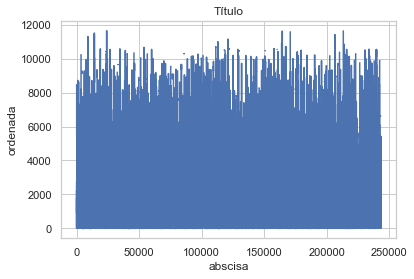

In [372]:
plt.plot(df0)
plt.title("Título")   # Establece el título del gráfico
plt.xlabel("abscisa")   # Establece el título del eje x
plt.ylabel("ordenada")   # Establece el título del eje y


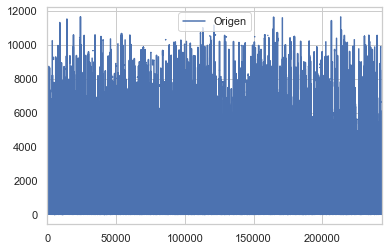

In [373]:
df0.plot()

In [368]:
pd.unique(myData[Mascara_0 ]['orig_destination_distance'].values.ravel())

array([          nan, 3.6234000e+00, 7.7939002e+03, 7.7947409e+03,
       7.7968761e+03, 7.7981471e+03, 7.7951795e+03, 7.6930400e+01,
       7.0706990e+02, 7.0250180e+02, 7.0378470e+02, 7.0750270e+02,
       2.5694660e+02, 6.7079950e+02, 6.7126610e+02, 6.7079430e+02,
       6.7074060e+02, 7.0348080e+02, 6.9580100e+02, 1.0801916e+03,
       7.6293625e+03, 7.7948874e+03, 7.7944296e+03, 5.6961600e+02,
       5.7090800e+02, 7.0872250e+02, 1.8726972e+03, 1.8692759e+03,
       1.8723641e+03, 2.4923540e+02, 7.6044500e+01, 7.6769800e+01,
       8.0565500e+01, 1.8677052e+03, 7.0834890e+02, 1.2088220e+03,
       2.6143473e+03, 2.6135607e+03, 4.3566230e+03, 6.4643360e+02,
       6.1463120e+02, 6.1229650e+02, 6.4609480e+02, 2.5543430e+02,
       2.5373560e+02, 2.5424660e+02, 7.0522650e+02, 4.9623250e+02,
       4.9194050e+02, 4.4731397e+03, 6.9984480e+02, 6.9206790e+02,
       2.5734090e+02, 2.7135230e+02, 8.2598091e+03, 8.5948170e+03,
       6.7460000e-01, 7.7944173e+03, 7.7946257e+03, 7.7943996e

In [364]:
x= myData[Mascara_0 ]['orig_destination_distance']
plot(x)
show()

D:\Open Data\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match

In [362]:
myData[Mascara_0 ]['orig_destination_distance'].plot(kind = 'kde' , style = 'b');

D:\Open Data\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match

In [23]:
Mascara_01 = myData.user_location_country == 1
Mascara_01A = myData.orig_destination_distance > 0
myData[Mascara_01 & Mascara_01A ]

date_time  site_name  posa_continent  user_location_country  \
2362    2014-12-26 10:39:42         23               1                      1   
2363    2014-12-26 10:48:21         23               1                      1   
2364    2014-12-26 15:43:08         23               1                      1   
2365    2014-12-26 15:45:09         23               1                      1   
2366    2014-12-26 15:48:54         23               1                      1   
2367    2014-12-26 15:52:06         23               1                      1   
2368    2014-12-26 15:59:00         23               1                      1   
2369    2014-12-26 16:21:21         23               1                      1   
2370    2014-12-26 16:23:04         23               1                      1   
2371    2014-12-26 16:25:02         23               1                      1   
2372    2014-12-26 16:25:11         23               1                      1   
2373    2014-12-26 16:25:29         23               1                      1   
2374    2014-12-26 16:25:41         23               1                      1   
2375    2014-12-26 16:26:20         23               1                      1   
2376    2014-12-26 16:26:26         23               1                      1   
3595    2013-07-16 18:49:22          8               4                      1   
3596    2013-07-16 18:51:12          8               4                      1   
5109    2013-11-24 10:02:17          2               3                      1   
5110    2013-11-24 10:02:23          2               3                      1   
7509    2014-11-15 17:05:18         23               1                      1   
7510    2014-11-15 17:07:04         23               1                      1   
7511    2014-11-15 17:08:11         23               1                      1   
7512    2014-11-15 17:10:24         23               1                      1   
7513    2014-11-15 17:11:36         23               1                      1   
7514    2014-11-15 17:14:40         23               1                      1   
7515    2014-11-15 17:16:37         23               1                      1   
7516    2014-11-15 17:18:05         23               1                      1   
7517    2014-11-15 17:20:07         23               1                      1   
7518    2014-11-15 17:22:09         23               1                      1   
7519    2014-11-15 17:26:06         23               1                      1   
...                     ...        ...             ...                    ...   
230462  2014-07-15 17:02:42         23               1                      1   
230463  2014-07-15 17:19:54         23               1                      1   
230464  2014-08-02 00:53:38         23               1                      1   
230465  2014-08-02 13:49:28         23               1                      1   
230466  2014-08-02 13:50:33         23               1                      1   
230467  2014-08-02 13:58:52         23               1                      1   
230468  2014-08-02 15:23:45         23               1                      1   
230469  2014-08-02 15:26:51         23               1                      1   
230470  2014-09-04 20:45:36         23               1                      1   
230471  2014-12-09 20:08:45         23               1                      1   
232753  2014-12-30 10:47:59         23               1                      1   
232754  2014-12-30 10:49:22         23               1                      1   
232755  2014-12-30 10:51:18         23               1                      1   
232756  2014-12-30 10:53:23         23               1                      1   
232757  2014-12-30 10:56:13         23               1                      1   
232758  2014-12-30 10:57:33         23               1                      1   
232759  2014-12-30 11:03:03         23               1                      1   
233605  2014-07-14 11:49:00         23           

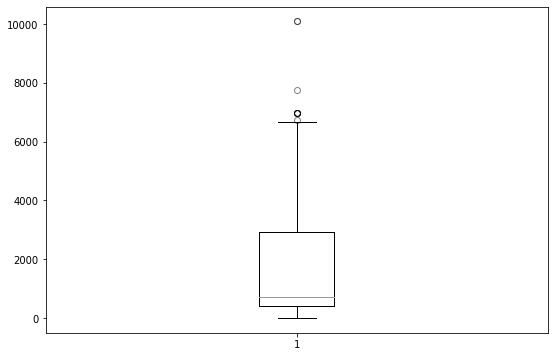

In [25]:
datos_1 =myData[Mascara_01 & Mascara_01A  ].iloc[:,6]


datos_graf = [datos_1]

# Creando el objeto figura
fig = plt.figure(1, figsize=(9, 6))

# Creando el subgrafico
ax = fig.add_subplot(111)

# creando el grafico de cajas
bp = ax.boxplot(datos_graf)

# visualizar mas facile los atípicos
for flier in bp['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)
# los puntos aislados son valores atípicos

In [26]:
d1 = np.percentile(datos_1, 25)
d1

410.0762

In [27]:
E1 = np.percentile(datos_1, 50)
E1

722.6825

In [28]:
R1 = np.percentile(datos_1, 75)
R1

2927.5578

In [773]:
Mascara_016 = myData.user_location_country == 16
myData[Mascara_016 ]

date_time  site_name  posa_continent  user_location_country  \
51746   2014-09-22 02:47:52          2               3                     16   
51747   2014-09-22 02:48:46          2               3                     16   
51748   2014-09-22 02:50:03          2               3                     16   
51749   2014-09-22 02:51:07          2               3                     16   
51750   2014-09-23 08:10:59          2               3                     16   
51751   2014-09-23 08:11:59          2               3                     16   
51752   2014-09-23 08:14:46          2               3                     16   
51753   2014-09-23 08:37:34          2               3                     16   
51754   2014-10-10 08:53:44          2               3                     16   
51755   2014-10-10 08:56:51          2               3                     16   
51756   2014-10-10 08:57:56          2               3                     16   
51757   2014-10-10 09:01:21          2               3                     16   
51758   2014-10-10 09:03:57          2               3                     16   
51759   2014-10-10 09:12:36          2               3                     16   
51760   2014-10-10 09:41:07          2               3                     16   
51761   2014-10-10 09:46:19          2               3                     16   
51762   2014-10-27 02:21:37          2               3                     16   
51763   2014-10-27 02:27:49          2               3                     16   
51764   2014-10-27 04:02:00          2               3                     16   
51765   2014-10-27 04:02:36          2               3                     16   
51766   2014-10-27 04:05:57          2               3                     16   
51767   2014-10-27 04:07:34          2               3                     16   
51768   2014-10-27 04:08:15          2               3                     16   
208285  2014-11-25 05:20:17          2               3                     16   
208286  2014-11-25 05:32:18          2               3                     16   
208287  2014-11-25 05:36:22          2               3                     16   
208288  2014-11-25 05:49:05          2               3                     16   

        user_location_region  user_location_city  orig_destination_distance  \
51746                    154               12548                    86.8923   
51747                    154               12548                    90.0815   
51748                    154               12548                    90.7257   
51749                    154               12548                    89.7199   
51750                    154               12548                     2.3991   
51751                    154               12548                     0.1518   
51752                    154               12548                     0.1518   
51753                    154               12548                     5.1583   
51754                    154               12548                     2.3991   
51755                    154               12548                     2.3991   
51756                    154               12548                    12.3461   
51757                    154               12548                     0.6810   
51758                    154               12548                     5.1583   
51759                    154               12548                     0.6161   
51760                    154               12548                     2.5258   
51761                    154               12548                     2.5258   
51762                    154               12548                     0.6161   
51763                    154               12548                     0.6161   
51764                    154               12548                  1623.7226   
51765                    154               12548                  1621.9478   
51766                    154               12548                  1621.8592   
51767      

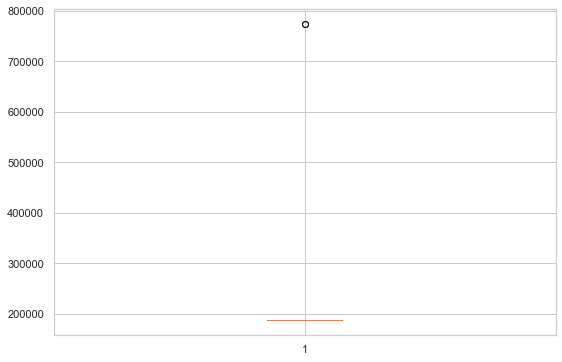

In [774]:
datos_1 =myData[Mascara_016 ].iloc[:,7]


datos_graf = [datos_1]

# Creando el objeto figura
fig = plt.figure(1, figsize=(9, 6))

# Creando el subgrafico
ax = fig.add_subplot(111)

# creando el grafico de cajas
bp = ax.boxplot(datos_graf)

# visualizar mas facile los atípicos
for flier in bp['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)
# los puntos aislados son valores atípicos

In [251]:
ArrayAnalizar = np.array(myData[Mascara_016 ])

TypeError: '<' not supported between instances of 'int' and 'str'

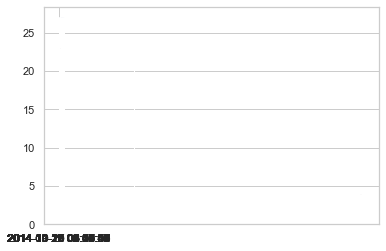

In [254]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


plt.hist(ArrayAnalizar, 50)

perc75np = np.percentile(ArrayAnalizar, 75)
perc75sc = stats.scoreatpercentile(ArrayAnalizar, 75)

deciles = np.arange(1, 10) * 10
deciles_dist = [np.percentile(ArrayAnalizar, dec) for dec in deciles]
plt.show()

TypeError: '<' not supported between instances of 'int' and 'str'

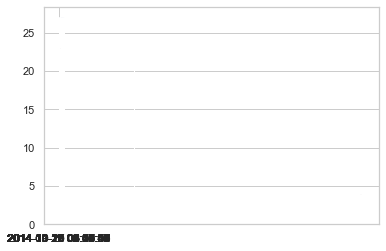

In [258]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

alturas = ArrayAnalizar
plt.hist(alturas, 50)
#plt.show()
perc75np = np.percentile(alturas, 75)
perc75sc = stats.scoreatpercentile(alturas, 75)

deciles = np.arange(1, 10) * 10
deciles_dist = [np.percentile(alturas, dec) for dec in deciles]

In [775]:
d16 = np.percentile(datos_1, 25)
d

220775.0

In [228]:
e = np.percentile(datos_1, 50)
e

186627.0

In [229]:
f = np.percentile(datos_1, 75)
f

186627.0

In [168]:
Mascara_01 = myData.user_location_country == 0
Mascara_02 = myData.orig_destination_distance <720107
Mascara_03 = myData.orig_destination_distance >220775
myData[Mascara_01 & Mascara_02 & Mascara_03]

Empty DataFrame
Columns: [date_time, site_name, posa_continent, user_location_country, user_location_region, user_location_city, orig_destination_distance, user_id, is_mobile, is_package, channel, srch_adults_cnt, srch_children_cnt, srch_rm_cnt, srch_destination_id, srch_destination_type_id, is_booking, cnt, hotel_continent, hotel_country, hotel_market, hotel_cluster, perc]
Index: []

[0 rows x 23 columns]

In [150]:
myData[Mascara_1].groupby('user_location_country')['orig_destination_distance'].apply(lambda group_series: group_series.tolist()).reset_index()

user_location_country                          orig_destination_distance
0                       0  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
1                       1  [1047.4365, 1047.0505, 534.6071, 534.1447, 534...
2                       3  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
3                       4      [nan, nan, nan, nan, nan, nan, nan, nan, nan]
4                       5  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
5                       6  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
6                      10  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
7                      12  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
8                      13                          [nan, nan, nan, nan, nan]
9                      15  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
10                     16  [86.8923, 90.0815, 90.7257, 89.7199, 2.3991, 0...
11                     19  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
12                     23  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
13                     24  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...

Como podemos observar hay una gran cantidad de valores nulos que de NO nulos

La funcion de abajo lo que hace es me escribe los 10 valores que mas se repite de la columna indicada y me dice el numero de veces que se repiten

In [78]:
myData[Mascara_1]['user_location_country'].value_counts()

3     7017
1     3753
23    2189
12     764
0      684
5      441
19     175
24     156
6       29
16      27
10      26
15      13
4        9
13       5
Name: user_location_country, dtype: int64

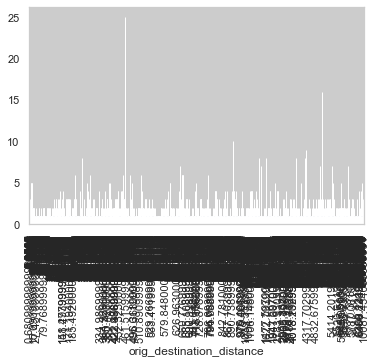

In [474]:
plt.clf()
myData[Mascara_1].groupby('orig_destination_distance').size().plot(kind='bar')
plt.show()

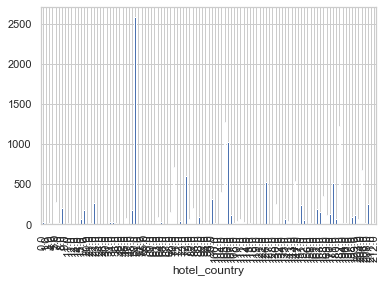

In [454]:

plt.clf()
myData[Mascara_1].groupby('hotel_country').size().plot(kind='bar')
plt.show()

la cantidad que hay de cada valor, es decir hay 7000 valores en los que el user_location_country es 3 

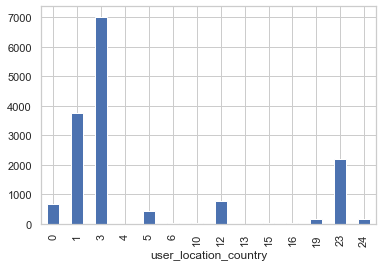

In [148]:
plt.clf()
myData[Mascara_1].groupby('user_location_country').size().plot(kind='bar')
plt.show()

**MASCARA 2**

In [81]:
Mascara_2 = myData.user_location_country > 25
Mascara_3 = myData.user_location_country <50
myData[Mascara_2 & Mascara_3]

date_time  site_name  posa_continent  user_location_country  \
748     2013-01-11 13:15:32         13               1                     46   
749     2013-01-28 10:45:10         13               1                     46   
750     2013-01-28 10:45:58         13               1                     46   
751     2013-01-28 10:46:43         13               1                     46   
752     2013-03-14 15:12:01         13               1                     46   
753     2013-03-14 15:16:57         13               1                     46   
754     2013-04-09 18:06:34         13               1                     46   
755     2013-06-07 13:34:25         13               1                     46   
756     2013-06-12 11:58:14         13               1                     46   
757     2013-06-12 16:45:01         13               1                     46   
758     2013-08-21 15:15:34         13               1                     46   
759     2013-08-21 15:23:09         13               1                     46   
760     2013-09-04 11:19:14         13               1                     46   
761     2013-09-04 11:21:36         13               1                     46   
762     2013-09-27 17:18:31         13               1                     46   
763     2013-09-27 17:36:20         13               1                     46   
764     2013-09-27 17:36:55         13               1                     46   
765     2013-10-09 11:29:17         13               1                     46   
766     2013-10-17 09:10:25         13               1                     46   
767     2013-11-17 08:29:26         13               1                     46   
768     2013-11-17 08:32:18         13               1                     46   
769     2013-11-20 10:27:40         13               1                     46   
770     2013-11-20 10:29:39         13               1                     46   
771     2013-11-20 10:48:41         13               1                     46   
772     2013-11-20 10:51:13         13               1                     46   
773     2013-11-20 12:00:08         13               1                     46   
774     2013-11-20 12:03:02         13               1                     46   
775     2013-11-21 11:13:27         13               1                     46   
776     2013-11-21 11:15:09         13               1                     46   
777     2013-11-26 16:29:22         13               1                     46   
...                     ...        ...             ...                    ...   
241259  2014-11-04 18:12:53         13               1                     46   
241260  2014-11-04 18:15:25         13               1                     46   
241261  2014-11-04 22:32:35         13               1                     46   
241262  2014-11-04 22:38:02         13               1                     46   
241263  2014-11-04 23:13:04         13               1                     46   
241264  2014-11-04 23:13:14         13               1                     46   
241265  2014-11-04 23:14:53         13               1                     46   
241266  2014-11-04 23:16:43         13               1                     46   
241267  2014-11-04 23:18:42         13               1                     46   
241268  2014-11-04 23:20:32         13               1                     46   
241269  2014-11-04 23:21:32         13               1                     46   
241270  2014-11-04 23:22:21         13               1                     46   
241271  2014-11-04 23:26:04         13               1                     46   
241272  2014-11-04 23:53:30         13               1                     46   
241273  2014-11-04 23:58:58         13               1                     46   
241274  2014-11-05 00:00:54         13               1                     46   
241275  2014-11-05 00:01:07         13               1                     46   
241276  2014-11-05 00:04:10         13           

In [169]:
#creamos dos funciones que nos cuenten los valores nulos y los no nulos
def count_nulos(series):
  return len([elem for elem in series if elem * 1 != elem]) #  != para  nulos, == para los no nulos
def count_NoNulos(series):
  return len([elem for elem in series if elem * 1 == elem])

#contamos los nulos que tiene cada valor de user_location_country en la columna orig_destination_distance, el valor user_location_country 0 tiene 4 valores nulos en la columna orig_destination_distance
dnull=myData[Mascara_2 & Mascara_3].groupby('user_location_country')['orig_destination_distance'].apply(count_nulos).reset_index(name='nulos')
#contamos los no nulos que tiene cada valor de user_location_country en la columna orig_destination_distance, el valor user_location_country 0 tiene 4 valores no nulos en la columna orig_destination_distance
dNotnull=myData[Mascara_2 & Mascara_3].groupby('user_location_country')['orig_destination_distance'].apply(count_NoNulos).reset_index(name='NoNulos')

#añadimos una columna para los valooresNoNulos, los valores totales
dnull['ValoresNoNulos']=dNotnull['NoNulos'] 
dnull['ValoresTotales'] = dnull['nulos'] + dNotnull['NoNulos']

#añadimos otras dos columnas para el %NoNulos y el %nulos, y lo configuramos para que se nos devuelvan solo dos decimales
resNull=100*dnull['nulos']/(dnull['nulos'] + dNotnull['NoNulos'])
resultNull=round(resNull,2)
dnull['%Nulos'] = resultNull
resNoNull=100*dNotnull['NoNulos']/(dnull['nulos'] + dNotnull['NoNulos'])
resultNoNull=round(resNoNull,2)
dnull['%NoNulos'] = resultNoNull

#imprimimos el subdataset que acabamos de construir
dnull

user_location_country  nulos  ValoresNoNulos  ValoresTotales  %Nulos  \
0                      26    102               0             102  100.00   
1                      27     27               0              27  100.00   
2                      28    385               0             385  100.00   
3                      29    231               0             231  100.00   
4                      30    135               0             135  100.00   
5                      31      5               0               5  100.00   
6                      32    366               0             366  100.00   
7                      34     54               0              54  100.00   
8                      39    221               0             221  100.00   
9                      43      0              23              23    0.00   
10                     44     43               0              43  100.00   
11                     45      1               0               1  100.00   
12                     46   1369            4370            5739   23.85   
13                     47     64               0              64  100.00   
14                     48    568               0             568  100.00   
15                     49     54               0              54  100.00   

    %NoNulos  
0       0.00  
1       0.00  
2       0.00  
3       0.00  
4       0.00  
5       0.00  
6       0.00  
7       0.00  
8       0.00  
9     100.00  
10      0.00  
11      0.00  
12     76.15  
13      0.00  
14      0.00  
15      0.00

In [170]:
grouped_myData=myData[Mascara_2 & Mascara_3].groupby('user_location_country').agg({'orig_destination_distance':['min','max','mean']})
grouped_myData

orig_destination_distance                         
                                            min         max         mean
user_location_country                                                   
26                                          NaN         NaN          NaN
27                                          NaN         NaN          NaN
28                                          NaN         NaN          NaN
29                                          NaN         NaN          NaN
30                                          NaN         NaN          NaN
31                                          NaN         NaN          NaN
32                                          NaN         NaN          NaN
34                                          NaN         NaN          NaN
39                                          NaN         NaN          NaN
43                                       0.6303    821.8183   678.212587
44                                          NaN         NaN          NaN
45                                          NaN         NaN          NaN
46                                       0.2662  11508.7000  2564.496224
47                                          NaN         NaN          NaN
48                                          NaN         NaN          NaN
49                                          NaN         NaN          NaN

In [29]:
Mascara_046 = myData.user_location_country == 46
Mascara_046A = myData.orig_destination_distance>0
myData[Mascara_046 &Mascara_046A ]

date_time  site_name  posa_continent  user_location_country  \
748     2013-01-11 13:15:32         13               1                     46   
752     2013-03-14 15:12:01         13               1                     46   
753     2013-03-14 15:16:57         13               1                     46   
754     2013-04-09 18:06:34         13               1                     46   
755     2013-06-07 13:34:25         13               1                     46   
756     2013-06-12 11:58:14         13               1                     46   
757     2013-06-12 16:45:01         13               1                     46   
758     2013-08-21 15:15:34         13               1                     46   
759     2013-08-21 15:23:09         13               1                     46   
760     2013-09-04 11:19:14         13               1                     46   
761     2013-09-04 11:21:36         13               1                     46   
762     2013-09-27 17:18:31         13               1                     46   
763     2013-09-27 17:36:20         13               1                     46   
764     2013-09-27 17:36:55         13               1                     46   
766     2013-10-17 09:10:25         13               1                     46   
767     2013-11-17 08:29:26         13               1                     46   
768     2013-11-17 08:32:18         13               1                     46   
769     2013-11-20 10:27:40         13               1                     46   
770     2013-11-20 10:29:39         13               1                     46   
771     2013-11-20 10:48:41         13               1                     46   
772     2013-11-20 10:51:13         13               1                     46   
773     2013-11-20 12:00:08         13               1                     46   
774     2013-11-20 12:03:02         13               1                     46   
775     2013-11-21 11:13:27         13               1                     46   
776     2013-11-21 11:15:09         13               1                     46   
777     2013-11-26 16:29:22         13               1                     46   
780     2014-02-08 12:58:03         13               1                     46   
781     2014-02-08 13:03:02         13               1                     46   
782     2014-03-06 11:00:27         13               1                     46   
783     2014-03-06 11:03:15         13               1                     46   
...                     ...        ...             ...                    ...   
241259  2014-11-04 18:12:53         13               1                     46   
241260  2014-11-04 18:15:25         13               1                     46   
241261  2014-11-04 22:32:35         13               1                     46   
241262  2014-11-04 22:38:02         13               1                     46   
241263  2014-11-04 23:13:04         13               1                     46   
241264  2014-11-04 23:13:14         13               1                     46   
241265  2014-11-04 23:14:53         13               1                     46   
241266  2014-11-04 23:16:43         13               1                     46   
241267  2014-11-04 23:18:42         13               1                     46   
241268  2014-11-04 23:20:32         13               1                     46   
241269  2014-11-04 23:21:32         13               1                     46   
241270  2014-11-04 23:22:21         13               1                     46   
241271  2014-11-04 23:26:04         13               1                     46   
241272  2014-11-04 23:53:30         13               1                     46   
241273  2014-11-04 23:58:58         13               1                     46   
241274  2014-11-05 00:00:54         13               1                     46   
241275  2014-11-05 00:01:07         13               1                     46   
241276  2014-11-05 00:04:10         13           

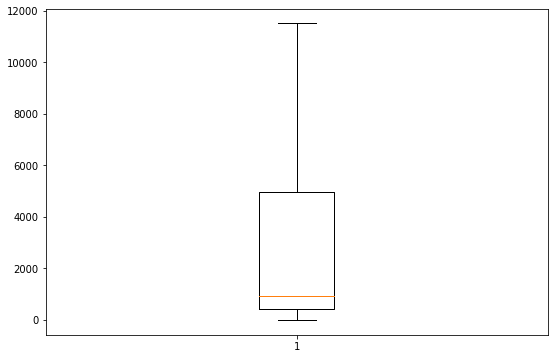

In [38]:
datos_1 =myData[Mascara_046 & Mascara_046A ].iloc[:,6]


datos_graf = [datos_1]

# Creando el objeto figura
fig = plt.figure(1, figsize=(9, 6))

# Creando el subgrafico
ax = fig.add_subplot(111)

# creando el grafico de cajas
bp = ax.boxplot(datos_graf)

# visualizar mas facile los atípicos
for flier in bp['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)
# los puntos aislados son valores atípicos

In [39]:
d = np.percentile(datos_1, 25)
d

416.544

In [40]:
e = np.percentile(datos_1, 50)
e

946.6015

In [41]:
f = np.percentile(datos_1, 75)
f

4955.7992

In [34]:
pd.unique(myData[Mascara_046 & Mascara_046A ]['hotel_country'].values.ravel())

array([203., 208.,  50.,  22.,  99.,   0.,  68.,  46., 107.,  77., 204.,
       163.,  11., 144.,  48., 146.,  51., 182.,  82., 105., 193., 169.,
        34.,  70.,  21., 168., 170.,  63., 152.,  92., 206., 199.,   7.,
       198., 135., 159., 194., 106., 162., 141., 122.,   4., 104., 200.,
         8., 180.,  15., 127.,   5.,  31., 111., 186., 119., 126.,  17.,
        53., 100.,  79.,  26., 115.,  10., 176.,  36.,  19.,   9., 185.,
        98., 125., 124., 171., 196., 132., 136., 139.,  20.,  72., 151.,
       128.,   3.])

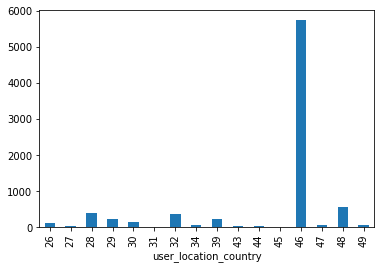

In [83]:
plt.clf()
myData[Mascara_2 & Mascara_3].groupby('user_location_country').size().plot(kind='bar')
plt.show()

**MASCARA 3**

In [84]:
Mascara_4 = myData.user_location_country > 50
Mascara_5 = myData.user_location_country < 75
myData[Mascara_4 & Mascara_5]

date_time  site_name  posa_continent  user_location_country  \
0       2014-08-11 07:46:59          2               3                     66   
1       2014-08-11 08:22:12          2               3                     66   
2       2014-08-11 08:24:33          2               3                     66   
3       2014-08-09 18:05:16          2               3                     66   
4       2014-08-09 18:08:18          2               3                     66   
5       2014-08-09 18:13:12          2               3                     66   
6       2014-07-16 09:42:23          2               3                     66   
7       2014-07-16 09:45:48          2               3                     66   
8       2014-07-16 09:52:11          2               3                     66   
9       2014-07-16 09:55:24          2               3                     66   
10      2014-07-16 10:00:06          2               3                     66   
11      2014-07-16 10:02:58          2               3                     66   
12      2014-01-17 06:24:56          2               3                     66   
13      2014-01-18 14:33:31          2               3                     66   
14      2014-01-21 06:39:08          2               3                     66   
15      2014-01-21 06:40:18          2               3                     66   
16      2014-01-22 06:10:02          2               3                     66   
17      2014-01-24 11:52:04          2               3                     66   
18      2014-01-24 17:26:24          2               3                     66   
19      2014-02-27 17:44:23          2               3                     66   
20      2014-02-27 18:01:32          2               3                     66   
21      2014-12-30 09:50:51          2               3                     66   
22      2014-12-30 09:55:43          2               3                     66   
23      2014-12-30 09:56:26          2               3                     66   
24      2014-10-22 12:20:56          2               3                     66   
25      2014-11-10 12:38:02          2               3                     66   
74      2013-02-15 13:18:43          2               3                     66   
75      2013-02-16 11:57:50          2               3                     66   
76      2013-02-16 12:03:45          2               3                     66   
77      2013-02-16 12:23:57          2               3                     66   
...                     ...        ...             ...                    ...   
243414  2014-10-03 10:13:51         37               1                     69   
243415  2014-10-21 15:10:49         37               1                     69   
243416  2014-10-25 16:10:26         37               1                     69   
243417  2014-10-25 16:11:42         37               1                     69   
243418  2014-10-25 16:15:07         37               1                     69   
243419  2014-10-26 09:57:10         37               1                     69   
243420  2014-10-26 09:59:10         37               1                     69   
243421  2014-10-26 19:39:39         37               1                     69   
243422  2014-10-26 19:44:49         37               1                     69   
243423  2014-10-26 19:45:27         37               1                     69   
243424  2014-10-26 19:50:35         37               1                     69   
243425  2014-10-29 16:07:17         37               1                     69   
243426  2014-10-29 16:07:49         37               1                     69   
243427  2014-10-29 16:09:02         37               1                     69   
243428  2014-10-29 16:13:01         37               1                     69   
243429  2014-10-31 15:48:49         37               1                     69   
243430  2014-10-31 16:03:28         37               1                     69   
243431  2014-10-31 16:29:02         37           

In [176]:
#creamos dos funciones que nos cuenten los valores nulos y los no nulos
def count_nulos(series):
  return len([elem for elem in series if elem * 1 != elem]) #  != para  nulos, == para los no nulos
def count_NoNulos(series):
  return len([elem for elem in series if elem * 1 == elem])

#contamos los nulos que tiene cada valor de user_location_country en la columna orig_destination_distance, el valor user_location_country 0 tiene 4 valores nulos en la columna orig_destination_distance
dnull=myData[Mascara_4 & Mascara_5].groupby('user_location_country')['orig_destination_distance'].apply(count_nulos).reset_index(name='nulos')
#contamos los no nulos que tiene cada valor de user_location_country en la columna orig_destination_distance, el valor user_location_country 0 tiene 4 valores no nulos en la columna orig_destination_distance
dNotnull=myData[Mascara_4 & Mascara_5].groupby('user_location_country')['orig_destination_distance'].apply(count_NoNulos).reset_index(name='NoNulos')

#añadimos una columna para los valooresNoNulos, los valores totales
dnull['ValoresNoNulos']=dNotnull['NoNulos'] 
dnull['ValoresTotales'] = dnull['nulos'] + dNotnull['NoNulos']

#añadimos otras dos columnas para el %NoNulos y el %nulos, y lo configuramos para que se nos devuelvan solo dos decimales
resNull=100*dnull['nulos']/(dnull['nulos'] + dNotnull['NoNulos'])
resultNull=round(resNull,2)
dnull['%Nulos'] = resultNull
resNoNull=100*dNotnull['NoNulos']/(dnull['nulos'] + dNotnull['NoNulos'])
resultNoNull=round(resNoNull,2)
dnull['%NoNulos'] = resultNoNull

#imprimimos el subdataset que acabamos de construir
dnull

user_location_country  nulos  ValoresNoNulos  ValoresTotales  %Nulos  \
0                      51     23               0              23  100.00   
1                      52    697               0             697  100.00   
2                      54     10               0              10  100.00   
3                      55    693               3             696   99.57   
4                      57    553               0             553  100.00   
5                      58    192               0             192  100.00   
6                      59     18               0              18  100.00   
7                      60      1               0               1  100.00   
8                      62    730               0             730  100.00   
9                      63    104             318             422   24.64   
10                     64     38               0              38  100.00   
11                     65     22               0              22  100.00   
12                     66  16852          124039          140891   11.96   
13                     67      3               0               3  100.00   
14                     68    615               0             615  100.00   
15                     69  19560             101           19661   99.49   
16                     70   1715               0            1715  100.00   
17                     71    341               0             341  100.00   
18                     72      3               0               3  100.00   
19                     73      4               0               4  100.00   
20                     74      6               0               6  100.00   

    %NoNulos  
0       0.00  
1       0.00  
2       0.00  
3       0.43  
4       0.00  
5       0.00  
6       0.00  
7       0.00  
8       0.00  
9      75.36  
10      0.00  
11      0.00  
12     88.04  
13      0.00  
14      0.00  
15      0.51  
16      0.00  
17      0.00  
18      0.00  
19      0.00  
20      0.00

In [177]:
grouped_myData=myData[Mascara_4 & Mascara_5].groupby('user_location_country').agg({'orig_destination_distance':['min','max','mean']})
grouped_myData

orig_destination_distance                         
                                            min         max         mean
user_location_country                                                   
51                                          NaN         NaN          NaN
52                                          NaN         NaN          NaN
54                                          NaN         NaN          NaN
55                                      81.7849     83.6931    82.423800
57                                          NaN         NaN          NaN
58                                          NaN         NaN          NaN
59                                          NaN         NaN          NaN
60                                          NaN         NaN          NaN
62                                          NaN         NaN          NaN
63                                       1.5394   7565.4114  1638.376708
64                                          NaN         NaN          NaN
65                                          NaN         NaN          NaN
66                                       0.0056  10858.8382  1829.698300
67                                          NaN         NaN          NaN
68                                          NaN         NaN          NaN
69                                      39.2838   7196.6775  1860.738830
70                                          NaN         NaN          NaN
71                                          NaN         NaN          NaN
72                                          NaN         NaN          NaN
73                                          NaN         NaN          NaN
74                                          NaN         NaN          NaN

In [35]:
Mascara_063 = myData.user_location_country == 63
Mascara_046A = myData.orig_destination_distance>0
myData[Mascara_063 & Mascara_046A ]

date_time  site_name  posa_continent  user_location_country  \
40383   2013-08-06 21:37:08         17               1                     63   
40384   2013-08-06 21:38:37         17               1                     63   
40385   2013-08-06 21:39:19         17               1                     63   
40386   2013-08-09 00:19:04         17               1                     63   
40387   2013-08-09 00:33:01         17               1                     63   
40388   2013-08-09 00:36:33         17               1                     63   
40389   2013-08-09 00:43:12         17               1                     63   
40405   2013-12-04 22:31:39         17               1                     63   
40406   2013-12-04 22:33:46         17               1                     63   
40407   2013-12-04 22:39:18         17               1                     63   
40408   2013-12-04 22:42:21         17               1                     63   
40409   2013-12-15 01:05:29         17               1                     63   
40410   2013-12-15 01:07:14         17               1                     63   
40411   2013-12-15 01:13:25         17               1                     63   
40412   2013-12-15 01:16:52         17               1                     63   
40413   2013-12-15 01:20:37         17               1                     63   
40414   2013-12-22 15:13:09         17               1                     63   
40415   2013-12-31 13:52:35         17               1                     63   
40416   2013-12-31 13:53:17         17               1                     63   
40417   2013-12-31 14:01:30         17               1                     63   
40418   2013-12-31 14:06:47         17               1                     63   
40419   2013-12-31 14:14:53         17               1                     63   
40420   2013-12-31 14:38:17         17               1                     63   
40421   2013-12-31 14:39:32         17               1                     63   
40422   2013-12-31 14:43:11         17               1                     63   
40423   2013-12-31 14:44:36         17               1                     63   
40424   2013-12-31 14:44:46         17               1                     63   
40425   2013-12-31 14:48:09         17               1                     63   
40426   2013-12-31 14:50:43         17               1                     63   
40427   2013-12-31 14:51:07         17               1                     63   
...                     ...        ...             ...                    ...   
213158  2014-12-29 21:12:44         13               1                     63   
213159  2014-12-29 21:14:33         13               1                     63   
213160  2014-12-29 21:15:22         13               1                     63   
213161  2014-12-29 21:16:15         13               1                     63   
213162  2014-12-29 21:17:59         13               1                     63   
213163  2014-12-29 21:18:42         13               1                     63   
213164  2014-12-30 07:33:35         13               1                     63   
213165  2014-12-30 07:34:55         13               1                     63   
213166  2014-12-30 07:36:12         13               1                     63   
213167  2014-12-30 07:37:04         13               1                     63   
213168  2014-12-30 07:39:13         13               1                     63   
214924  2014-07-23 05:21:04          2               3                     63   
224878  2014-09-22 20:16:45         13               1                     63   
224879  2014-09-22 20:56:40         13               1                     63   
224880  2014-09-22 21:00:13         13               1                     63   
224881  2014-09-22 21:05:04         13               1                     63   
224882  2014-09-22 21:27:08         13               1                     63   
224883  2014-09-24 21:13:12         13           

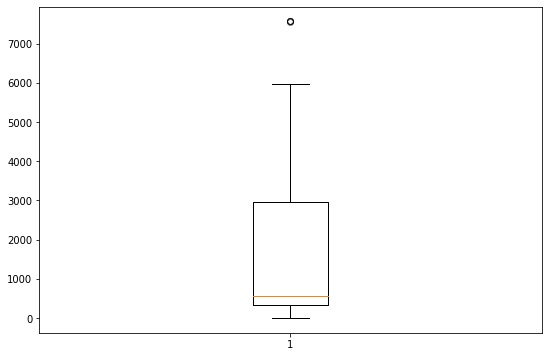

In [37]:
datos_1 =myData[Mascara_063 & Mascara_046A].iloc[:,6]


datos_graf = [datos_1]

# Creando el objeto figura
fig = plt.figure(1, figsize=(9, 6))

# Creando el subgrafico
ax = fig.add_subplot(111)

# creando el grafico de cajas
bp = ax.boxplot(datos_graf)

# visualizar mas facile los atípicos
for flier in bp['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)
# los puntos aislados son valores atípicos

In [42]:
d = np.percentile(datos_1, 25)
d

416.544

In [43]:
e = np.percentile(datos_1, 50)
e

946.6015

In [44]:
f = np.percentile(datos_1, 75)
f

4955.7992

In [45]:
Mascara_066 = myData.user_location_country == 66
Mascara_046A = myData.orig_destination_distance>0
myData[Mascara_066 & Mascara_046A ]

date_time  site_name  posa_continent  user_location_country  \
0       2014-08-11 07:46:59          2               3                     66   
1       2014-08-11 08:22:12          2               3                     66   
2       2014-08-11 08:24:33          2               3                     66   
3       2014-08-09 18:05:16          2               3                     66   
4       2014-08-09 18:08:18          2               3                     66   
5       2014-08-09 18:13:12          2               3                     66   
12      2014-01-17 06:24:56          2               3                     66   
14      2014-01-21 06:39:08          2               3                     66   
15      2014-01-21 06:40:18          2               3                     66   
16      2014-01-22 06:10:02          2               3                     66   
17      2014-01-24 11:52:04          2               3                     66   
24      2014-10-22 12:20:56          2               3                     66   
25      2014-11-10 12:38:02          2               3                     66   
74      2013-02-15 13:18:43          2               3                     66   
75      2013-02-16 11:57:50          2               3                     66   
76      2013-02-16 12:03:45          2               3                     66   
77      2013-02-16 12:23:57          2               3                     66   
78      2014-01-03 16:19:15          2               3                     66   
79      2014-01-03 16:30:17          2               3                     66   
80      2014-01-03 16:34:26          2               3                     66   
81      2014-01-03 16:44:56          2               3                     66   
82      2014-01-03 16:58:19          2               3                     66   
83      2014-01-03 17:11:36          2               3                     66   
84      2014-01-04 14:57:08          2               3                     66   
85      2014-01-04 15:01:54          2               3                     66   
86      2014-01-04 15:02:07          2               3                     66   
87      2014-01-08 13:28:56          2               3                     66   
88      2014-01-08 13:31:34          2               3                     66   
89      2014-01-08 13:38:03          2               3                     66   
90      2014-01-08 13:42:16          2               3                     66   
...                     ...        ...             ...                    ...   
243367  2014-07-28 20:55:05          2               3                     66   
243368  2014-07-28 20:56:12          2               3                     66   
243369  2014-07-28 20:57:46          2               3                     66   
243370  2014-07-28 21:00:21          2               3                     66   
243371  2014-07-28 21:02:08          2               3                     66   
243372  2014-07-28 21:03:18          2               3                     66   
243373  2014-07-28 21:10:36          2               3                     66   
243374  2014-07-28 21:17:03          2               3                     66   
243375  2014-07-28 21:18:18          2               3                     66   
243376  2014-07-28 21:23:21          2               3                     66   
243378  2014-08-12 21:01:48          2               3                     66   
243379  2014-08-12 21:02:11          2               3                     66   
243380  2014-08-12 21:08:58          2               3                     66   
243381  2014-08-12 21:24:44          2               3                     66   
243383  2014-08-25 16:12:20          2               3                     66   
243384  2014-08-30 13:18:45          2               3                     66   
243385  2014-09-02 17:43:09          2               3                     66   
243386  2014-09-14 16:58:21          2           

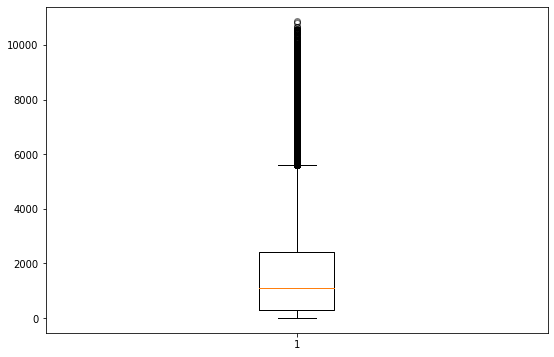

In [46]:
datos_1 =myData[Mascara_066 & Mascara_046A ].iloc[:,6]


datos_graf = [datos_1]

# Creando el objeto figura
fig = plt.figure(1, figsize=(9, 6))

# Creando el subgrafico
ax = fig.add_subplot(111)

# creando el grafico de cajas
bp = ax.boxplot(datos_graf)

# visualizar mas facile los atípicos
for flier in bp['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)
# los puntos aislados son valores atípicos

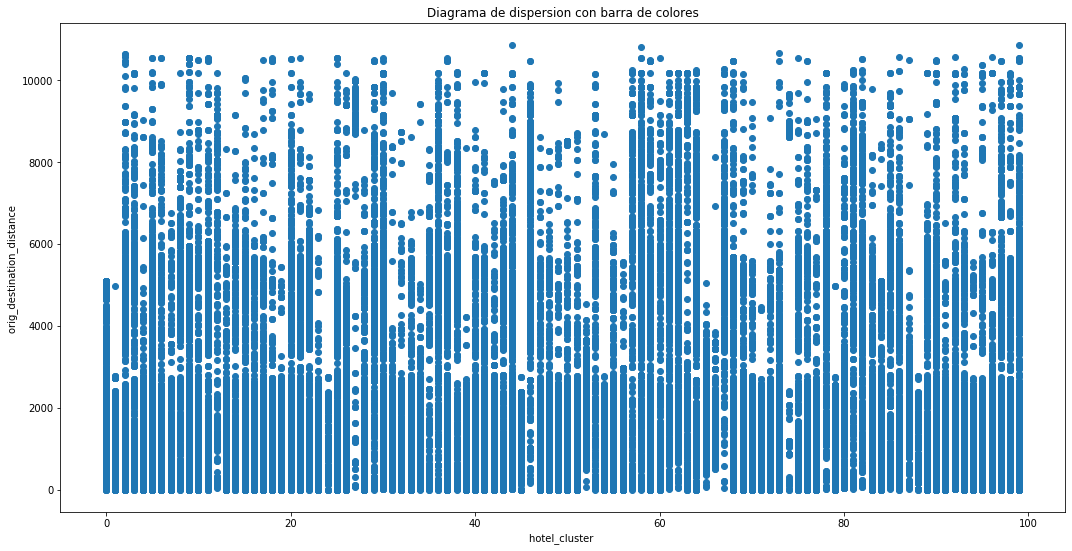

In [56]:
fig, ax1 = plt.subplots(nrows = 1, figsize=(18,9))   
sc = ax1.scatter(myData[Mascara_066 & Mascara_046A ]["hotel_cluster"], myData[Mascara_066 & Mascara_046A ]["orig_destination_distance"], marker = 'o')  
ax1.set_title('Diagrama de dispersion con barra de colores')
ax1.set_xlabel('hotel_cluster ')
ax1.set_ylabel('orig_destination_distance ') 
# expresiones regulares; patron quer nos permite encontrar caracteres sixtrix.es y regexr \w{1,20}[.]\w{1,20}[@]\w{1,20}(.es)
plt.show(sc)

In [47]:
d = np.percentile(datos_1, 25)
d

291.9873

In [48]:
e = np.percentile(datos_1, 50)
e

1084.645

In [49]:
f = np.percentile(datos_1, 75)
f

2416.1832999999997

In [50]:
Mascara_069 = myData.user_location_country == 69
Mascara_046A = myData.orig_destination_distance>0
myData[Mascara_069 & Mascara_046A ]

date_time  site_name  posa_continent  user_location_country  \
14079   2014-09-27 16:28:03         37               1                     69   
14080   2014-09-27 16:41:43         37               1                     69   
14087   2014-11-13 14:07:24         37               1                     69   
14088   2014-11-13 14:09:08         37               1                     69   
14089   2014-11-13 14:14:06         37               1                     69   
47557   2014-08-11 20:44:29         37               1                     69   
47558   2014-08-11 21:03:01         37               1                     69   
47559   2014-08-11 21:32:26         37               1                     69   
47560   2014-08-11 21:32:43         37               1                     69   
47561   2014-08-11 21:34:47         37               1                     69   
47562   2014-08-11 21:36:06         37               1                     69   
47563   2014-08-11 21:36:34         37               1                     69   
47564   2014-08-11 21:37:40         37               1                     69   
47565   2014-08-11 21:39:17         37               1                     69   
47566   2014-08-11 21:41:29         37               1                     69   
47567   2014-08-11 21:44:04         37               1                     69   
47568   2014-08-11 21:44:51         37               1                     69   
47569   2014-08-11 21:44:56         37               1                     69   
47570   2014-08-11 21:56:06         37               1                     69   
47571   2014-08-11 21:58:11         37               1                     69   
47572   2014-08-11 21:58:23         37               1                     69   
47573   2014-08-11 22:00:25         37               1                     69   
47574   2014-08-11 22:01:18         37               1                     69   
47575   2014-08-11 22:03:37         37               1                     69   
47576   2014-08-11 22:05:47         37               1                     69   
47577   2014-08-11 22:10:42         37               1                     69   
47578   2014-08-11 22:12:19         37               1                     69   
47579   2014-08-11 22:54:44         37               1                     69   
47580   2014-08-11 22:55:54         37               1                     69   
47581   2014-08-11 23:17:03         37               1                     69   
...                     ...        ...             ...                    ...   
191236  2014-11-04 19:06:57         37               1                     69   
191237  2014-11-04 19:08:07         37               1                     69   
193465  2014-04-23 10:38:34         37               1                     69   
193466  2014-04-23 10:41:36         37               1                     69   
193467  2014-04-25 14:48:28         37               1                     69   
193468  2014-04-25 14:52:12         37               1                     69   
193469  2014-04-25 14:54:37         37               1                     69   
193470  2014-04-25 14:58:41         37               1                     69   
193471  2014-04-25 15:01:12         37               1                     69   
193472  2014-04-26 17:18:29         37               1                     69   
193473  2014-04-26 17:29:26         37               1                     69   
193474  2014-04-26 17:31:36         37               1                     69   
193475  2014-04-26 17:42:22         37               1                     69   
193476  2014-04-26 17:43:56         37               1                     69   
193496  2014-06-04 13:48:33         37               1                     69   
193497  2014-06-04 14:46:34         37               1                     69   
193498  2014-06-04 14:48:27         37               1                     69   
193499  2014-06-04 14:49:37         37           

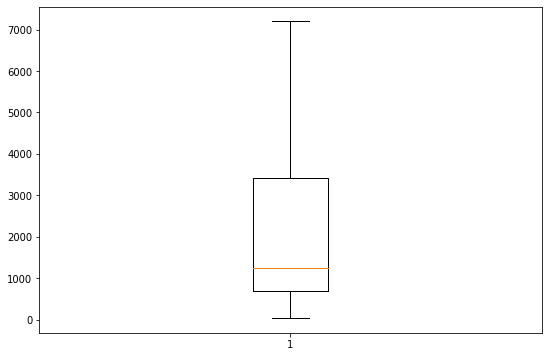

In [51]:
datos_1 =myData[Mascara_069 & Mascara_046A].iloc[:,6]


datos_graf = [datos_1]

# Creando el objeto figura
fig = plt.figure(1, figsize=(9, 6))

# Creando el subgrafico
ax = fig.add_subplot(111)

# creando el grafico de cajas
bp = ax.boxplot(datos_graf)

# visualizar mas facile los atípicos
for flier in bp['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)
# los puntos aislados son valores atípicos

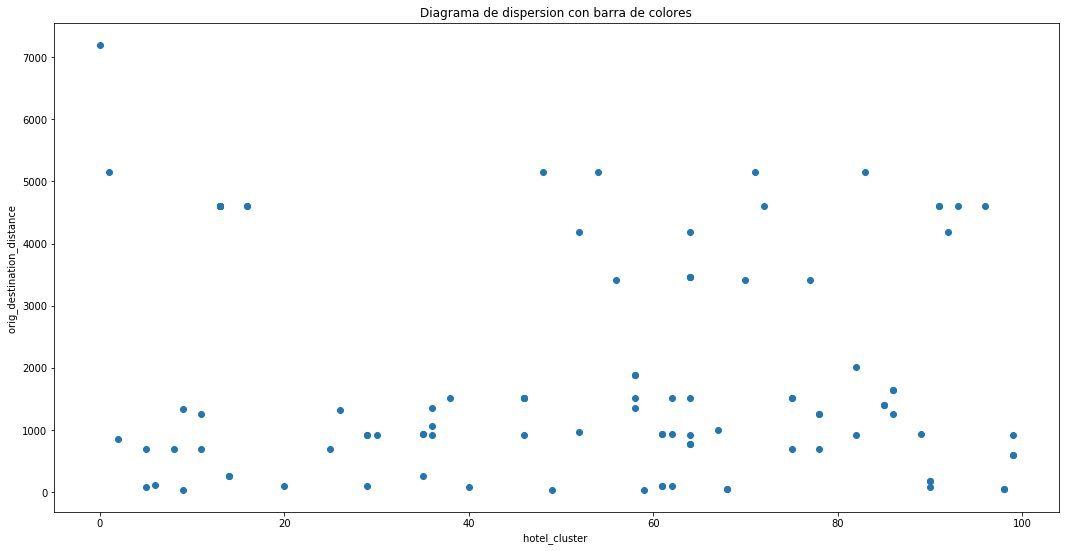

In [55]:
fig, ax1 = plt.subplots(nrows = 1, figsize=(18,9))   
sc = ax1.scatter(myData[Mascara_069 & Mascara_046A]["hotel_cluster"], myData[Mascara_069 & Mascara_046A]["orig_destination_distance"], marker = 'o')  
ax1.set_title('Diagrama de dispersion con barra de colores')
ax1.set_xlabel('hotel_cluster ')
ax1.set_ylabel('orig_destination_distance ') 
# expresiones regulares; patron quer nos permite encontrar caracteres sixtrix.es y regexr \w{1,20}[.]\w{1,20}[@]\w{1,20}(.es)
plt.show(sc)

In [52]:
d = np.percentile(datos_1, 25)
d

700.8532

In [53]:
e = np.percentile(datos_1, 50)
e

1256.1293

In [54]:
f = np.percentile(datos_1, 75)
f

3410.1735

In [85]:
pd.unique(myData[Mascara_4 & Mascara_5]['hotel_country'].values.ravel())

array([ 50.,   8.,  87.,   5., 204., 105.,  77., 198.,  70., 170., 208.,
        21., 200.,  96., 196.,  47., 128.,  48.,  51., 146.,  99., 124.,
        93., 163.,  84.,  52., 174.,  35., 118., 186.,  32.,  80., 136.,
        46.,  79., 106., 180., 140., 135., 121., 171.,  12., 107., 182.,
       151., 168.,   1., 119., 162.,  63.,  22., 193., 132., 127.,   9.,
        67., 160., 144., 104.,  15.,   0.,  68.,   7.,  13.,  31., 169.,
       141.,  98., 126., 203., 110., 148.,  17., 115., 130., 194.,   3.,
       100., 111.,  72., 157.,  11.,  73., 152., 202.,  27., 129.,   2.,
        39., 122., 199., 190.,  60.,  82.,  92.,  53., 131., 143., 212.,
       159.,  26.,  10., 137.,  45.,  81., 179.,  34.,  36.,   4.,  64.,
       185., 125.,  75., 206., 108., 120.,  89.,  61., 156.,  29.,  78.,
        25.,  88., 161.,  57.,  58.,  83.,  74., 102., 192., 147., 197.,
       211.,  66.,  44., 188., 184., 165.,  71.,  38.,  76.,  37., 114.,
       207.,  20., 103.,  23.,  55.,  19., 112.,  3

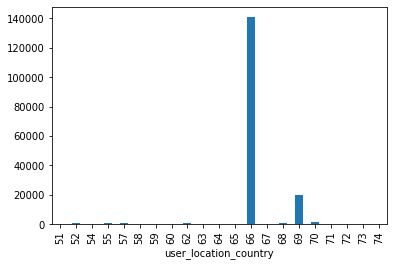

In [86]:
plt.clf()
myData[Mascara_4 & Mascara_5].groupby('user_location_country').size().plot(kind='bar')
plt.show()

**MASCARA 4**

In [87]:
Mascara_6 = myData.user_location_country > 75
Mascara_7 = myData.user_location_country < 100
myData[Mascara_6 & Mascara_7]

date_time  site_name  posa_continent  user_location_country  \
2377    2014-10-05 14:35:57          8               4                     77   
2378    2014-10-05 14:39:54          8               4                     77   
2379    2014-10-05 14:43:20          8               4                     77   
2380    2014-10-05 14:59:44          8               4                     77   
2566    2014-04-25 18:24:29         24               2                     80   
2567    2014-04-25 18:31:05         24               2                     80   
2568    2014-04-25 19:00:49         24               2                     80   
2569    2014-04-25 19:03:15         24               2                     80   
2570    2014-04-25 19:06:42         24               2                     80   
2571    2014-04-25 19:11:03         24               2                     80   
2572    2014-04-27 00:26:37         24               2                     80   
2573    2014-04-27 00:31:58         24               2                     80   
2574    2014-04-27 00:35:47         24               2                     80   
2575    2014-04-28 03:30:20         24               2                     80   
2576    2014-04-28 03:36:07         24               2                     80   
2577    2014-04-28 03:37:26         24               2                     80   
2578    2014-04-28 03:39:10         24               2                     80   
2579    2014-06-22 00:59:17         24               2                     80   
2580    2014-06-22 02:19:45         24               2                     80   
2581    2014-06-22 02:26:47         24               2                     80   
2582    2014-11-06 20:45:05         24               2                     80   
2583    2014-12-07 03:33:42         24               2                     80   
2584    2014-12-24 03:20:44         24               2                     80   
2585    2014-12-24 03:28:18         24               2                     80   
2639    2013-01-16 12:12:00          2               3                     85   
2640    2013-01-16 12:14:22          2               3                     85   
2641    2013-01-16 12:17:13          2               3                     85   
2642    2013-01-17 10:43:39          2               3                     85   
2643    2013-01-17 10:50:28          2               3                     85   
2644    2013-01-17 11:19:21          2               3                     85   
...                     ...        ...             ...                    ...   
239889  2014-12-01 18:00:09          8               4                     77   
239890  2014-12-01 18:00:53          8               4                     77   
239891  2014-12-02 13:36:38          8               4                     77   
239892  2014-12-02 13:38:05          8               4                     77   
239893  2014-12-02 17:44:46          8               4                     77   
239894  2014-12-03 10:01:54          8               4                     77   
239895  2014-12-05 15:19:34          8               4                     77   
239896  2014-12-05 16:59:14          8               4                     77   
239897  2014-12-05 16:59:26          8               4                     77   
239898  2014-12-08 09:33:46          8               4                     77   
239899  2014-12-08 09:35:50          8               4                     77   
239900  2014-12-08 09:36:48          8               4                     77   
239901  2014-12-18 15:58:52          8               4                     77   
239902  2014-12-18 15:59:19          8               4                     77   
239903  2014-12-18 17:37:07          8               4                     77   
239904  2014-12-18 17:37:12          8               4                     77   
239905  2014-12-18 17:39:34          8               4                     77   
239906  2014-12-18 17:41:15          8           

In [193]:
#creamos dos funciones que nos cuenten los valores nulos y los no nulos
def count_nulos(series):
  return len([elem for elem in series if elem * 1 != elem]) #  != para  nulos, == para los no nulos
def count_NoNulos(series):
  return len([elem for elem in series if elem * 1 == elem])

#contamos los nulos que tiene cada valor de user_location_country en la columna orig_destination_distance, el valor user_location_country 0 tiene 4 valores nulos en la columna orig_destination_distance
dnull=myData[Mascara_6 & Mascara_7].groupby('user_location_country')['orig_destination_distance'].apply(count_nulos).reset_index(name='nulos')
#contamos los no nulos que tiene cada valor de user_location_country en la columna orig_destination_distance, el valor user_location_country 0 tiene 4 valores no nulos en la columna orig_destination_distance
dNotnull=myData[Mascara_6 & Mascara_7].groupby('user_location_country')['orig_destination_distance'].apply(count_NoNulos).reset_index(name='NoNulos')

#añadimos una columna para los valooresNoNulos, los valores totales
dnull['ValoresNoNulos']=dNotnull['NoNulos'] 
dnull['ValoresTotales'] = dnull['nulos'] + dNotnull['NoNulos']

#añadimos otras dos columnas para el %NoNulos y el %nulos, y lo configuramos para que se nos devuelvan solo dos decimales
resNull=100*dnull['nulos']/(dnull['nulos'] + dNotnull['NoNulos'])
resultNull=round(resNull,2)
dnull['%Nulos'] = resultNull
resNoNull=100*dNotnull['NoNulos']/(dnull['nulos'] + dNotnull['NoNulos'])
resultNoNull=round(resNoNull,2)
dnull['%NoNulos'] = resultNoNull

#imprimimos el subdataset que acabamos de construir
dnull

user_location_country  nulos  ValoresNoNulos  ValoresTotales  %Nulos  \
0                      76     20               0              20   100.0   
1                      77    900            2744            3644    24.7   
2                      80   1096               0            1096   100.0   
3                      82     47               0              47   100.0   
4                      83      5               0               5   100.0   
5                      85    128               0             128   100.0   
6                      87      1               0               1   100.0   
7                      91     89               0              89   100.0   
8                      92     30               0              30   100.0   
9                      93    333               0             333   100.0   
10                     95     16               0              16   100.0   
11                     99    156               0             156   100.0   

    %NoNulos  
0        0.0  
1       75.3  
2        0.0  
3        0.0  
4        0.0  
5        0.0  
6        0.0  
7        0.0  
8        0.0  
9        0.0  
10       0.0  
11       0.0

In [194]:
grouped_myData=myData[Mascara_6 & Mascara_7].groupby('user_location_country').agg({'orig_destination_distance':['min','max','mean']})
grouped_myData

orig_destination_distance                         
                                            min         max         mean
user_location_country                                                   
76                                          NaN         NaN          NaN
77                                       0.1086  11641.2242  4861.714997
80                                          NaN         NaN          NaN
82                                          NaN         NaN          NaN
83                                          NaN         NaN          NaN
85                                          NaN         NaN          NaN
87                                          NaN         NaN          NaN
91                                          NaN         NaN          NaN
92                                          NaN         NaN          NaN
93                                          NaN         NaN          NaN
95                                          NaN         NaN          NaN
99                                          NaN         NaN          NaN

In [57]:
Mascara_077 = myData.user_location_country == 77
Mascara_077A = myData.orig_destination_distance >0
myData[Mascara_077 & Mascara_077A]

date_time  site_name  posa_continent  user_location_country  \
2725    2013-04-17 21:00:35          8               4                     77   
2726    2013-04-17 21:05:54          8               4                     77   
2727    2013-04-17 21:12:59          8               4                     77   
2728    2013-04-17 21:16:48          8               4                     77   
2729    2013-04-17 21:20:08          8               4                     77   
2730    2013-04-17 21:22:19          8               4                     77   
2731    2013-04-17 22:00:58          8               4                     77   
3590    2013-04-23 18:42:48          8               4                     77   
3591    2013-04-23 18:45:39          8               4                     77   
3592    2013-06-25 13:13:31          8               4                     77   
3593    2013-06-25 13:14:25          8               4                     77   
3594    2013-06-25 13:16:57          8               4                     77   
3597    2013-12-04 11:54:51          8               4                     77   
3598    2013-12-04 14:34:04          8               4                     77   
3599    2013-12-04 14:34:21          8               4                     77   
3600    2013-12-04 14:40:12          8               4                     77   
3601    2013-12-04 14:43:14          8               4                     77   
3602    2013-12-04 14:43:45          8               4                     77   
3603    2013-12-04 14:46:33          8               4                     77   
3604    2013-12-04 14:48:25          8               4                     77   
3605    2013-12-04 15:01:05          8               4                     77   
3606    2013-12-04 15:04:51          8               4                     77   
3607    2013-12-04 15:05:45          8               4                     77   
3608    2014-03-17 11:32:22          8               4                     77   
3609    2014-03-17 11:33:43          8               4                     77   
3610    2014-03-17 11:34:15          8               4                     77   
3611    2014-03-17 11:35:11          8               4                     77   
3612    2014-07-29 11:37:16          8               4                     77   
3613    2014-07-29 11:39:36          8               4                     77   
3614    2014-09-23 16:29:37          8               4                     77   
...                     ...        ...             ...                    ...   
239880  2014-12-01 17:10:33          8               4                     77   
239881  2014-12-01 17:10:46          8               4                     77   
239882  2014-12-01 17:12:36          8               4                     77   
239883  2014-12-01 17:13:03          8               4                     77   
239884  2014-12-01 17:13:29          8               4                     77   
239885  2014-12-01 17:56:48          8               4                     77   
239886  2014-12-01 17:57:05          8               4                     77   
239887  2014-12-01 17:57:37          8               4                     77   
239888  2014-12-01 17:59:15          8               4                     77   
239889  2014-12-01 18:00:09          8               4                     77   
239890  2014-12-01 18:00:53          8               4                     77   
239891  2014-12-02 13:36:38          8               4                     77   
239892  2014-12-02 13:38:05          8               4                     77   
239893  2014-12-02 17:44:46          8               4                     77   
239894  2014-12-03 10:01:54          8               4                     77   
239895  2014-12-05 15:19:34          8               4                     77   
239896  2014-12-05 16:59:14          8               4                     77   
239897  2014-12-05 16:59:26          8           

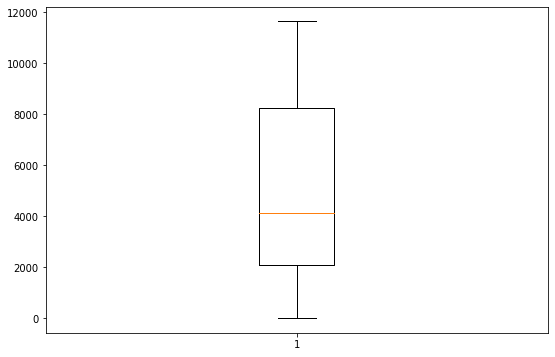

In [62]:
datos_1 =myData[Mascara_077 & Mascara_077A ].iloc[:,6]


datos_graf = [datos_1]

# Creando el objeto figura
fig = plt.figure(1, figsize=(9, 6))

# Creando el subgrafico
ax = fig.add_subplot(111)

# creando el grafico de cajas
bp = ax.boxplot(datos_graf)

# visualizar mas facile los atípicos
for flier in bp['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)
# los puntos aislados son valores atípicos

In [63]:
d = np.percentile(datos_1, 25)
d

2088.9043

In [64]:
e = np.percentile(datos_1, 50)
e

4112.1746

In [65]:
f = np.percentile(datos_1, 75)
f

8231.5962

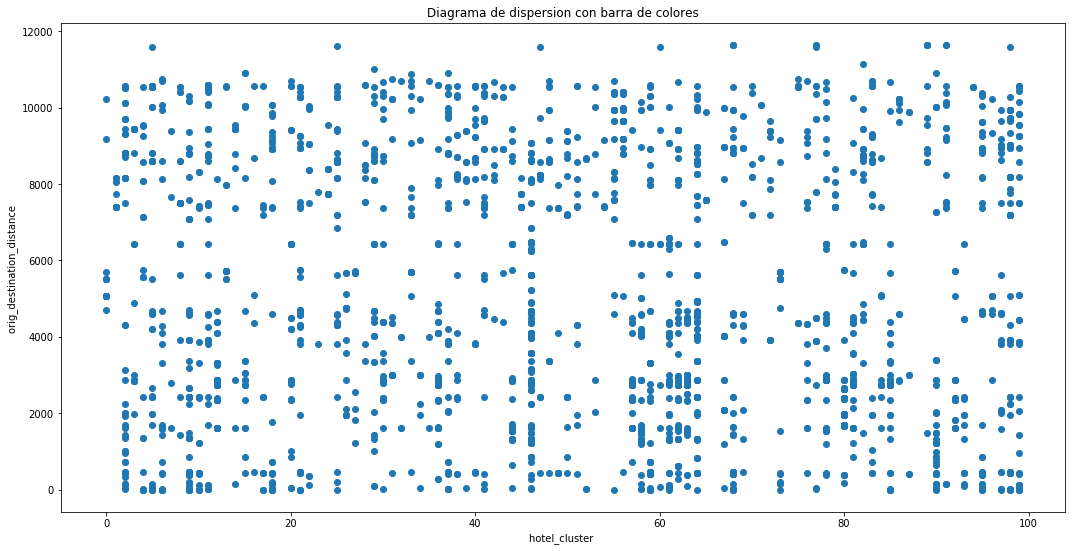

In [66]:
fig, ax1 = plt.subplots(nrows = 1, figsize=(18,9))   
sc = ax1.scatter(myData[Mascara_077 & Mascara_077A ]["hotel_cluster"],myData[Mascara_077 & Mascara_077A ]["orig_destination_distance"], marker = 'o')  
ax1.set_title('Diagrama de dispersion con barra de colores')
ax1.set_xlabel('hotel_cluster ')
ax1.set_ylabel('orig_destination_distance ') 
# expresiones regulares; patron quer nos permite encontrar caracteres sixtrix.es y regexr \w{1,20}[.]\w{1,20}[@]\w{1,20}(.es)
plt.show(sc)

In [88]:
pd.unique(myData[Mascara_6 & Mascara_7]['hotel_country'].values.ravel())

array([ 63.,  70.,  26.,   7., 152., 129.,  50., 204.,  46., 203.,   5.,
       169., 168.,  34., 182.,  99., 106., 196., 105., 208.,  22.,  31.,
       151., 162., 141., 198., 194.,  48., 128.,  87.,  21., 144.,  68.,
       171., 170., 190.,  39., 122.,  19., 143., 118., 200., 202.,  15.,
        75., 180., 132.,  77., 104., 139.,  17., 107., 178., 119.,   1.,
       158., 153.,   8.,  98., 147., 131., 108.,  82., 166., 135., 100.,
       111.,  67., 156., 130., 110.,  93., 124.,  11.,  12., 199.,  28.,
         2.,  24.,  13.,  36.,  60.,   3., 136., 140.])

**MASCARA 5**

**MASCARA DONDE TODOS LOS VALORES SON NULOS**

In [89]:
Mascara_8 = myData.user_location_country > 100
Mascara_9 = myData.user_location_country < 125
myData[Mascara_8 & Mascara_9]

date_time  site_name  posa_continent  user_location_country  \
1849    2014-07-19 04:23:08          2               3                    103   
1850    2014-07-19 04:37:29          2               3                    103   
1851    2014-07-19 05:12:19          2               3                    103   
1852    2014-07-19 05:22:12          2               3                    103   
1853    2014-07-22 16:24:06          2               3                    103   
1854    2014-09-08 19:53:52          2               3                    103   
1855    2014-09-08 19:58:09          2               3                    103   
1856    2014-09-08 20:07:01          2               3                    103   
1857    2014-09-08 20:12:29          2               3                    103   
1858    2014-09-08 20:14:18          2               3                    103   
1859    2014-09-08 20:23:59          2               3                    103   
1860    2014-09-15 21:22:40          2               3                    103   
1861    2014-09-15 21:22:53          2               3                    103   
1862    2014-09-16 04:46:14          2               3                    103   
1863    2014-09-16 17:57:25          2               3                    103   
1864    2014-10-02 16:59:34          2               3                    103   
1865    2014-10-02 17:04:05          2               3                    103   
1866    2014-10-02 17:06:17          2               3                    103   
1867    2014-10-02 20:10:22          2               3                    103   
1868    2014-10-02 20:14:46          2               3                    103   
1869    2014-10-02 21:08:49          2               3                    103   
1870    2014-10-07 19:02:44          2               3                    103   
1871    2014-10-08 04:45:08          2               3                    103   
1872    2014-10-08 05:04:07          2               3                    103   
1873    2014-10-08 05:09:24          2               3                    103   
1874    2014-10-08 16:47:20          2               3                    103   
1875    2014-10-08 17:04:33          2               3                    103   
1876    2014-10-08 17:14:42          2               3                    103   
1877    2014-10-08 17:17:11          2               3                    103   
1878    2014-10-08 17:19:53          2               3                    103   
...                     ...        ...             ...                    ...   
234912  2014-12-28 16:21:56         18               2                    119   
234913  2014-12-28 16:22:12         18               2                    119   
234914  2014-12-28 16:28:02         18               2                    119   
234915  2014-12-28 16:29:15         18               2                    119   
234916  2014-12-28 16:34:20         18               2                    119   
234917  2014-12-28 21:35:55         18               2                    119   
234918  2014-12-28 22:38:49         18               2                    119   
234919  2014-12-28 22:57:12         18               2                    119   
234920  2014-12-28 22:59:58         18               2                    119   
234921  2014-12-28 23:16:00         18               2                    119   
235085  2013-07-11 08:41:39          2               3                    119   
235086  2013-07-11 08:44:10          2               3                    119   
235087  2013-07-11 08:46:37          2               3                    119   
235088  2013-07-11 08:47:31          2               3                    119   
235089  2013-07-11 08:48:44          2               3                    119   
235090  2013-07-11 08:50:10          2               3                    119   
235091  2013-07-11 08:51:23          2               3                    119   
235092  2013-07-11 08:51:55          2           

In [201]:
#creamos dos funciones que nos cuenten los valores nulos y los no nulos
def count_nulos(series):
  return len([elem for elem in series if elem * 1 != elem]) #  != para  nulos, == para los no nulos
def count_NoNulos(series):
  return len([elem for elem in series if elem * 1 == elem])

#contamos los nulos que tiene cada valor de user_location_country en la columna orig_destination_distance, el valor user_location_country 0 tiene 4 valores nulos en la columna orig_destination_distance
dnull=myData[Mascara_8 & Mascara_9].groupby('user_location_country')['orig_destination_distance'].apply(count_nulos).reset_index(name='nulos')
#contamos los no nulos que tiene cada valor de user_location_country en la columna orig_destination_distance, el valor user_location_country 0 tiene 4 valores no nulos en la columna orig_destination_distance
dNotnull=myData[Mascara_8 & Mascara_9].groupby('user_location_country')['orig_destination_distance'].apply(count_NoNulos).reset_index(name='NoNulos')

#añadimos una columna para los valooresNoNulos, los valores totales
dnull['ValoresNoNulos']=dNotnull['NoNulos'] 
dnull['ValoresTotales'] = dnull['nulos'] + dNotnull['NoNulos']

#añadimos otras dos columnas para el %NoNulos y el %nulos, y lo configuramos para que se nos devuelvan solo dos decimales
resNull=100*dnull['nulos']/(dnull['nulos'] + dNotnull['NoNulos'])
resultNull=round(resNull,2)
dnull['%Nulos'] = resultNull
resNoNull=100*dNotnull['NoNulos']/(dnull['nulos'] + dNotnull['NoNulos'])
resultNoNull=round(resNoNull,2)
dnull['%NoNulos'] = resultNoNull

#imprimimos el subdataset que acabamos de construir
dnull

user_location_country  nulos  ValoresNoNulos  ValoresTotales  %Nulos  \
0                     101      4               0               4   100.0   
1                     103    306               0             306   100.0   
2                     104     55               0              55   100.0   
3                     105      5               0               5   100.0   
4                     108      4               0               4   100.0   
5                     109     21               0              21   100.0   
6                     111      2               0               2   100.0   
7                     114      8               0               8   100.0   
8                     115    421               0             421   100.0   
9                     117    180               0             180   100.0   
10                    118     50               0              50   100.0   
11                    119   2418               0            2418   100.0   
12                    122      1               0               1   100.0   
13                    123     98               0              98   100.0   
14                    124      4               0               4   100.0   

    %NoNulos  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  
5        0.0  
6        0.0  
7        0.0  
8        0.0  
9        0.0  
10       0.0  
11       0.0  
12       0.0  
13       0.0  
14       0.0

In [90]:
pd.unique(myData[Mascara_8 & Mascara_9]['hotel_country'].values.ravel())

array([ 50., 110., 182., 106., 130., 141., 126., 170., 105., 171., 190.,
       108., 122., 203.,  99., 198.,  19.,   8., 194.,  51., 151.,  77.,
        78., 144., 162.,  63., 168.,  46.,   5.,  68.,  13., 152.,  82.,
        96., 186.,  80.,  35., 174.,  11., 143.,  48.,  84., 204.,  47.,
       104., 208.,   7.,  98., 124., 163.,  88.,  21.,   4.,  70., 200.,
       132.,  92., 100.,  87.,  60.,  22.,  26.,  32.,  45., 135., 107.,
        93., 199.,  25.])

**MASCARA 6**

In [91]:
Mascara_10 = myData.user_location_country > 125
Mascara_11 = myData.user_location_country < 150
myData[Mascara_10 & Mascara_11]

date_time  site_name  posa_continent  user_location_country  \
871     2013-09-10 10:54:13         17               1                    133   
872     2014-03-06 11:12:19         17               1                    133   
873     2014-04-18 10:21:50         17               1                    133   
874     2014-04-18 10:26:33         17               1                    133   
2361    2014-09-26 08:37:07          2               3                    134   
3618    2014-03-16 16:19:29         17               1                    133   
3619    2014-03-16 16:23:40         17               1                    133   
3620    2014-03-16 16:36:35         17               1                    133   
3621    2014-04-24 12:37:44         17               1                    133   
3622    2014-04-25 15:27:36         17               1                    133   
3623    2014-04-25 15:28:38         17               1                    133   
3624    2014-07-21 16:41:18         17               1                    133   
3625    2014-08-28 14:16:34         17               1                    133   
3626    2014-08-28 16:55:09         17               1                    133   
3627    2014-08-29 11:07:26         17               1                    133   
3628    2014-09-04 15:19:30         17               1                    133   
3629    2014-12-15 10:24:03         17               1                    133   
3630    2014-12-15 10:27:49         17               1                    133   
3672    2013-09-02 15:50:19         37               1                    148   
3673    2013-09-02 16:03:59         37               1                    148   
3674    2013-09-02 16:05:08         37               1                    148   
3675    2013-09-02 16:06:22         37               1                    148   
3676    2013-09-02 16:07:47         37               1                    148   
3677    2013-09-02 16:13:43         37               1                    148   
4573    2013-01-07 10:17:08          2               3                    148   
4574    2013-01-07 14:40:09          2               3                    148   
4575    2013-01-07 14:42:03          2               3                    148   
4576    2013-01-09 14:24:37          2               3                    148   
4577    2014-12-29 04:53:07          2               3                    148   
4578    2014-12-30 13:38:50          2               3                    148   
...                     ...        ...             ...                    ...   
240602  2014-05-19 23:57:01         17               1                    133   
240603  2014-05-19 23:59:49         17               1                    133   
240604  2014-05-20 00:02:16         17               1                    133   
240605  2014-05-20 00:05:02         17               1                    133   
240606  2014-05-20 00:06:48         17               1                    133   
240607  2014-05-20 00:08:33         17               1                    133   
240608  2014-05-20 00:09:10         17               1                    133   
241769  2014-10-25 06:37:40          2               3                    130   
241770  2014-10-25 06:38:18          2               3                    130   
242821  2013-07-14 07:42:19          2               3                    148   
242822  2013-07-14 07:44:03          2               3                    148   
242823  2013-07-14 07:50:30          2               3                    148   
242824  2013-07-14 07:52:32          2               3                    148   
242825  2013-07-14 07:53:43          2               3                    148   
242826  2013-07-14 07:57:36          2               3                    148   
242829  2014-07-15 07:43:49          2               3                    148   
242830  2014-07-15 08:00:45          2               3                    148   
242831  2014-07-15 22:15:35          2           

In [200]:
#creamos dos funciones que nos cuenten los valores nulos y los no nulos
def count_nulos(series):
  return len([elem for elem in series if elem * 1 != elem]) #  != para  nulos, == para los no nulos
def count_NoNulos(series):
  return len([elem for elem in series if elem * 1 == elem])

#contamos los nulos que tiene cada valor de user_location_country en la columna orig_destination_distance, el valor user_location_country 0 tiene 4 valores nulos en la columna orig_destination_distance
dnull=myData[Mascara_10 & Mascara_11].groupby('user_location_country')['orig_destination_distance'].apply(count_nulos).reset_index(name='nulos')
#contamos los no nulos que tiene cada valor de user_location_country en la columna orig_destination_distance, el valor user_location_country 0 tiene 4 valores no nulos en la columna orig_destination_distance
dNotnull=myData[Mascara_10 & Mascara_11].groupby('user_location_country')['orig_destination_distance'].apply(count_NoNulos).reset_index(name='NoNulos')

#añadimos una columna para los valooresNoNulos, los valores totales
dnull['ValoresNoNulos']=dNotnull['NoNulos'] 
dnull['ValoresTotales'] = dnull['nulos'] + dNotnull['NoNulos']

#añadimos otras dos columnas para el %NoNulos y el %nulos, y lo configuramos para que se nos devuelvan solo dos decimales
resNull=100*dnull['nulos']/(dnull['nulos'] + dNotnull['NoNulos'])
resultNull=round(resNull,2)
dnull['%Nulos'] = resultNull
resNoNull=100*dNotnull['NoNulos']/(dnull['nulos'] + dNotnull['NoNulos'])
resultNoNull=round(resNoNull,2)
dnull['%NoNulos'] = resultNoNull

#imprimimos el subdataset que acabamos de construir
dnull

user_location_country  nulos  ValoresNoNulos  ValoresTotales  %Nulos  \
0                     126      3               0               3  100.00   
1                     129     19               0              19  100.00   
2                     130    126               0             126  100.00   
3                     131     40               0              40  100.00   
4                     133   3506               0            3506  100.00   
5                     134     31               0              31  100.00   
6                     137     27               0              27  100.00   
7                     139      5               0               5  100.00   
8                     141    308               6             314   98.09   
9                     142     26               0              26  100.00   
10                    143    136               0             136  100.00   
11                    144     11               0              11  100.00   
12                    146      4               0               4  100.00   
13                    148    112               0             112  100.00   
14                    149    219               0             219  100.00   

    %NoNulos  
0       0.00  
1       0.00  
2       0.00  
3       0.00  
4       0.00  
5       0.00  
6       0.00  
7       0.00  
8       1.91  
9       0.00  
10      0.00  
11      0.00  
12      0.00  
13      0.00  
14      0.00

In [203]:
grouped_myData=myData[Mascara_10 & Mascara_11].groupby('user_location_country').agg({'orig_destination_distance':['min','max','mean']})
grouped_myData

orig_destination_distance                      
                                            min       max        mean
user_location_country                                                
126                                         NaN       NaN         NaN
129                                         NaN       NaN         NaN
130                                         NaN       NaN         NaN
131                                         NaN       NaN         NaN
133                                         NaN       NaN         NaN
134                                         NaN       NaN         NaN
137                                         NaN       NaN         NaN
139                                         NaN       NaN         NaN
141                                    782.1141  783.1041  782.910017
142                                         NaN       NaN         NaN
143                                         NaN       NaN         NaN
144                                         NaN       NaN         NaN
146                                         NaN       NaN         NaN
148                                         NaN       NaN         NaN
149                                         NaN       NaN         NaN

In [67]:
Mascara_0141 = myData.user_location_country == 141
Mascara_077A = myData.orig_destination_distance >0
myData[Mascara_0141 & Mascara_077A]

date_time  site_name  posa_continent  user_location_country  \
239163  2014-07-02 22:46:58         21               1                    141   
239164  2014-07-02 22:47:30         21               1                    141   
239165  2014-07-02 22:49:58         21               1                    141   
239166  2014-07-02 22:50:54         21               1                    141   
239167  2014-07-02 22:51:51         21               1                    141   
239168  2014-07-02 22:52:05         21               1                    141   

        user_location_region  user_location_city  orig_destination_distance  \
239163                   184               28163                   783.0886   
239164                   184               28163                   783.0714   
239165                   184               28163                   783.0444   
239166                   184               28163                   782.1141   
239167                   184               28163                   783.1041   
239168                   184               28163                   783.0375   

        user_id  is_mobile  is_package  ...  srch_children_cnt  srch_rm_cnt  \
239163   870747          1           0  ...                  1          1.0   
239164   870747          1           0  ...                  1          1.0   
239165   870747          1           0  ...                  1          1.0   
239166   870747          1           0  ...                  1          1.0   
239167   870747          1           0  ...                  1          1.0   
239168   870747          1           0  ...                  1          1.0   

        srch_destination_id  srch_destination_type_id  is_booking  cnt  \
239163              20934.0                       1.0         0.0  2.0   
239164              20934.0                       1.0         0.0  1.0   
239165              20934.0                       1.0         0.0  1.0   
239166              20934.0                       1.0         0.0  1.0   
239167              20934.0                       1.0         0.0  1.0   
239168              20934.0                       1.0         0.0  2.0   

        hotel_continent  hotel_country  hotel_market  hotel_cluster  
239163              6.0          204.0        1545.0           64.0  
239164              6.0          204.0        1545.0           58.0  
239165              6.0          204.0        1545.0           60.0  
239166              6.0          204.0        1545.0           75.0  
239167              6.0          204.0        1545.0           62.0  
239168              6.0          204.0        1545.0           82.0  

[6 rows x 22 columns]

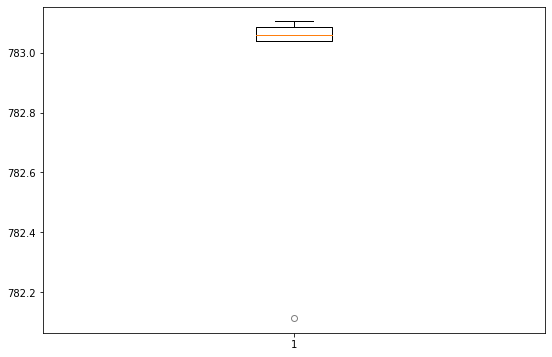

In [68]:
datos_1 =myData[Mascara_0141 & Mascara_077A ].iloc[:,6]


datos_graf = [datos_1]

# Creando el objeto figura
fig = plt.figure(1, figsize=(9, 6))

# Creando el subgrafico
ax = fig.add_subplot(111)

# creando el grafico de cajas
bp = ax.boxplot(datos_graf)

# visualizar mas facile los atípicos
for flier in bp['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)
# los puntos aislados son valores atípicos

In [69]:
d = np.percentile(datos_1, 25)
d

783.039225

In [70]:
e = np.percentile(datos_1, 50)
e

783.0579

In [71]:
f = np.percentile(datos_1, 75)
f

783.0843

In [79]:
Mascara_0141 = myData.user_location_country == 141
Mascara_077A = myData.orig_destination_distance >0
Mascara_077B = myData.orig_destination_distance <783.039225
myData[Mascara_0141 & Mascara_077A & Mascara_077B]

date_time  site_name  posa_continent  user_location_country  \
239166  2014-07-02 22:50:54         21               1                    141   
239168  2014-07-02 22:52:05         21               1                    141   

        user_location_region  user_location_city  orig_destination_distance  \
239166                   184               28163                   782.1141   
239168                   184               28163                   783.0375   

        user_id  is_mobile  is_package  ...  srch_children_cnt  srch_rm_cnt  \
239166   870747          1           0  ...                  1          1.0   
239168   870747          1           0  ...                  1          1.0   

        srch_destination_id  srch_destination_type_id  is_booking  cnt  \
239166              20934.0                       1.0         0.0  1.0   
239168              20934.0                       1.0         0.0  2.0   

        hotel_continent  hotel_country  hotel_market  hotel_cluster  
239166              6.0          204.0        1545.0           75.0  
239168              6.0          204.0        1545.0           82.0  

[2 rows x 22 columns]

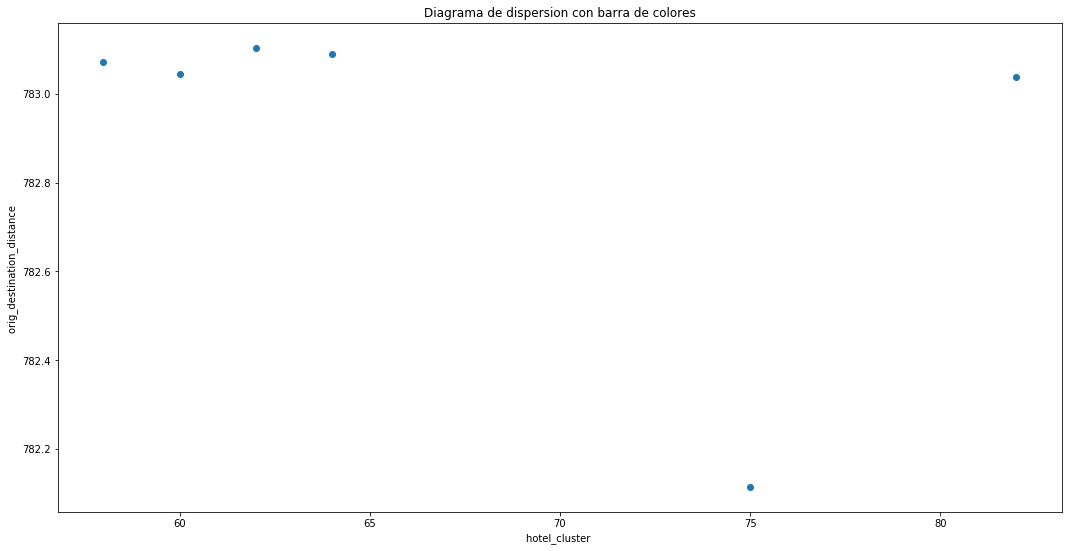

In [80]:
fig, ax1 = plt.subplots(nrows = 1, figsize=(18,9))   
sc = ax1.scatter(myData[Mascara_0141 & Mascara_077A]["hotel_cluster"], myData[Mascara_0141 & Mascara_077A]["orig_destination_distance"], marker = 'o')  
ax1.set_title('Diagrama de dispersion con barra de colores')
ax1.set_xlabel('hotel_cluster ')
ax1.set_ylabel('orig_destination_distance ') 
# expresiones regulares; patron quer nos permite encontrar caracteres sixtrix.es y regexr \w{1,20}[.]\w{1,20}[@]\w{1,20}(.es)
plt.show(sc)

In [92]:
pd.unique(myData[Mascara_10 & Mascara_11]['hotel_country'].values.ravel())

array([208., 105.,  31., 204., 158., 153., 170., 132.,  68., 198.,  48.,
       169.,  70., 144.,  22.,  77.,  15.,  23., 194.,  93., 163.,   7.,
        50.,  21.,  11., 161.,  26.,   0., 107.,   8.,  79., 104., 108.,
       122., 171., 203.,  24., 106., 167., 124., 109.,  66.,  27., 152.,
        92.,  87.,   4., 180.,  17.,   5.,  47., 182., 199., 174., 135.,
        67.,  10.,   1.,  46., 137., 206.,  45., 119.,  63., 128.,  12.,
        36., 148., 196., 146., 184.,  35.,  73., 168.,  80., 126.,   9.,
       140.,  96.,  28., 127.,  76.,  13., 118., 162., 200.,   2., 151.,
        52., 111.])

**MASCARA 7**

**ESTA MASCARA TIENE TODOS LOS VALORES NULOS**

In [222]:
Mascara_12 = myData.user_location_country > 150
Mascara_13 = myData.user_location_country < 175
myData[Mascara_12 & Mascara_13]

date_time  site_name  posa_continent  user_location_country  \
3683    2014-01-07 03:24:04         37               1                    167   
3684    2014-01-07 03:25:51         37               1                    167   
3685    2014-01-07 05:41:53         37               1                    167   
3686    2014-01-07 05:42:35         37               1                    167   
3710    2014-09-16 23:28:04         37               1                    154   
3711    2014-09-16 23:30:11         37               1                    154   
3712    2014-09-16 23:32:40         37               1                    154   
3713    2014-09-16 23:35:24         37               1                    154   
3714    2014-09-20 23:59:41         37               1                    154   
3715    2014-09-21 00:03:27         37               1                    154   
3716    2014-09-24 04:37:53         37               1                    154   
3717    2014-09-24 04:40:06         37               1                    154   
3718    2014-09-24 04:41:35         37               1                    154   
3719    2014-09-24 04:42:09         37               1                    154   
3720    2014-09-24 04:48:07         37               1                    154   
4157    2014-11-12 20:21:57         27               2                    167   
4158    2014-11-12 20:23:46         27               2                    167   
4159    2014-11-24 20:46:29         27               2                    167   
4160    2014-11-24 20:50:13         27               2                    167   
4161    2014-12-09 18:02:23         27               2                    167   
4162    2014-12-10 01:02:06         27               2                    167   
4163    2014-12-18 14:27:17         27               2                    167   
4164    2014-12-18 14:27:28         27               2                    167   
4165    2014-12-18 14:34:44         27               2                    167   
4166    2014-12-18 14:40:04         27               2                    167   
4167    2014-12-20 09:32:22         27               2                    167   
4168    2014-12-20 09:39:30         27               2                    167   
4169    2014-12-24 00:29:57         27               2                    167   
4170    2014-12-24 00:43:31         27               2                    167   
4241    2014-07-03 09:28:37          2               3                    173   
...                     ...        ...             ...                    ...   
241540  2013-09-21 13:16:46          2               3                    163   
241541  2013-09-21 13:21:30          2               3                    163   
241542  2013-09-22 02:43:14          2               3                    163   
241543  2013-09-22 02:51:44          2               3                    163   
241544  2013-09-22 02:53:11          2               3                    163   
241545  2013-09-22 03:02:35          2               3                    163   
241546  2013-09-28 10:09:49          2               3                    163   
241547  2013-10-02 11:53:21          2               3                    163   
241548  2013-10-03 13:13:51          2               3                    163   
241549  2014-01-02 15:27:22          2               3                    163   
241550  2014-01-12 10:15:42          2               3                    163   
241551  2014-01-12 10:18:28          2               3                    163   
241552  2014-01-12 10:22:34          2               3                    163   
241553  2014-01-12 10:23:38          2               3                    163   
241554  2014-01-12 10:27:09          2               3                    163   
241555  2014-01-12 10:31:33          2               3                    163   
241556  2014-01-12 10:59:33          2               3                    163   
241557  2014-01-12 11:01:20          2           

In [209]:
#creamos dos funciones que nos cuenten los valores nulos y los no nulos
def count_nulos(series):
  return len([elem for elem in series if elem * 1 != elem]) #  != para  nulos, == para los no nulos
def count_NoNulos(series):
  return len([elem for elem in series if elem * 1 == elem])

#contamos los nulos que tiene cada valor de user_location_country en la columna orig_destination_distance, el valor user_location_country 0 tiene 4 valores nulos en la columna orig_destination_distance
dnull=myData[Mascara_12 & Mascara_13].groupby('user_location_country')['orig_destination_distance'].apply(count_nulos).reset_index(name='nulos')
#contamos los no nulos que tiene cada valor de user_location_country en la columna orig_destination_distance, el valor user_location_country 0 tiene 4 valores no nulos en la columna orig_destination_distance
dNotnull=myData[Mascara_12 & Mascara_13].groupby('user_location_country')['orig_destination_distance'].apply(count_NoNulos).reset_index(name='NoNulos')

#añadimos una columna para los valooresNoNulos, los valores totales
dnull['ValoresNoNulos']=dNotnull['NoNulos'] 
dnull['ValoresTotales'] = dnull['nulos'] + dNotnull['NoNulos']

#añadimos otras dos columnas para el %NoNulos y el %nulos, y lo configuramos para que se nos devuelvan solo dos decimales
resNull=100*dnull['nulos']/(dnull['nulos'] + dNotnull['NoNulos'])
resultNull=round(resNull,2)
dnull['%Nulos'] = resultNull
resNoNull=100*dNotnull['NoNulos']/(dnull['nulos'] + dNotnull['NoNulos'])
resultNoNull=round(resNoNull,2)
dnull['%NoNulos'] = resultNoNull

#imprimimos el subdataset que acabamos de construir
dnull

user_location_country  nulos  ValoresNoNulos  ValoresTotales  %Nulos  \
0                     152     18               0              18   100.0   
1                     154    829               0             829   100.0   
2                     155     14               0              14   100.0   
3                     156     16               0              16   100.0   
4                     157      3               0               3   100.0   
5                     158    172               0             172   100.0   
6                     162    430               0             430   100.0   
7                     163    192               0             192   100.0   
8                     166    105               0             105   100.0   
9                     167   1622               0            1622   100.0   
10                    168     67               0              67   100.0   
11                    173     91               0              91   100.0   
12                    174      3               0               3   100.0   

    %NoNulos  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  
5        0.0  
6        0.0  
7        0.0  
8        0.0  
9        0.0  
10       0.0  
11       0.0  
12       0.0

In [94]:
pd.unique(myData[Mascara_12 & Mascara_13]['hotel_country'].values.ravel())

array([151., 119.,  82., 162.,  22.,  48., 180.,   5., 152., 196.,  50.,
       163., 182.,  96., 106.,   8., 105., 204., 124.,   0.,  32., 194.,
        70., 198., 135., 171., 186., 128.,  77.,  63.,  34.,  47., 146.,
       141.,  64., 208., 168., 104.,  51.,  68., 206.,  60.,  21.,  46.,
       188.,  53.,  11., 144.,  93.,  45., 140.,  99., 169.,  98., 112.,
        13., 103.,  85.,   7., 203., 130., 139.,  25., 199., 170., 107.,
       126.,   9.,  52.])

**MASCARA 8**

In [95]:
Mascara_14 = myData.user_location_country > 175
Mascara_15 = myData.user_location_country < 200
myData[Mascara_14 & Mascara_15]

date_time  site_name  posa_continent  user_location_country  \
26      2013-06-15 15:10:49         30               4                    195   
27      2013-06-15 15:38:05         30               4                    195   
28      2014-11-22 14:32:46         30               4                    195   
29      2014-11-22 14:37:05         30               4                    195   
30      2014-11-22 16:55:21         30               4                    195   
31      2014-11-22 16:59:09         30               4                    195   
32      2014-11-22 17:02:39         30               4                    195   
33      2014-11-22 17:04:34         30               4                    195   
34      2014-11-22 17:05:34         30               4                    195   
35      2014-11-22 17:07:20         30               4                    195   
36      2014-11-22 19:56:54         30               4                    195   
37      2014-11-22 20:38:49         30               4                    195   
38      2014-11-22 20:43:22         30               4                    195   
39      2014-11-22 20:45:05         30               4                    195   
40      2014-11-22 20:47:19         30               4                    195   
41      2014-11-22 20:50:34         30               4                    195   
42      2014-11-22 20:53:27         30               4                    195   
43      2014-11-22 20:55:38         30               4                    195   
44      2014-11-22 21:00:06         30               4                    195   
45      2014-11-22 21:01:38         30               4                    195   
46      2014-11-22 21:10:53         30               4                    195   
47      2014-11-22 21:12:22         30               4                    195   
48      2014-11-22 21:15:06         30               4                    195   
49      2014-11-22 21:55:37         30               4                    195   
50      2014-11-22 22:00:24         30               4                    195   
51      2014-11-22 22:06:27         30               4                    195   
52      2014-11-22 22:09:20         30               4                    195   
53      2014-11-22 22:20:13         30               4                    195   
54      2014-11-22 22:27:39         30               4                    195   
55      2014-11-22 22:29:15         30               4                    195   
...                     ...        ...             ...                    ...   
240957  2014-07-07 09:43:10          2               3                    181   
240958  2014-07-07 09:45:12          2               3                    181   
240959  2014-09-07 18:05:18          2               3                    181   
240960  2014-09-07 18:07:17          2               3                    181   
240961  2014-09-07 18:07:57          2               3                    181   
240962  2014-09-10 18:04:26          2               3                    179   
240963  2014-09-10 18:08:56          2               3                    179   
240964  2014-10-10 09:18:03          2               3                    181   
240965  2014-10-10 09:23:14          2               3                    181   
240966  2014-10-15 10:40:38          2               3                    179   
240967  2014-10-15 14:01:24          2               3                    179   
240968  2014-10-19 07:40:40          2               3                    181   
240969  2014-10-19 07:50:32          2               3                    181   
240970  2014-10-19 08:31:36          2               3                    181   
240971  2014-11-07 08:36:54          2               3                    181   
240972  2014-11-24 20:00:21          2               3                    179   
240973  2014-11-26 15:48:46          2               3                    179   
242164  2014-07-04 06:17:42         30           

In [211]:
#creamos dos funciones que nos cuenten los valores nulos y los no nulos
def count_nulos(series):
  return len([elem for elem in series if elem * 1 != elem]) #  != para  nulos, == para los no nulos
def count_NoNulos(series):
  return len([elem for elem in series if elem * 1 == elem])

#contamos los nulos que tiene cada valor de user_location_country en la columna orig_destination_distance, el valor user_location_country 0 tiene 4 valores nulos en la columna orig_destination_distance
dnull=myData[Mascara_14 & Mascara_15].groupby('user_location_country')['orig_destination_distance'].apply(count_nulos).reset_index(name='nulos')
#contamos los no nulos que tiene cada valor de user_location_country en la columna orig_destination_distance, el valor user_location_country 0 tiene 4 valores no nulos en la columna orig_destination_distance
dNotnull=myData[Mascara_14 & Mascara_15].groupby('user_location_country')['orig_destination_distance'].apply(count_NoNulos).reset_index(name='NoNulos')

#añadimos una columna para los valooresNoNulos, los valores totales
dnull['ValoresNoNulos']=dNotnull['NoNulos'] 
dnull['ValoresTotales'] = dnull['nulos'] + dNotnull['NoNulos']

#añadimos otras dos columnas para el %NoNulos y el %nulos, y lo configuramos para que se nos devuelvan solo dos decimales
resNull=100*dnull['nulos']/(dnull['nulos'] + dNotnull['NoNulos'])
resultNull=round(resNull,2)
dnull['%Nulos'] = resultNull
resNoNull=100*dNotnull['NoNulos']/(dnull['nulos'] + dNotnull['NoNulos'])
resultNoNull=round(resNoNull,2)
dnull['%NoNulos'] = resultNoNull

#imprimimos el subdataset que acabamos de construir
dnull

user_location_country  nulos  ValoresNoNulos  ValoresTotales  %Nulos  \
0                     176     18               0              18  100.00   
1                     178    105               0             105  100.00   
2                     179    859               0             859  100.00   
3                     181    475               0             475  100.00   
4                     182     19            1043            1062    1.79   
5                     184      2               0               2  100.00   
6                     188     34               0              34  100.00   
7                     190    112               0             112  100.00   
8                     191     22               0              22  100.00   
9                     192     15               0              15  100.00   
10                    194   1395               0            1395  100.00   
11                    195    893               0             893  100.00   
12                    196    273               0             273  100.00   
13                    197      4               0               4  100.00   
14                    198    760               0             760  100.00   

    %NoNulos  
0       0.00  
1       0.00  
2       0.00  
3       0.00  
4      98.21  
5       0.00  
6       0.00  
7       0.00  
8       0.00  
9       0.00  
10      0.00  
11      0.00  
12      0.00  
13      0.00  
14      0.00

In [212]:
grouped_myData=myData[Mascara_14 & Mascara_15].groupby('user_location_country').agg({'orig_destination_distance':['min','max','mean']})
grouped_myData

orig_destination_distance                         
                                            min         max         mean
user_location_country                                                   
176                                         NaN         NaN          NaN
178                                         NaN         NaN          NaN
179                                         NaN         NaN          NaN
181                                         NaN         NaN          NaN
182                                      0.3312  11416.1772  4552.652649
184                                         NaN         NaN          NaN
188                                         NaN         NaN          NaN
190                                         NaN         NaN          NaN
191                                         NaN         NaN          NaN
192                                         NaN         NaN          NaN
194                                         NaN         NaN          NaN
195                                         NaN         NaN          NaN
196                                         NaN         NaN          NaN
197                                         NaN         NaN          NaN
198                                         NaN         NaN          NaN

In [72]:
Mascara_0182 = myData.user_location_country == 182
Mascara_077A = myData.orig_destination_distance >0
myData[Mascara_0182 & Mascara_077A]

date_time  site_name  posa_continent  user_location_country  \
875     2014-01-10 21:47:59         10               0                    182   
876     2014-01-10 22:31:11         10               0                    182   
877     2014-01-10 22:32:13         10               0                    182   
8265    2013-07-18 07:49:46         10               0                    182   
8266    2013-07-18 07:59:24         10               0                    182   
8267    2013-07-18 08:21:48         10               0                    182   
8268    2014-01-28 14:24:29         10               0                    182   
8269    2014-01-28 17:49:14         10               0                    182   
8270    2014-01-28 18:00:51         10               0                    182   
8271    2014-01-29 08:12:24         10               0                    182   
8272    2014-01-29 08:17:44         10               0                    182   
8273    2014-01-31 18:36:15         10               0                    182   
8274    2014-02-02 18:47:36         10               0                    182   
8275    2014-02-02 18:50:04         10               0                    182   
8276    2014-02-02 18:56:03         10               0                    182   
8277    2014-02-02 19:02:38         10               0                    182   
8278    2014-02-04 00:48:34         10               0                    182   
8279    2014-10-02 13:28:49         10               0                    182   
8280    2014-10-02 13:29:21         10               0                    182   
8281    2014-10-24 19:35:53         10               0                    182   
8282    2014-10-24 19:39:56         10               0                    182   
15226   2013-02-18 14:04:54          2               3                    182   
15227   2013-02-18 14:07:32          2               3                    182   
15228   2013-02-18 14:09:21          2               3                    182   
15229   2013-02-21 10:58:06          2               3                    182   
15230   2013-02-21 10:58:45          2               3                    182   
15231   2013-02-21 11:11:47          2               3                    182   
15235   2014-04-09 21:44:31          2               3                    182   
15236   2014-04-09 21:45:24          2               3                    182   
15237   2014-05-01 16:59:21          2               3                    182   
...                     ...        ...             ...                    ...   
234879  2014-07-22 19:45:31         10               0                    182   
234880  2014-07-22 19:45:33         10               0                    182   
234881  2014-07-22 19:45:39         10               0                    182   
234882  2014-07-22 19:45:45         10               0                    182   
234883  2014-07-22 19:45:47         10               0                    182   
234884  2014-07-22 19:45:54         10               0                    182   
234885  2014-07-22 19:45:59         10               0                    182   
234886  2014-07-22 19:46:03         10               0                    182   
234887  2014-07-22 19:46:07         10               0                    182   
234888  2014-07-22 19:46:11         10               0                    182   
234889  2014-07-23 21:26:49         10               0                    182   
234890  2014-07-23 21:26:54         10               0                    182   
234891  2014-07-23 23:43:01         10               0                    182   
234892  2014-07-23 23:43:32         10               0                    182   
234893  2014-07-23 23:55:28         10               0                    182   
235168  2014-04-14 18:11:22         10               0                    182   
235169  2014-04-14 18:26:06         10               0                    182   
235170  2014-04-15 11:31:59         10           

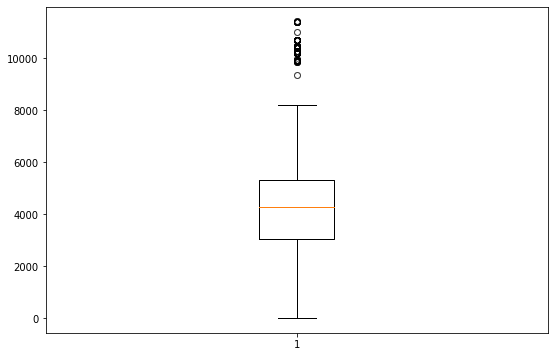

In [73]:
datos_1 =myData[Mascara_0182 & Mascara_077A ].iloc[:,6]


datos_graf = [datos_1]

# Creando el objeto figura
fig = plt.figure(1, figsize=(9, 6))

# Creando el subgrafico
ax = fig.add_subplot(111)

# creando el grafico de cajas
bp = ax.boxplot(datos_graf)

# visualizar mas facile los atípicos
for flier in bp['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)
# los puntos aislados son valores atípicos

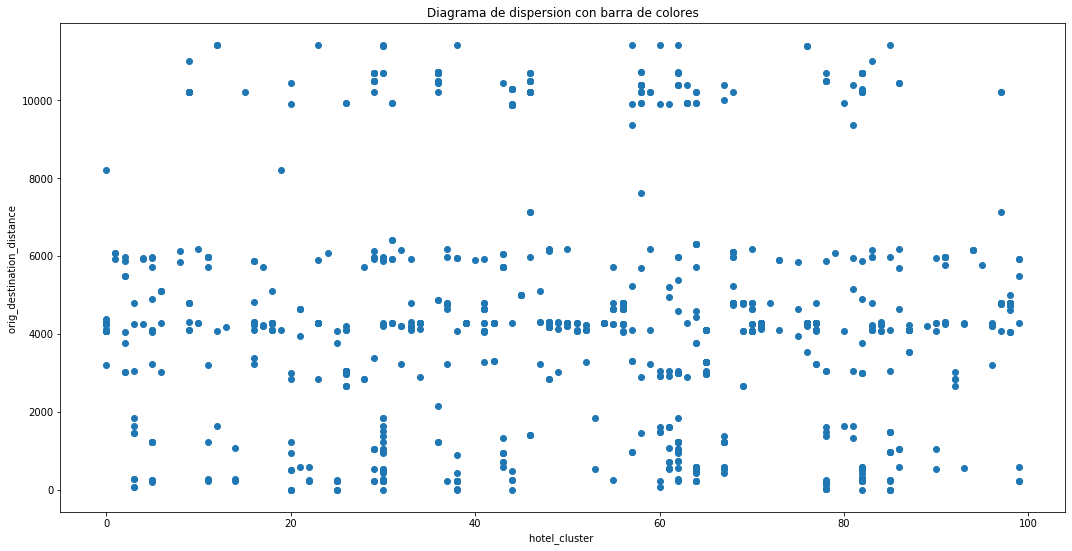

In [78]:
fig, ax1 = plt.subplots(nrows = 1, figsize=(18,9))   
sc = ax1.scatter(myData[Mascara_0182 & Mascara_077A ]["hotel_cluster"], myData[Mascara_0182 & Mascara_077A ]["orig_destination_distance"], marker = 'o')  
ax1.set_title('Diagrama de dispersion con barra de colores')
ax1.set_xlabel('hotel_cluster ')
ax1.set_ylabel('orig_destination_distance ') 
# expresiones regulares; patron quer nos permite encontrar caracteres sixtrix.es y regexr \w{1,20}[.]\w{1,20}[@]\w{1,20}(.es)
plt.show(sc)

In [96]:
pd.unique(myData[Mascara_14 & Mascara_15]['hotel_country'].values.ravel())

array([185., 151., 204., 171., 163., 162., 182.,  48., 130.,  99.,  50.,
       208., 124., 196., 104., 106., 128.,  82.,  77., 169., 126., 203.,
       122., 168., 108.,  70., 144.,   5., 206.,  87.,   9., 107., 200.,
       198.,  34.,  13.,  22., 194., 135.,   1., 152.,  25., 105.,   8.,
        51.,  57., 202., 212., 146., 119.,  63., 170.,  66.,  47.,  64.,
         0., 115.,  68.,  93.,  92., 132., 125., 180.,  46., 153., 116.,
       140., 137.,  96.,  73.,  17.,  89., 112., 131.,  58., 100., 147.,
       129.,   7.,  98.,  12.,  21.,  79., 141.,   3., 186., 110., 148.,
        15.,  55.,  84.,  52.])

**MASCARA 9**

In [97]:
Mascara_16= myData.user_location_country > 200

myData[Mascara_16]

date_time  site_name  posa_continent  user_location_country  \
857     2014-09-14 14:31:20         11               3                    205   
858     2014-09-14 14:35:02         11               3                    205   
980     2014-06-05 11:06:04         11               3                    205   
981     2014-06-05 11:07:31         11               3                    205   
982     2014-06-11 13:43:39         11               3                    205   
983     2014-06-11 13:44:26         11               3                    205   
984     2014-06-11 13:45:01         11               3                    205   
985     2014-06-20 09:59:37         11               3                    205   
986     2014-07-02 13:58:28         11               3                    205   
987     2014-07-02 13:59:58         11               3                    205   
988     2014-07-02 14:00:10         11               3                    205   
989     2014-07-02 14:00:36         11               3                    205   
990     2014-07-03 13:26:09         11               3                    205   
991     2014-07-03 13:33:06         11               3                    205   
992     2014-07-08 14:15:08         11               3                    205   
993     2014-07-09 07:25:37         11               3                    205   
994     2014-07-09 07:32:53         11               3                    205   
995     2014-07-28 09:04:12         11               3                    205   
996     2014-08-05 11:50:33         11               3                    205   
997     2014-08-06 06:15:41         11               3                    205   
998     2014-08-06 06:54:29         11               3                    205   
999     2014-08-08 10:50:39         11               3                    205   
1000    2014-08-13 09:59:01         11               3                    205   
1001    2014-08-13 10:10:21         11               3                    205   
1002    2014-08-18 12:11:11         11               3                    205   
1003    2014-08-18 12:13:06         11               3                    205   
1004    2014-08-21 07:45:07         11               3                    205   
1005    2014-08-21 10:27:43         11               3                    205   
1006    2014-08-22 10:04:51         11               3                    205   
1007    2014-08-22 10:05:40         11               3                    205   
...                     ...        ...             ...                    ...   
243231  2014-08-25 12:34:27         11               3                    205   
243232  2014-09-22 07:44:56         11               3                    205   
243233  2014-09-22 07:47:12         11               3                    205   
243234  2014-09-22 07:49:12         11               3                    205   
243235  2014-09-23 12:01:15         11               3                    205   
243236  2014-09-23 12:10:04         11               3                    205   
243237  2014-10-27 19:19:06         11               3                    205   
243238  2014-10-28 19:06:32         11               3                    205   
243239  2014-10-30 16:07:20         11               3                    205   
243240  2014-10-30 16:26:01         11               3                    205   
243241  2014-11-05 11:42:01         11               3                    205   
243242  2014-11-05 11:46:15         11               3                    205   
243243  2014-11-05 11:51:52         11               3                    205   
243244  2014-11-05 11:52:39         11               3                    205   
243245  2014-11-05 11:56:12         11               3                    205   
243246  2014-11-05 11:56:36         11               3                    205   
243247  2014-11-05 11:57:04         11               3                    205   
243248  2014-11-05 11:57:45         11           

In [98]:
pd.unique(myData[Mascara_16 ]['hotel_country'].values.ravel())

array([198.,   8.,  50.,  47.,  96., 121.,  36., 163., 204., 125., 146.,
       140., 152., 106., 100.,   1.,  48.,   5., 128.,  70.,  77.,  68.,
       144.,  63., 110.,  99., 105.,  22., 171., 182.,  51.,  52., 160.,
        80., 168.,  66., 161.,  92., 122.,  23., 147., 208., 151.,  79.,
         0., 196., 170., 186., 119.,  34.,  93.,  98., 185., 107.,  17.,
        57.,   7.,  35., 169., 162., 126., 190.,  19.,  12., 206., 174.,
        46.,  38., 136., 194., 124., 132., 199.,  15., 179.,  25.,  31.,
        82.,  11.,  83., 180., 108., 127., 203.,  13.,  32.,  21., 118.,
       135., 193., 137., 130.,  87.,  60.,  44., 157., 156., 141.,  72.,
        67., 184.,  84., 131., 200., 212.,  88., 114.,  45.,  71., 202.,
       111., 148., 104., 159.,   2.,   9., 210.,  81., 211.,  89., 103.,
       150.,  24.,  65., 102.,  20., 165.,  26., 115.])

In [216]:
#creamos dos funciones que nos cuenten los valores nulos y los no nulos
def count_nulos(series):
  return len([elem for elem in series if elem * 1 != elem]) #  != para  nulos, == para los no nulos
def count_NoNulos(series):
  return len([elem for elem in series if elem * 1 == elem])

#contamos los nulos que tiene cada valor de user_location_country en la columna orig_destination_distance, el valor user_location_country 0 tiene 4 valores nulos en la columna orig_destination_distance
dnull=myData[Mascara_16].groupby('user_location_country')['orig_destination_distance'].apply(count_nulos).reset_index(name='nulos')
#contamos los no nulos que tiene cada valor de user_location_country en la columna orig_destination_distance, el valor user_location_country 0 tiene 4 valores no nulos en la columna orig_destination_distance
dNotnull=myData[Mascara_16].groupby('user_location_country')['orig_destination_distance'].apply(count_NoNulos).reset_index(name='NoNulos')

#añadimos una columna para los valooresNoNulos, los valores totales
dnull['ValoresNoNulos']=dNotnull['NoNulos'] 
dnull['ValoresTotales'] = dnull['nulos'] + dNotnull['NoNulos']

#añadimos otras dos columnas para el %NoNulos y el %nulos, y lo configuramos para que se nos devuelvan solo dos decimales
resNull=100*dnull['nulos']/(dnull['nulos'] + dNotnull['NoNulos'])
resultNull=round(resNull,2)
dnull['%Nulos'] = resultNull
resNoNull=100*dNotnull['NoNulos']/(dnull['nulos'] + dNotnull['NoNulos'])
resultNoNull=round(resNoNull,2)
dnull['%NoNulos'] = resultNoNull

#imprimimos el subdataset que acabamos de construir
dnull

user_location_country  nulos  ValoresNoNulos  ValoresTotales  %Nulos  \
0                     202    426               0             426  100.00   
1                     205   2635           19130           21765   12.11   
2                     206    131               0             131  100.00   
3                     208     24               0              24  100.00   
4                     209    232               0             232  100.00   
5                     214    750               0             750  100.00   
6                     215   1265            1985            3250   38.92   
7                     217    109               0             109  100.00   
8                     218    246               0             246  100.00   
9                     219     72               0              72  100.00   
10                    221      6               0               6  100.00   
11                    222     10               0              10  100.00   
12                    223      5               0               5  100.00   
13                    224      2               0               2  100.00   
14                    225    210               0             210  100.00   
15                    228     48               0              48  100.00   
16                    229     96               0              96  100.00   
17                    230    390               0             390  100.00   
18                    231   1131               0            1131  100.00   
19                    233     35               0              35  100.00   
20                    235    562               0             562  100.00   
21                    238    316               0             316  100.00   
22                    239    260               0             260  100.00   

    %NoNulos  
0       0.00  
1      87.89  
2       0.00  
3       0.00  
4       0.00  
5       0.00  
6      61.08  
7       0.00  
8       0.00  
9       0.00  
10      0.00  
11      0.00  
12      0.00  
13      0.00  
14      0.00  
15      0.00  
16      0.00  
17      0.00  
18      0.00  
19      0.00  
20      0.00  
21      0.00  
22      0.00

In [215]:
grouped_myData=myData[Mascara_16].groupby('user_location_country').agg({'orig_destination_distance':['min','max','mean']})
grouped_myData

orig_destination_distance                         
                                            min         max         mean
user_location_country                                                   
202                                         NaN         NaN          NaN
205                                      0.0056  10216.0282  2190.894516
206                                         NaN         NaN          NaN
208                                         NaN         NaN          NaN
209                                         NaN         NaN          NaN
214                                         NaN         NaN          NaN
215                                      0.3584  10480.1990  2172.602949
217                                         NaN         NaN          NaN
218                                         NaN         NaN          NaN
219                                         NaN         NaN          NaN
221                                         NaN         NaN          NaN
222                                         NaN         NaN          NaN
223                                         NaN         NaN          NaN
224                                         NaN         NaN          NaN
225                                         NaN         NaN          NaN
228                                         NaN         NaN          NaN
229                                         NaN         NaN          NaN
230                                         NaN         NaN          NaN
231                                         NaN         NaN          NaN
233                                         NaN         NaN          NaN
235                                         NaN         NaN          NaN
238                                         NaN         NaN          NaN
239                                         NaN         NaN          NaN

In [74]:
Mascara_0205 = myData.user_location_country == 205
Mascara_077A = myData.orig_destination_distance >0
myData[Mascara_0205 & Mascara_077A]

date_time  site_name  posa_continent  user_location_country  \
857     2014-09-14 14:31:20         11               3                    205   
858     2014-09-14 14:35:02         11               3                    205   
980     2014-06-05 11:06:04         11               3                    205   
981     2014-06-05 11:07:31         11               3                    205   
982     2014-06-11 13:43:39         11               3                    205   
983     2014-06-11 13:44:26         11               3                    205   
984     2014-06-11 13:45:01         11               3                    205   
985     2014-06-20 09:59:37         11               3                    205   
986     2014-07-02 13:58:28         11               3                    205   
987     2014-07-02 13:59:58         11               3                    205   
988     2014-07-02 14:00:10         11               3                    205   
989     2014-07-02 14:00:36         11               3                    205   
990     2014-07-03 13:26:09         11               3                    205   
991     2014-07-03 13:33:06         11               3                    205   
992     2014-07-08 14:15:08         11               3                    205   
993     2014-07-09 07:25:37         11               3                    205   
994     2014-07-09 07:32:53         11               3                    205   
995     2014-07-28 09:04:12         11               3                    205   
996     2014-08-05 11:50:33         11               3                    205   
997     2014-08-06 06:15:41         11               3                    205   
998     2014-08-06 06:54:29         11               3                    205   
999     2014-08-08 10:50:39         11               3                    205   
1000    2014-08-13 09:59:01         11               3                    205   
1001    2014-08-13 10:10:21         11               3                    205   
1002    2014-08-18 12:11:11         11               3                    205   
1003    2014-08-18 12:13:06         11               3                    205   
1004    2014-08-21 07:45:07         11               3                    205   
1005    2014-08-21 10:27:43         11               3                    205   
1006    2014-08-22 10:04:51         11               3                    205   
1007    2014-08-22 10:05:40         11               3                    205   
...                     ...        ...             ...                    ...   
243190  2013-12-30 12:22:59         11               3                    205   
243191  2014-02-05 08:44:45         11               3                    205   
243192  2014-02-06 09:07:06         11               3                    205   
243193  2014-02-06 09:09:04         11               3                    205   
243194  2014-04-05 10:28:25         11               3                    205   
243195  2014-04-05 10:36:54         11               3                    205   
243196  2014-04-07 10:22:19         11               3                    205   
243197  2014-04-07 10:26:08         11               3                    205   
243198  2014-04-16 12:04:37         11               3                    205   
243201  2014-06-25 17:44:44         11               3                    205   
243202  2014-06-25 18:31:12         11               3                    205   
243203  2014-06-25 18:34:05         11               3                    205   
243204  2014-06-25 18:51:53         11               3                    205   
243205  2014-06-25 18:56:39         11               3                    205   
243206  2014-06-25 18:59:17         11               3                    205   
243207  2014-06-25 19:43:18         11               3                    205   
243211  2014-07-03 08:44:24         11               3                    205   
243212  2014-07-03 08:46:53         11           

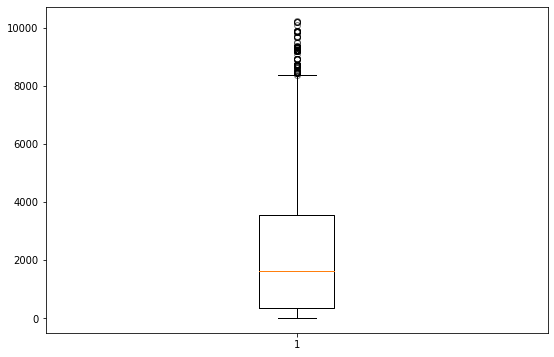

In [75]:
datos_1 =myData[Mascara_0205 & Mascara_077A].iloc[:,6]


datos_graf = [datos_1]

# Creando el objeto figura
fig = plt.figure(1, figsize=(9, 6))

# Creando el subgrafico
ax = fig.add_subplot(111)

# creando el grafico de cajas
bp = ax.boxplot(datos_graf)

# visualizar mas facile los atípicos
for flier in bp['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)
# los puntos aislados son valores atípicos

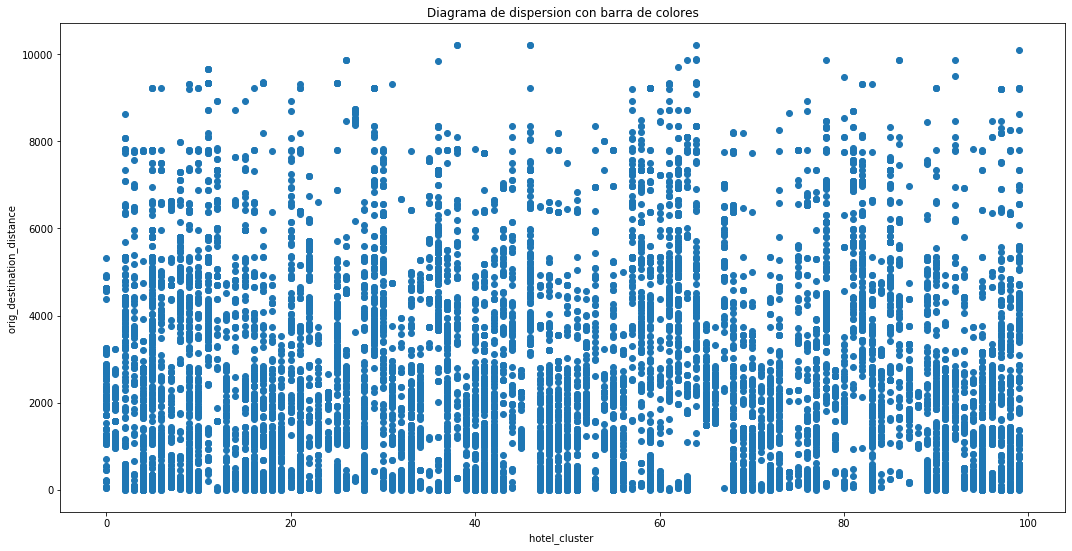

In [81]:
fig, ax1 = plt.subplots(nrows = 1, figsize=(18,9))   
sc = ax1.scatter(myData[Mascara_0205 & Mascara_077A]["hotel_cluster"], myData[Mascara_0205 & Mascara_077A]["orig_destination_distance"], marker = 'o')  
ax1.set_title('Diagrama de dispersion con barra de colores')
ax1.set_xlabel('hotel_cluster ')
ax1.set_ylabel('orig_destination_distance ') 
# expresiones regulares; patron quer nos permite encontrar caracteres sixtrix.es y regexr \w{1,20}[.]\w{1,20}[@]\w{1,20}(.es)
plt.show(sc)

In [76]:
Mascara_0215 = myData.user_location_country == 215
Mascara_077A = myData.orig_destination_distance >0
myData[Mascara_0215 &Mascara_077A]

date_time  site_name  posa_continent  user_location_country  \
1544    2014-11-01 13:36:59          2               3                    215   
1589    2013-06-11 11:29:16          2               3                    215   
1590    2013-08-14 08:49:59          2               3                    215   
1591    2013-08-14 08:51:27          2               3                    215   
1592    2013-08-14 09:31:00          2               3                    215   
1593    2013-08-20 14:45:20          2               3                    215   
1594    2013-08-20 14:48:25          2               3                    215   
1595    2013-08-20 15:08:56          2               3                    215   
1596    2013-08-20 15:35:59          2               3                    215   
1597    2013-08-20 15:45:20          2               3                    215   
1598    2013-08-20 16:13:21          2               3                    215   
1599    2013-08-20 16:22:18          2               3                    215   
1600    2013-09-18 11:55:44          2               3                    215   
1601    2013-09-18 15:28:28          2               3                    215   
1602    2013-09-18 16:15:02          2               3                    215   
1603    2013-09-18 16:27:37          2               3                    215   
1604    2013-09-18 16:31:16          2               3                    215   
1605    2014-02-06 11:14:55          2               3                    215   
1606    2014-07-23 07:26:18          2               3                    215   
1607    2014-07-31 17:13:31          2               3                    215   
1608    2014-07-31 17:14:24          2               3                    215   
1609    2014-07-31 17:14:28          2               3                    215   
1610    2014-07-31 17:17:14          2               3                    215   
1611    2014-07-31 17:17:22          2               3                    215   
1612    2014-08-07 17:32:36          2               3                    215   
1613    2014-08-18 14:40:37          2               3                    215   
1614    2014-11-13 08:39:29          2               3                    215   
1615    2014-11-18 11:12:12          2               3                    215   
1616    2014-11-19 14:04:55          2               3                    215   
1617    2014-11-19 14:30:09          2               3                    215   
...                     ...        ...             ...                    ...   
230680  2013-08-07 19:29:48          2               3                    215   
230681  2013-08-07 19:29:52          2               3                    215   
230682  2013-08-07 19:30:03          2               3                    215   
230683  2013-08-07 19:30:08          2               3                    215   
230684  2013-08-07 19:30:13          2               3                    215   
230685  2013-08-07 19:30:20          2               3                    215   
230686  2013-08-07 19:36:39          2               3                    215   
230687  2013-08-07 19:36:47          2               3                    215   
230688  2013-08-07 19:36:49          2               3                    215   
230689  2013-08-07 19:45:28          2               3                    215   
230690  2013-08-07 19:46:04          2               3                    215   
232118  2013-11-07 08:49:10         26               0                    215   
232119  2014-10-08 22:13:50         26               0                    215   
232120  2014-10-08 22:22:18         26               0                    215   
235953  2014-11-03 20:30:32         14               1                    215   
237420  2014-07-13 19:35:12          2               3                    215   
237421  2014-07-13 19:37:47          2               3                    215   
237422  2014-07-13 19:40:38          2           

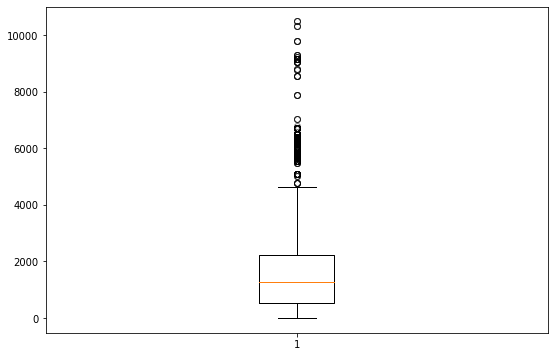

In [77]:
datos_1 =myData[Mascara_0215 & Mascara_077A ].iloc[:,6]


datos_graf = [datos_1]

# Creando el objeto figura
fig = plt.figure(1, figsize=(9, 6))

# Creando el subgrafico
ax = fig.add_subplot(111)

# creando el grafico de cajas
bp = ax.boxplot(datos_graf)

# visualizar mas facile los atípicos
for flier in bp['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)
# los puntos aislados son valores atípicos

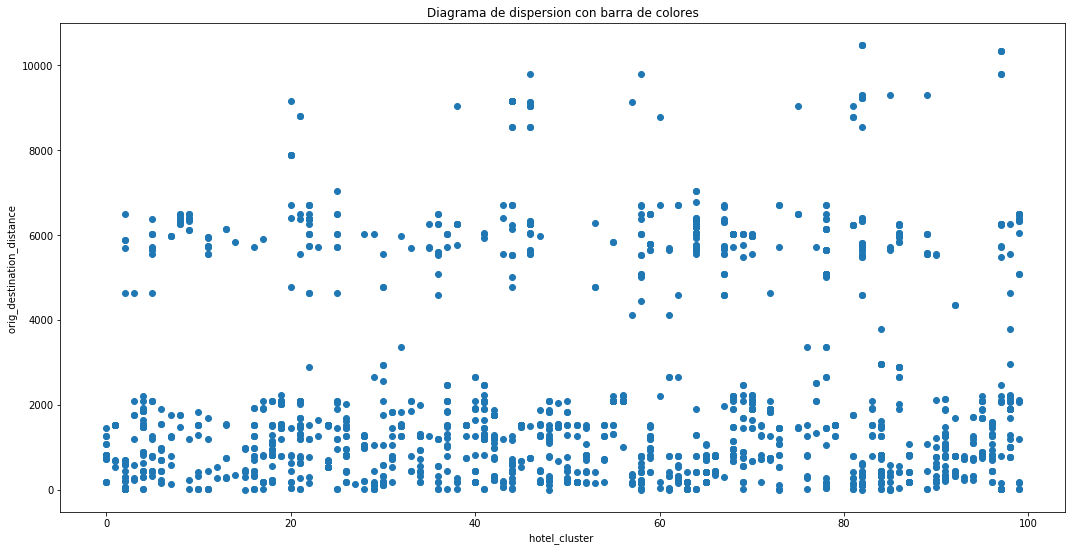

In [82]:
fig, ax1 = plt.subplots(nrows = 1, figsize=(18,9))   
sc = ax1.scatter(myData[Mascara_0215 & Mascara_077A ]["hotel_cluster"],myData[Mascara_0215 & Mascara_077A ]["orig_destination_distance"], marker = 'o')  
ax1.set_title('Diagrama de dispersion con barra de colores')
ax1.set_xlabel('hotel_cluster ')
ax1.set_ylabel('orig_destination_distance ') 
# expresiones regulares; patron quer nos permite encontrar caracteres sixtrix.es y regexr \w{1,20}[.]\w{1,20}[@]\w{1,20}(.es)
plt.show(sc)

**TRAS ANALIZAR Y COMPARAR TODOS LOS DATOS, VAMOS A COMENZAR A RELLENAR POCO A POCO AQUELLOS VALORES QUE MEDIANTE ESTADÍSTICA CREEMOS QUE SE ASEMEJAN MÁS A SU RESULTADO CORRECTO**

LO PRIMERO QUE VAMOS A RELLENAR ES TODOS LOS VALORES DE LA COLUMNA "orig_destination_distance" EN LOS QUE LA COLUMNA "user_location_country" ES IGUAL A 16.
PORQUE COMO HEMOS PODIDO COMPROBAR ARRIBA CON EL DIAGRAMA DE CAJA VIGOTE, LOS PERCENTILES 25,50,75 SON IGUALES. Esto significa que el 25% esta entorno al mismo valor que el 50% y que el 75%. Por lo tanto, es muy probable que cualquiera de los valores nulos que tenemos que rellenar esten en torno a dicho valor : 186.627 .

In [800]:
Mascara_rellenar1 = myData.user_location_country == 16
myData[Mascara_rellenar1]

date_time  site_name  posa_continent  user_location_country  \
51746   2014-09-22 02:47:52          2               3                     16   
51747   2014-09-22 02:48:46          2               3                     16   
51748   2014-09-22 02:50:03          2               3                     16   
51749   2014-09-22 02:51:07          2               3                     16   
51750   2014-09-23 08:10:59          2               3                     16   
51751   2014-09-23 08:11:59          2               3                     16   
51752   2014-09-23 08:14:46          2               3                     16   
51753   2014-09-23 08:37:34          2               3                     16   
51754   2014-10-10 08:53:44          2               3                     16   
51755   2014-10-10 08:56:51          2               3                     16   
51756   2014-10-10 08:57:56          2               3                     16   
51757   2014-10-10 09:01:21          2               3                     16   
51758   2014-10-10 09:03:57          2               3                     16   
51759   2014-10-10 09:12:36          2               3                     16   
51760   2014-10-10 09:41:07          2               3                     16   
51761   2014-10-10 09:46:19          2               3                     16   
51762   2014-10-27 02:21:37          2               3                     16   
51763   2014-10-27 02:27:49          2               3                     16   
51764   2014-10-27 04:02:00          2               3                     16   
51765   2014-10-27 04:02:36          2               3                     16   
51766   2014-10-27 04:05:57          2               3                     16   
51767   2014-10-27 04:07:34          2               3                     16   
51768   2014-10-27 04:08:15          2               3                     16   
208285  2014-11-25 05:20:17          2               3                     16   
208286  2014-11-25 05:32:18          2               3                     16   
208287  2014-11-25 05:36:22          2               3                     16   
208288  2014-11-25 05:49:05          2               3                     16   

        user_location_region  user_location_city  orig_destination_distance  \
51746                    154               12548                    86.8923   
51747                    154               12548                    90.0815   
51748                    154               12548                    90.7257   
51749                    154               12548                    89.7199   
51750                    154               12548                     2.3991   
51751                    154               12548                     0.1518   
51752                    154               12548                     0.1518   
51753                    154               12548                     5.1583   
51754                    154               12548                     2.3991   
51755                    154               12548                     2.3991   
51756                    154               12548                    12.3461   
51757                    154               12548                     0.6810   
51758                    154               12548                     5.1583   
51759                    154               12548                     0.6161   
51760                    154               12548                     2.5258   
51761                    154               12548                     2.5258   
51762                    154               12548                     0.6161   
51763                    154               12548                     0.6161   
51764                    154               12548                  1623.7226   
51765                    154               12548                  1621.9478   
51766                    154               12548                  1621.8592   
51767      

In [ ]:
myData = myData[Mascara_rellenar1].fillna(value=186627)
myData.head()

In [801]:
myData[Mascara_rellenar1]= myData[Mascara_rellenar1].fillna(value=186627)
myData[Mascara_rellenar1]

date_time  site_name  posa_continent  user_location_country  \
51746   2014-09-22 02:47:52          2               3                     16   
51747   2014-09-22 02:48:46          2               3                     16   
51748   2014-09-22 02:50:03          2               3                     16   
51749   2014-09-22 02:51:07          2               3                     16   
51750   2014-09-23 08:10:59          2               3                     16   
51751   2014-09-23 08:11:59          2               3                     16   
51752   2014-09-23 08:14:46          2               3                     16   
51753   2014-09-23 08:37:34          2               3                     16   
51754   2014-10-10 08:53:44          2               3                     16   
51755   2014-10-10 08:56:51          2               3                     16   
51756   2014-10-10 08:57:56          2               3                     16   
51757   2014-10-10 09:01:21          2               3                     16   
51758   2014-10-10 09:03:57          2               3                     16   
51759   2014-10-10 09:12:36          2               3                     16   
51760   2014-10-10 09:41:07          2               3                     16   
51761   2014-10-10 09:46:19          2               3                     16   
51762   2014-10-27 02:21:37          2               3                     16   
51763   2014-10-27 02:27:49          2               3                     16   
51764   2014-10-27 04:02:00          2               3                     16   
51765   2014-10-27 04:02:36          2               3                     16   
51766   2014-10-27 04:05:57          2               3                     16   
51767   2014-10-27 04:07:34          2               3                     16   
51768   2014-10-27 04:08:15          2               3                     16   
208285  2014-11-25 05:20:17          2               3                     16   
208286  2014-11-25 05:32:18          2               3                     16   
208287  2014-11-25 05:36:22          2               3                     16   
208288  2014-11-25 05:49:05          2               3                     16   

        user_location_region  user_location_city  orig_destination_distance  \
51746                    154               12548                    86.8923   
51747                    154               12548                    90.0815   
51748                    154               12548                    90.7257   
51749                    154               12548                    89.7199   
51750                    154               12548                     2.3991   
51751                    154               12548                     0.1518   
51752                    154               12548                     0.1518   
51753                    154               12548                     5.1583   
51754                    154               12548                     2.3991   
51755                    154               12548                     2.3991   
51756                    154               12548                    12.3461   
51757                    154               12548                     0.6810   
51758                    154               12548                     5.1583   
51759                    154               12548                     0.6161   
51760                    154               12548                     2.5258   
51761                    154               12548                     2.5258   
51762                    154               12548                     0.6161   
51763                    154               12548                     0.6161   
51764                    154               12548                  1623.7226   
51765                    154               12548                  1621.9478   
51766                    154               12548                  1621.8592   
51767      

A CONTINUACIÓN VAMOS A RELLENAR TODOS LOS VALORES DE LA COLUMNA "orig_destination_distance" EN LOS QUE LA COLUMNA "user_location_country" ES IGUAL A 55. ESTOS VALORES LOS RELLENAREMOS CON LA MEDIA YA QUE NO HAY APENAS DISTANCIA ENTRE EL VALOR MAXIMO Y EL MÍNIMO, ES DECIR, EL DIAGRAMA DE CAJA-BIGOTE ESTÁ MUY COMPACTADO Y ESTO QUIERE DECIR QUE NO HAY APENAS DISPERSIÓN EN LOS DATOS.

In [765]:
Mascara_rellenar2 = myData.user_location_country == 55
myData[Mascara_rellenar2]

date_time  site_name  posa_continent  user_location_country  \
355     2014-06-03 10:38:09          2               3                     55   
356     2014-06-03 10:41:10          2               3                     55   
357     2014-06-03 10:42:21          2               3                     55   
358     2014-06-03 10:42:41          2               3                     55   
359     2014-06-03 10:54:05          2               3                     55   
360     2014-06-03 10:56:21          2               3                     55   
361     2014-06-03 10:56:50          2               3                     55   
362     2014-06-03 10:58:45          2               3                     55   
363     2014-06-03 10:59:52          2               3                     55   
364     2014-06-03 11:09:00          2               3                     55   
365     2014-06-03 12:03:25          2               3                     55   
366     2014-06-03 14:48:37          2               3                     55   
367     2014-06-06 15:23:10          2               3                     55   
15595   2014-08-14 12:41:29          2               3                     55   
15596   2014-08-14 12:53:29          2               3                     55   
15597   2014-08-14 12:54:39          2               3                     55   
15598   2014-08-14 12:55:11          2               3                     55   
15599   2014-08-14 12:55:58          2               3                     55   
15600   2014-08-15 07:20:02          2               3                     55   
15601   2014-08-15 07:21:29          2               3                     55   
15602   2014-08-15 07:21:52          2               3                     55   
15603   2014-08-15 07:24:01          2               3                     55   
15604   2014-08-15 07:28:02          2               3                     55   
15605   2014-08-15 07:37:30          2               3                     55   
15606   2014-08-15 07:51:59          2               3                     55   
15607   2014-08-15 07:52:35          2               3                     55   
15608   2014-08-15 07:53:15          2               3                     55   
15609   2014-08-15 07:54:59          2               3                     55   
15610   2014-08-15 07:58:02          2               3                     55   
15611   2014-08-15 08:02:49          2               3                     55   
...                     ...        ...             ...                    ...   
233058  2014-07-12 21:17:47         17               1                     55   
233059  2014-07-12 21:18:38         17               1                     55   
233060  2014-07-12 21:19:43         17               1                     55   
233158  2014-11-20 21:37:46         15               1                     55   
233159  2014-11-20 21:45:34         15               1                     55   
233160  2014-11-20 21:48:23         15               1                     55   
233161  2014-11-20 21:52:07         15               1                     55   
233162  2014-11-20 21:52:45         15               1                     55   
233163  2014-11-20 21:53:20         15               1                     55   
233164  2014-11-20 21:53:51         15               1                     55   
233165  2014-11-20 21:54:32         15               1                     55   
233166  2014-11-20 21:55:07         15               1                     55   
233167  2014-11-20 21:56:02         15               1                     55   
233168  2014-11-20 21:57:30         15               1                     55   
239581  2014-11-26 12:56:22         15               1                     55   
239582  2014-11-26 13:08:04         15               1                     55   
241419  2014-12-14 09:45:52         15               1                     55   
241420  2014-12-14 10:10:04         15           

In [766]:
myData[Mascara_rellenar2] = myData[Mascara_rellenar2].fillna(myData[Mascara_rellenar2]['orig_destination_distance'].mean())

In [767]:
myData[Mascara_rellenar2]

date_time  site_name  posa_continent  user_location_country  \
355     2014-06-03 10:38:09          2               3                     55   
356     2014-06-03 10:41:10          2               3                     55   
357     2014-06-03 10:42:21          2               3                     55   
358     2014-06-03 10:42:41          2               3                     55   
359     2014-06-03 10:54:05          2               3                     55   
360     2014-06-03 10:56:21          2               3                     55   
361     2014-06-03 10:56:50          2               3                     55   
362     2014-06-03 10:58:45          2               3                     55   
363     2014-06-03 10:59:52          2               3                     55   
364     2014-06-03 11:09:00          2               3                     55   
365     2014-06-03 12:03:25          2               3                     55   
366     2014-06-03 14:48:37          2               3                     55   
367     2014-06-06 15:23:10          2               3                     55   
15595   2014-08-14 12:41:29          2               3                     55   
15596   2014-08-14 12:53:29          2               3                     55   
15597   2014-08-14 12:54:39          2               3                     55   
15598   2014-08-14 12:55:11          2               3                     55   
15599   2014-08-14 12:55:58          2               3                     55   
15600   2014-08-15 07:20:02          2               3                     55   
15601   2014-08-15 07:21:29          2               3                     55   
15602   2014-08-15 07:21:52          2               3                     55   
15603   2014-08-15 07:24:01          2               3                     55   
15604   2014-08-15 07:28:02          2               3                     55   
15605   2014-08-15 07:37:30          2               3                     55   
15606   2014-08-15 07:51:59          2               3                     55   
15607   2014-08-15 07:52:35          2               3                     55   
15608   2014-08-15 07:53:15          2               3                     55   
15609   2014-08-15 07:54:59          2               3                     55   
15610   2014-08-15 07:58:02          2               3                     55   
15611   2014-08-15 08:02:49          2               3                     55   
...                     ...        ...             ...                    ...   
233058  2014-07-12 21:17:47         17               1                     55   
233059  2014-07-12 21:18:38         17               1                     55   
233060  2014-07-12 21:19:43         17               1                     55   
233158  2014-11-20 21:37:46         15               1                     55   
233159  2014-11-20 21:45:34         15               1                     55   
233160  2014-11-20 21:48:23         15               1                     55   
233161  2014-11-20 21:52:07         15               1                     55   
233162  2014-11-20 21:52:45         15               1                     55   
233163  2014-11-20 21:53:20         15               1                     55   
233164  2014-11-20 21:53:51         15               1                     55   
233165  2014-11-20 21:54:32         15               1                     55   
233166  2014-11-20 21:55:07         15               1                     55   
233167  2014-11-20 21:56:02         15               1                     55   
233168  2014-11-20 21:57:30         15               1                     55   
239581  2014-11-26 12:56:22         15               1                     55   
239582  2014-11-26 13:08:04         15               1                     55   
241419  2014-12-14 09:45:52         15               1                     55   
241420  2014-12-14 10:10:04         15           

In [802]:
myData.isnull().sum()

date_time                        0
site_name                        0
posa_continent                   0
user_location_country            0
user_location_region             0
user_location_city               0
orig_destination_distance    84896
user_id                          0
is_mobile                        0
is_package                       0
channel                          0
srch_adults_cnt                  0
srch_children_cnt                0
srch_rm_cnt                      0
srch_destination_id              0
srch_destination_type_id         0
is_booking                       0
cnt                              0
hotel_continent                  0
hotel_country                    0
hotel_market                     0
hotel_cluster                    0
dtype: int64

**vamos a quitar los valores nulos de las otras dos columnas**

Puesto que los valores de nuestras columnas son fechas, nos dimos cuenta que ambas columnas no nos iban a ser utiles a la hora de analizar nuestros datos y poder todmar decisiones con ellos. Por lo tanto, decidimos borrar las columnas, ya que si borramos las filas perdemos valores de otras columnas que quiza sean importantes, es decir, estas dos columnas no guardan la suficiente información para todos sus valores ya que contienen valores nulos. Resumiendo, no nos aporta informacion util y en vez de eso infoxica nuestro dataset contribuyendo a la sobre carga informativa.

A continuación, imprimimos todos los valroes unicos de nuestra columna "srch_ci" y toda los valores de la columna para comprobar que son fechas y que no siguen un mismo patron

In [19]:
pd.unique(myData['srch_ci'].values.ravel())

array(['2014-08-27', '2014-08-29', '2014-11-23', ..., '2015-12-08',
       '2015-11-09', '2015-10-29'], dtype=object)

In [20]:
myData.iloc[:,12]

0         2014-08-31
1         2014-09-02
2         2014-09-02
3         2014-11-28
4         2014-11-28
5         2014-11-28
6         2014-08-02
7         2014-08-02
8         2014-08-02
9         2014-08-02
10        2014-08-02
11        2014-08-02
12        2014-04-20
13        2014-04-19
14        2014-04-20
15        2014-04-20
16        2014-04-20
17        2014-04-19
18        2014-04-19
19        2014-04-19
20        2014-04-20
21        2015-02-08
22        2015-02-08
23        2015-02-08
24        2014-10-26
25        2015-01-24
26        2013-09-15
27        2013-09-14
28        2015-06-28
29        2015-06-28
             ...    
243414    2014-12-11
243415    2015-05-05
243416    2015-05-14
243417    2015-05-14
243418    2015-05-14
243419    2015-05-07
243420    2015-05-07
243421    2015-02-26
243422    2015-02-26
243423    2015-02-26
243424    2015-02-26
243425    2015-02-26
243426    2015-05-10
243427    2015-05-10
243428    2015-05-10
243429    2015-05-14
243430    201

Por lo tanto, como dijimos anteriormente. En el siguiente código vamos a borrar ambas columnas de nuestro dataset

In [21]:
myData = myData.drop(['srch_ci', 'srch_co'], axis=1)
myData.head()

date_time  site_name  posa_continent  user_location_country  \
0  2014-08-11 07:46:59          2               3                     66   
1  2014-08-11 08:22:12          2               3                     66   
2  2014-08-11 08:24:33          2               3                     66   
3  2014-08-09 18:05:16          2               3                     66   
4  2014-08-09 18:08:18          2               3                     66   

   user_location_region  user_location_city  orig_destination_distance  \
0                   348               48862                  2234.2641   
1                   348               48862                  2234.2641   
2                   348               48862                  2234.2641   
3                   442               35390                   913.1932   
4                   442               35390                   913.6259   

   user_id  is_mobile  is_package  ...  srch_children_cnt  srch_rm_cnt  \
0       12          0           1  ...                  0          1.0   
1       12          0           1  ...                  0          1.0   
2       12          0           0  ...                  0          1.0   
3       93          0           0  ...                  0          1.0   
4       93          0           0  ...                  0          1.0   

   srch_destination_id  srch_destination_type_id  is_booking  cnt  \
0               8250.0                       1.0         0.0  3.0   
1               8250.0                       1.0         1.0  1.0   
2               8250.0                       1.0         0.0  1.0   
3              14984.0                       1.0         0.0  1.0   
4              14984.0                       1.0         0.0  1.0   

   hotel_continent  hotel_country  hotel_market  hotel_cluster  
0              2.0           50.0         628.0            1.0  
1              2.0           50.0         628.0            1.0  
2              2.0           50.0         628.0            1.0  
3              2.0           50.0        1457.0           80.0  
4              2.0           50.0        1457.0           21.0  

[5 rows x 22 columns]

A continuacion, comprobamos que hemos borrado las columnas imprimiendo de nuevo el valor de nulos que tiene nuestro dataset

In [22]:
myData.isnull().sum()

date_time                        0
site_name                        0
posa_continent                   0
user_location_country            0
user_location_region             0
user_location_city               0
orig_destination_distance    86192
user_id                          0
is_mobile                        0
is_package                       0
channel                          0
srch_adults_cnt                  0
srch_children_cnt                0
srch_rm_cnt                      0
srch_destination_id              0
srch_destination_type_id         0
is_booking                       0
cnt                              0
hotel_continent                  0
hotel_country                    0
hotel_market                     0
hotel_cluster                    0
dtype: int64

In [105]:
myData.hotel_country.values

array([50., 50., 50., ...,  0.,  0.,  0.])

In [106]:
myData.describe

<bound method NDFrame.describe of                   date_time  site_name  posa_continent  user_location_country  \
0       2014-08-11 07:46:59          2               3                     66   
1       2014-08-11 08:22:12          2               3                     66   
2       2014-08-11 08:24:33          2               3                     66   
3       2014-08-09 18:05:16          2               3                     66   
4       2014-08-09 18:08:18          2               3                     66   
5       2014-08-09 18:13:12          2               3                     66   
6       2014-07-16 09:42:23          2               3                     66   
7       2014-07-16 09:45:48          2               3                     66   
8       2014-07-16 09:52:11          2               3                     66   
9       2014-07-16 09:55:24          2               3                     66   
10      2014-07-16 10:00:06          2               3                     

D:\Open Data\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


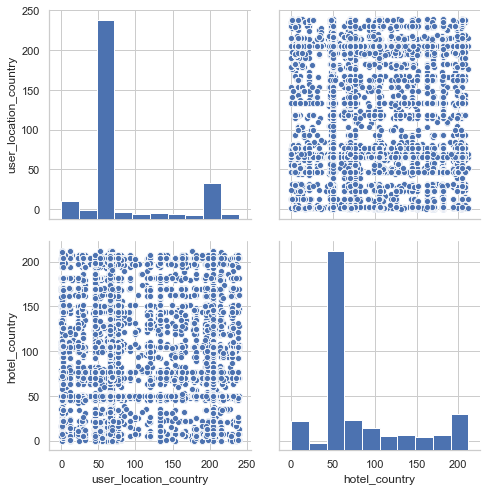

In [107]:
sns.set(style='whitegrid', context='notebook')
cola =[ 'user_location_country','hotel_country']
sns.pairplot(myData[cola], size =3.5);
plt.show()

In [108]:
user_location_city	orig_destination_distance	user_id	is_mobile	is_package	...	srch_children_cnt	srch_rm_cnt	srch_destination_id	srch_destination_type_id	is_booking	cnt	hotel_continent	hotel_country	hotel_market	hotel_cluster

SyntaxError: invalid syntax (<ipython-input-108-017aef6e099d>, line 1)

En nuestro gráfico la columna orin_destination_distance tiene muchos valores null. para añadirlos tenemos que hacer media o medianas o modas y para que esté muchísimo mejor es preferible hacer la media separada por valores(mujeres, homnres, casados...)

**A CONTINUACION VAMOS A PASAR A ANALIZAR LOS DATOS GRAFICAMENTE**


Primero hemos impreso una lista que nos ordena de mayor a menor el numero de clientes que hay de cada país. A continuación, vamos a analizar el porcentaje de gente que hay en cada pais y pasarlo a un dataframe para poder convertirlo en graficas posteriormente

In [111]:
myData['user_location_country'].value_counts()

66     140891
205     21765
69      19661
3        7017
46       5739
1        3753
77       3644
133      3506
215      3250
119      2418
23       2189
70       1715
167      1622
194      1395
231      1131
80       1096
182      1062
195       893
179       859
154       829
12        764
198       760
214       750
62        730
52        697
55        696
0         684
68        615
48        568
235       562
        ...  
54         10
4           9
114         8
74          6
221         6
223         5
83          5
31          5
13          5
105         5
139         5
150         4
146         4
197         4
73          4
124         4
101         4
108         4
174         3
126         3
67          3
72          3
157         3
184         2
111         2
224         2
45          1
60          1
87          1
122         1
Name: user_location_country, Length: 148, dtype: int64

In [821]:
#cuento el numero de veces que se repite cada  valor de ContentID
ValoresContentID=myData['user_location_country'].value_counts()
#como el resultado es una serie lo convierto en un dataframe, cambiando el nombre de las columnas de dicha serie
VID = ValoresContentID.to_frame().reset_index()
VID['ValoresDiferentes']=VID['index']
VID['SumaTodosValores']=VID['user_location_country']
VID = VID.drop(['index'], axis=1)
VID = VID.drop(['user_location_country'], axis=1)

VID['ArregloGrafico'] = VID.index+1
#añado una columna que me calcule el % de las repeticiones con respecto al total de valores, tomando ademas solo dos decimales
resRep=100*(VID['SumaTodosValores'])/(VID['SumaTodosValores'].sum())
resultRep=round(resRep,2)
VID['%repeticiones']=resultRep
VID.head(20)



ValoresDiferentes  SumaTodosValores  ArregloGrafico  %repeticiones
0                  66            140891               1          57.87
1                 205             21765               2           8.94
2                  69             19661               3           8.08
3                   3              7017               4           2.88
4                  46              5739               5           2.36
5                   1              3753               6           1.54
6                  77              3644               7           1.50
7                 133              3506               8           1.44
8                 215              3250               9           1.34
9                 119              2418              10           0.99
10                 23              2189              11           0.90
11                 70              1715              12           0.70
12                167              1622              13           0.67
13                194              1395              14           0.57
14                231              1131              15           0.46
15                 80              1096              16           0.45
16                182              1062              17           0.44
17                195               893              18           0.37
18                179               859              19           0.35
19                154               829              20           0.34

La primera gráfica que hemos echo nos ayuda a ver el volumen de clientes que hay en los paises que tienen más clientes, es decir, hace un gráfico de los 20 paises con más usuarios. Como podemos observar, hay una gran cantidad de usuarios pertenecientes al país número 66

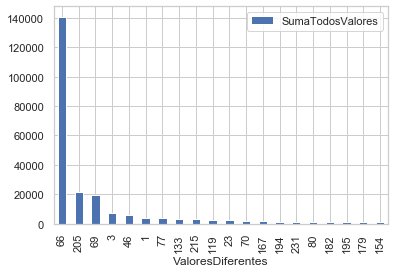

In [282]:

VID.head(20).plot(x='ValoresDiferentes', y='SumaTodosValores', kind='bar')

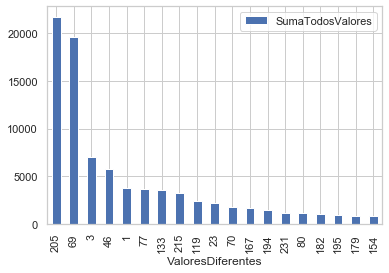

In [822]:
VID.head(20).tail(19).plot(x='ValoresDiferentes', y='SumaTodosValores', kind='bar')

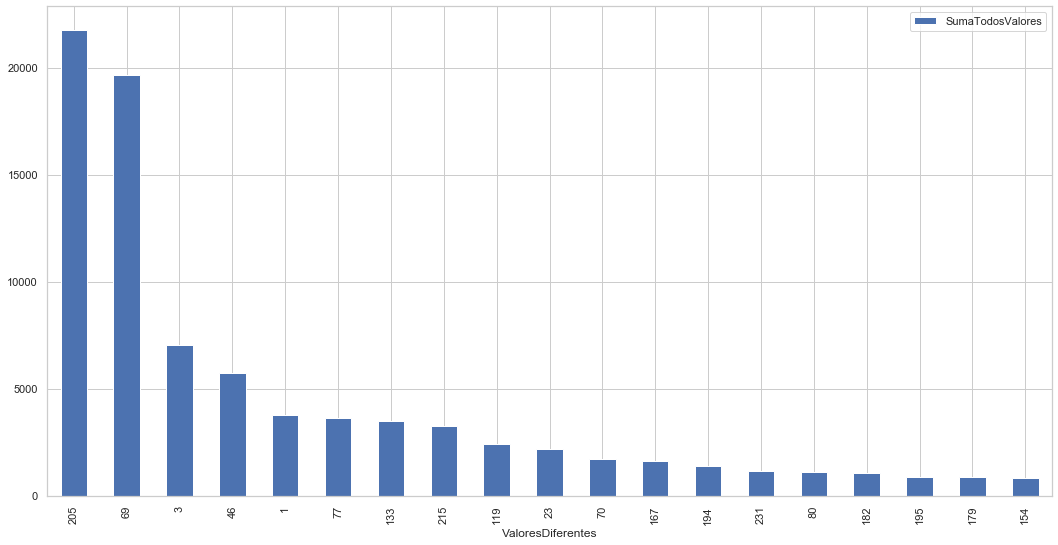

In [823]:
VID.head(20).tail(19).plot(x='ValoresDiferentes', y='SumaTodosValores', kind='bar', figsize=(18,9))

Otra gráfica que hemos echo ha sido la de diagrama de sector de los 5 paises con más usuarios. Este diagrama nos muestra mediante porcentaje la diferencia que hay de valores entre los 5 primeros paises más repetidos

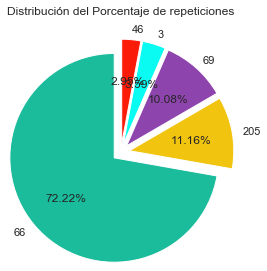

In [816]:
ValoresDiferentes=VID.head()['ValoresDiferentes']
ValoresDiferentes=list(ValoresDiferentes)  
#ValoresContentID #labels 

#definimos los PORCENTAJES DE CADA PORCIÓN, lo calculado anteriormente el % repeticiones.
PCTrep=VID.head()['%repeticiones']
PCTrep=list(PCTrep)

#DEFIMIMOS COLORES
colores = ['#1abc9c', '#f1c40f', '#8e44ad', '#09FBF1', '#FB1B09'] #LabelColor

#DIBUJAMOS GRÁFICA.  
plt.pie(PCTrep, labels = ValoresDiferentes, colors=colores,
        startangle=90, explode = (0.1, 0.1, 0.1, 0.1,0.1),
        radius = 1.2, autopct = '%1.2f%%')

#TITULO
plt.title('Distribución del Porcentaje de repeticiones\n\n')

#MOSTRAMOS GRÁFICA.
plt.show()#SI lo comento se me imprime si no, no. not exactly

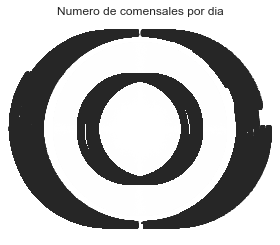

In [249]:
myData.is_booking.plot(kind = 'pie',
                              title = 'Numero de comensales por dia',
                              autopct='%.2f');

A continuación, nos dimos cuenta que había una serie de columnas donde la respuesta era 'SI' o 'NO'. Por lo tanto nos pusimos a calcular una tabla que nos sacara el porcentaje de '1' y '0' que había y posteriormente lo pasamos a grafica de sector para visualizarlo con mayor facilidad

La primera columna que tiene dichas características es: 'is_booking'. el valor 1 nos indica si se ha echo la reserva y el valor 0 si unicamente se ha metido en ella. Como podemso observar la opción de reserva es mucho mayor que la de hacer click unicamente.

In [818]:
#cuento el numero de veces que se repite cada  valor de ContentID
ValoresContentID=myData['is_booking'].value_counts()
#como el resultado es una serie lo convierto en un dataframe, cambiando el nombre de las columnas de dicha serie
VID = ValoresContentID.to_frame().reset_index()
VID['ValoresDiferentes']=VID['index']
VID['SumaTodosValores']=VID['is_booking']
VID = VID.drop(['index'], axis=1)
VID = VID.drop(['is_booking'], axis=1)

VID['ArregloGrafico'] = VID.index+1
#añado una columna que me calcule el % de las repeticiones con respecto al total de valores, tomando ademas solo dos decimales
resRep=100*(VID['SumaTodosValores'])/(VID['SumaTodosValores'].sum())
resultRep=round(resRep,2)
VID['%repeticiones']=resultRep
VID.head(20)

ValoresDiferentes  SumaTodosValores  ArregloGrafico  %repeticiones
0                0.0            223012               1          91.61
1                1.0             20432               2           8.39

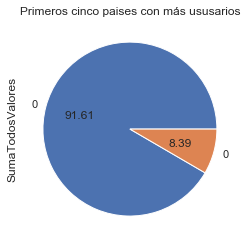

In [261]:
VID.SumaTodosValores.plot(labels = ValoresDiferentes,
                                  kind = 'pie',
                                 title = 'Primeros cinco paises con más ususarios',
                                 autopct='%.2f');

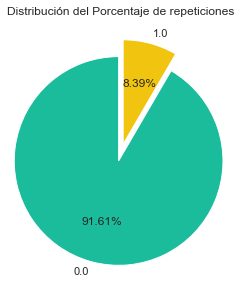

In [819]:
ValoresDiferentes=VID.head()['ValoresDiferentes']
ValoresDiferentes=list(ValoresDiferentes)  
#ValoresContentID #labels 

#definimos los PORCENTAJES DE CADA PORCIÓN, lo calculado anteriormente el % repeticiones.
PCTrep=VID['%repeticiones']
PCTrep=list(PCTrep)

#DEFIMIMOS COLORES
#colores = ['#1abc9c', '#f1c40f', '#8e44ad'] #LabelColor

#DIBUJAMOS GRÁFICA.  
plt.pie(PCTrep, labels = ValoresDiferentes, colors=colores,
        startangle=90, explode = (0.1, 0.1,),
        radius = 1.2, autopct = '%1.2f%%')

#TITULO
plt.title('Distribución del Porcentaje de repeticiones\n\n')

#MOSTRAMOS GRÁFICA.
plt.show()#SI lo comento se me imprime si no, no. not exactly

La siguiente variable que vamos a analizar es: 'is_mobile'. esta variable tiene un '1' cuando se conecto desde el teléfono móvil y un '0' si fue mediante otro medio. Como podemos observar la mayoria de personas se conectan desde otro dispositivo para hacer su reserva. 

In [264]:
#cuento el numero de veces que se repite cada  valor de ContentID
ValoresContentID=myData['is_mobile'].value_counts()
#como el resultado es una serie lo convierto en un dataframe, cambiando el nombre de las columnas de dicha serie
VID = ValoresContentID.to_frame().reset_index()
VID['ValoresDiferentes']=VID['index']
VID['SumaTodosValores']=VID['is_mobile']
VID = VID.drop(['index'], axis=1)
VID = VID.drop(['is_mobile'], axis=1)

VID['ArregloGrafico'] = VID.index+1
#añado una columna que me calcule el % de las repeticiones con respecto al total de valores, tomando ademas solo dos decimales
resRep=100*(VID['SumaTodosValores'])/(VID['SumaTodosValores'].sum())
resultRep=round(resRep,2)
VID['%repeticiones']=resultRep
VID.head(20)

ValoresDiferentes  SumaTodosValores  ArregloGrafico  %repeticiones
0                  0            211134               1          86.73
1                  1             32310               2          13.27

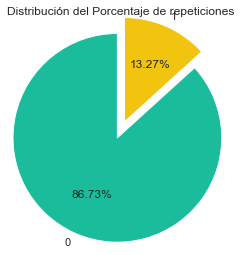

In [265]:
ValoresDiferentes=VID.head()['ValoresDiferentes']
ValoresDiferentes=list(ValoresDiferentes)  
#ValoresContentID #labels 

#definimos los PORCENTAJES DE CADA PORCIÓN, lo calculado anteriormente el % repeticiones.
PCTrep=VID['%repeticiones']
PCTrep=list(PCTrep)

#DEFIMIMOS COLORES
#colores = ['#1abc9c', '#f1c40f', '#8e44ad'] #LabelColor

#DIBUJAMOS GRÁFICA.  
plt.pie(PCTrep, labels = ValoresDiferentes, colors=colores,
        startangle=90, explode = (0.1, 0.1,),
        radius = 1.2, autopct = '%1.2f%%')

#TITULO
plt.title('Distribución del Porcentaje de repeticiones')

#MOSTRAMOS GRÁFICA.
plt.show()#SI lo comento se me imprime si no, no. not exactly

La otra veriable con la misma caracteristica es: 'is_package'. Esta variable tiene un '1' si la reserva se generó con un paquete, es decir, con vuelo incluido o un 0 cuando no fue así. En este caso podemos observar como la mayoría de las reservas no se hacen con vuelo incluido.

In [297]:
#cuento el numero de veces que se repite cada  valor de ContentID
ValoresContentID=myData['is_package'].value_counts()
#como el resultado es una serie lo convierto en un dataframe, cambiando el nombre de las columnas de dicha serie
VID = ValoresContentID.to_frame().reset_index()
VID['ValoresDiferentes']=VID['index']
VID['SumaTodosValores']=VID['is_package']
VID = VID.drop(['index'], axis=1)
VID = VID.drop(['is_package'], axis=1)

VID['ArregloGrafico'] = VID.index+1
#añado una columna que me calcule el % de las repeticiones con respecto al total de valores, tomando ademas solo dos decimales
resRep=100*(VID['SumaTodosValores'])/(VID['SumaTodosValores'].sum())
resultRep=round(resRep,2)
VID['%repeticiones']=resultRep
VID.head(20)

ValoresDiferentes  SumaTodosValores  ArregloGrafico  %repeticiones
0                  0            181360               1           74.5
1                  1             62085               2           25.5

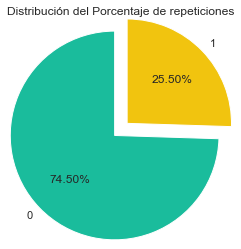

In [298]:
ValoresDiferentes=VID.head()['ValoresDiferentes']
ValoresDiferentes=list(ValoresDiferentes)  
#ValoresContentID #labels 

#definimos los PORCENTAJES DE CADA PORCIÓN, lo calculado anteriormente el % repeticiones.
PCTrep=VID['%repeticiones']
PCTrep=list(PCTrep)

#DEFIMIMOS COLORES
#colores = ['#1abc9c', '#f1c40f', '#8e44ad'] #LabelColor

#DIBUJAMOS GRÁFICA.  
plt.pie(PCTrep, labels = ValoresDiferentes, colors=colores,
        startangle=90, explode = (0.1, 0.1,),
        radius = 1.2, autopct = '%1.2f%%')

#TITULO
plt.title('Distribución del Porcentaje de repeticiones')

#MOSTRAMOS GRÁFICA.
plt.show()#SI lo comento se me imprime si no, no. not exactly

Una vez analizadas todas las variables cuya respuesta solo es '1' o '0', hemos pasado a analizar la cantidad de personas que viajan en cada reserva. En este caso hemos realizado una tabla con la variable 'srch_adults_cnt', donde aparece el porcentaje de reservas con 'X' números de adultos. Como podemos observar el mayor valor de adultos es 9 y la mayoría de las personas que usan este medio para reservar sus viajes son dos personas.

In [268]:
#cuento el numero de veces que se repite cada  valor de ContentID
ValoresContentID=myData['srch_adults_cnt'].value_counts()
#como el resultado es una serie lo convierto en un dataframe, cambiando el nombre de las columnas de dicha serie
VID = ValoresContentID.to_frame().reset_index()
VID['ValoresDiferentes']=VID['index']
VID['SumaTodosValores']=VID['srch_adults_cnt']
VID = VID.drop(['index'], axis=1)
VID = VID.drop(['srch_adults_cnt'], axis=1)

VID['ArregloGrafico'] = VID.index+1
#añado una columna que me calcule el % de las repeticiones con respecto al total de valores, tomando ademas solo dos decimales
resRep=100*(VID['SumaTodosValores'])/(VID['SumaTodosValores'].sum())
resultRep=round(resRep,2)
VID['%repeticiones']=resultRep
VID.head(20)

ValoresDiferentes  SumaTodosValores  ArregloGrafico  %repeticiones
0                  2            160283               1          65.84
1                  1             51194               2          21.03
2                  4             13193               3           5.42
3                  3             12507               4           5.14
4                  6              2475               5           1.02
5                  5              2091               6           0.86
6                  0               693               7           0.28
7                  8               606               8           0.25
8                  7               314               9           0.13
9                  9                88              10           0.04

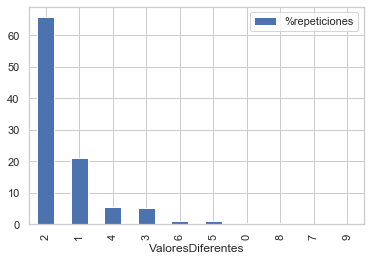

In [276]:
VID.head(20).plot(x='ValoresDiferentes', y='%repeticiones', kind='bar')

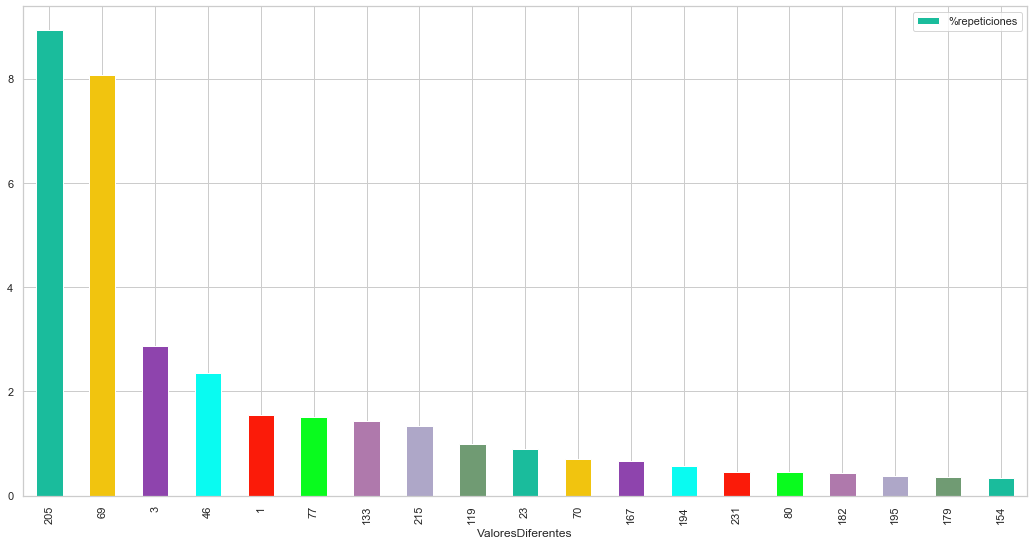

In [828]:
colores = ['#1abc9c', '#f1c40f', '#8e44ad', '#09FBF1', '#FB1B09', '#09FB1E', '#AF79AC', '#AEA7C8', '#709B73'] 
VID.head(20).tail(19).plot(x='ValoresDiferentes', y='%repeticiones', kind='bar', figsize=(18,9), color=colores)

A continuacion analizamos la cantidad de niños que hay en cada viaje, como podemos observar,en la moyoría de viajes que se realizan no viaja ningún niño. Como conclusión a esta variable y la anterior es que, la mayoría de las personas que reservan su viaje mediante expedia son parejas sin niños. Esto nos ayuda a saber cual es nuestro público objetivo ya que la mayoría de parejas sin niños tienen una edad determinada (18-30)

In [292]:
#cuento el numero de veces que se repite cada  valor de ContentID
ValoresContentID=myData['srch_children_cnt'].value_counts()
#como el resultado es una serie lo convierto en un dataframe, cambiando el nombre de las columnas de dicha serie
VID = ValoresContentID.to_frame().reset_index()
VID['ValoresDiferentes']=VID['index']
VID['SumaTodosValores']=VID['srch_children_cnt']
VID = VID.drop(['index'], axis=1)
VID = VID.drop(['srch_children_cnt'], axis=1)

VID['ArregloGrafico'] = VID.index+1
#añado una columna que me calcule el % de las repeticiones con respecto al total de valores, tomando ademas solo dos decimales
resRep=100*(VID['SumaTodosValores'])/(VID['SumaTodosValores'].sum())
resultRep=round(resRep,2)
VID['%repeticiones']=resultRep
VID.head(20)

ValoresDiferentes  SumaTodosValores  ArregloGrafico  %repeticiones
0                  0            192463               1          79.06
1                  1             26876               2          11.04
2                  2             19977               3           8.21
3                  3              2999               4           1.23
4                  4               946               5           0.39
5                  5                73               6           0.03
6                  6                64               7           0.03
7                  7                27               8           0.01
8                  9                10               9           0.00
9                  8                 9              10           0.00

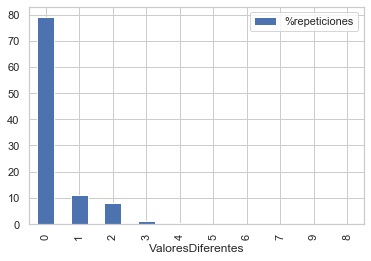

In [293]:
VID.head(20).plot(x='ValoresDiferentes', y='%repeticiones', kind='bar')

In [300]:
req=myData.groupby('posa_continent').size()
req

posa_continent
0      1391
1     37378
2     15470
3    184871
4      4335
dtype: int64

In [318]:
df = pd.DataFrame({
    'Continente':myData.iloc[:,1],
    'Pais':myData.iloc[:,2],
})

In [319]:
df.head()

Continente  Pais
0           2     3
1           2     3
2           2     3
3           2     3
4           2     3

In [329]:
Mascara_continente0 = myData.posa_continent == 0
myData[Mascara_continente0].head()

date_time  site_name  posa_continent  user_location_country  \
875   2014-01-10 21:47:59         10               0                    182   
876   2014-01-10 22:31:11         10               0                    182   
877   2014-01-10 22:32:13         10               0                    182   
1637  2014-12-24 15:19:10         26               0                    215   
1638  2014-12-24 15:25:16         26               0                    215   

      user_location_region  user_location_city  orig_destination_distance  \
875                    416               32100                  3269.5288   
876                    416               32100                  3269.8720   
877                    416               32100                  3269.5288   
1637                   621               25374                        NaN   
1638                   621               25374                        NaN   

      user_id  is_mobile  is_package  ...  srch_children_cnt srch_rm_cnt  \
875      5770          0           1  ...                  2         1.0   
876      5770          0           1  ...                  2         1.0   
877      5770          0           1  ...                  2         1.0   
1637     7707          1           0  ...                  0         1.0   
1638     7707          1           0  ...                  0         1.0   

     srch_destination_id  srch_destination_type_id  is_booking  cnt  \
875              11439.0                       1.0         0.0  6.0   
876              11439.0                       1.0         0.0  1.0   
877              11439.0                       1.0         0.0  7.0   
1637              1114.0                       1.0         0.0  2.0   
1638              1114.0                       1.0         0.0  1.0   

      hotel_continent  hotel_country  hotel_market  hotel_cluster  
875               4.0          163.0        1503.0           65.0  
876               4.0          163.0        1503.0           52.0  
877               4.0          163.0        1503.0           65.0  
1637              4.0            8.0         122.0           10.0  
1638              4.0            8.0         122.0           10.0  

[5 rows x 24 columns]

In [340]:
Arr = pd.unique(myData[Mascara_continente0]['user_location_country'].values.ravel())
Arr

array([182, 215, 162,  66], dtype=int64)

In [341]:
len(Arr)

4

In [331]:
Mascara_continente1 = myData.posa_continent == 1
myData[Mascara_continente1].head()

date_time  site_name  posa_continent  user_location_country  \
134  2013-01-10 18:04:37         37               1                     69   
135  2013-01-10 18:24:37         37               1                     69   
136  2013-01-10 18:26:40         37               1                     69   
137  2013-01-10 18:30:08         37               1                     69   
138  2013-01-10 18:30:27         37               1                     69   

     user_location_region  user_location_city  orig_destination_distance  \
134                   923               23649                        NaN   
135                   923               23649                        NaN   
136                   923               23649                        NaN   
137                   923               23649                        NaN   
138                   923               23649                        NaN   

     user_id  is_mobile  is_package  ...  srch_children_cnt srch_rm_cnt  \
134     2140          1           0  ...                  2         3.0   
135     2140          1           0  ...                  3         2.0   
136     2140          1           0  ...                  2         3.0   
137     2140          1           0  ...                  2         3.0   
138     2140          1           0  ...                  2         1.0   

    srch_destination_id  srch_destination_type_id  is_booking  cnt  \
134             22494.0                       6.0         0.0  1.0   
135             22494.0                       6.0         0.0  1.0   
136             22494.0                       6.0         0.0  2.0   
137             22494.0                       6.0         1.0  1.0   
138             22494.0                       6.0         0.0  1.0   

     hotel_continent  hotel_country  hotel_market  hotel_cluster  
134              6.0          204.0        1776.0           82.0  
135              6.0          204.0        1776.0           43.0  
136              6.0          204.0        1776.0           43.0  
137              6.0          204.0        1776.0           43.0  
138              6.0          204.0        1776.0           43.0  

[5 rows x 24 columns]

In [338]:
Arr1 =pd.unique(myData[Mascara_continente1]['user_location_country'].values.ravel())
Arr1

array([ 69,  46, 133,  68,   1,  12, 148, 167,  75, 154, 157,   5,  63,
        32,  62, 141,  52, 214,  80,  55,  66, 134, 219, 191, 217, 235,
        77, 198, 215,  34, 233,  47,  70, 125, 179,  19, 119, 231,  91,
       104,  59,  65, 205,  26,   3, 190, 118,  23, 195, 176,  85, 229,
       129,  58,  24, 182,   0,  29,  73, 202, 109, 188, 224, 115, 223,
       228,  93, 208,  87, 194, 168, 222, 206], dtype=int64)

In [339]:
len(Arr1)

73

In [342]:
Mascara_continente2 = myData.posa_continent == 2
myData[Mascara_continente2].head()

date_time  site_name  posa_continent  user_location_country  \
139  2013-12-01 21:59:08         24               2                      3   
140  2013-12-01 21:59:58         24               2                      3   
141  2013-12-01 22:00:44         24               2                      3   
142  2013-12-01 22:14:52         24               2                      3   
143  2013-12-02 01:46:54         24               2                      3   

     user_location_region  user_location_city  orig_destination_distance  \
139                    64               12576                        NaN   
140                    64               12576                        NaN   
141                    64               12576                        NaN   
142                    64               12576                        NaN   
143                    64               12576                        NaN   

     user_id  is_mobile  is_package  ...  srch_children_cnt srch_rm_cnt  \
139     2451          0           0  ...                  0         1.0   
140     2451          0           0  ...                  0         1.0   
141     2451          0           0  ...                  0         1.0   
142     2451          0           0  ...                  0         1.0   
143     2451          0           0  ...                  0         1.0   

    srch_destination_id  srch_destination_type_id  is_booking   cnt  \
139             14038.0                       6.0         0.0  10.0   
140             14038.0                       6.0         0.0   1.0   
141             14038.0                       6.0         0.0   1.0   
142             14038.0                       6.0         0.0   1.0   
143             53949.0                       3.0         0.0   1.0   

     hotel_continent  hotel_country  hotel_market  hotel_cluster  
139              6.0          105.0          35.0           82.0  
140              6.0          105.0          35.0           82.0  
141              6.0          105.0          35.0           82.0  
142              6.0          105.0          35.0           82.0  
143              6.0          105.0          29.0           37.0  

[5 rows x 24 columns]

In [346]:
Arr2 =pd.unique(myData[Mascara_continente2]['user_location_country'].values.ravel())
Arr2

array([  3,  23, 194, 202,  80,  93,  69,   0,  70, 119, 231, 167,  66,
       133,  46, 143,  50,   5, 229, 191, 115,  12,   1,  77,  10,  55,
       148,  68, 205, 182], dtype=int64)

In [347]:
len(Arr2)

30

In [348]:
Mascara_continente3 = myData.posa_continent == 3
myData[Mascara_continente3].head()

date_time  site_name  posa_continent  user_location_country  \
0  2014-08-11 07:46:59          2               3                     66   
1  2014-08-11 08:22:12          2               3                     66   
2  2014-08-11 08:24:33          2               3                     66   
3  2014-08-09 18:05:16          2               3                     66   
4  2014-08-09 18:08:18          2               3                     66   

   user_location_region  user_location_city  orig_destination_distance  \
0                   348               48862                  2234.2641   
1                   348               48862                  2234.2641   
2                   348               48862                  2234.2641   
3                   442               35390                   913.1932   
4                   442               35390                   913.6259   

   user_id  is_mobile  is_package  ...  srch_children_cnt srch_rm_cnt  \
0       12          0           1  ...                  0         1.0   
1       12          0           1  ...                  0         1.0   
2       12          0           0  ...                  0         1.0   
3       93          0           0  ...                  0         1.0   
4       93          0           0  ...                  0         1.0   

  srch_destination_id  srch_destination_type_id  is_booking  cnt  \
0              8250.0                       1.0         0.0  3.0   
1              8250.0                       1.0         1.0  1.0   
2              8250.0                       1.0         0.0  1.0   
3             14984.0                       1.0         0.0  1.0   
4             14984.0                       1.0         0.0  1.0   

   hotel_continent  hotel_country  hotel_market  hotel_cluster  
0              2.0           50.0         628.0            1.0  
1              2.0           50.0         628.0            1.0  
2              2.0           50.0         628.0            1.0  
3              2.0           50.0        1457.0           80.0  
4              2.0           50.0        1457.0           21.0  

[5 rows x 24 columns]

In [350]:
Arr3 =pd.unique(myData[Mascara_continente3]['user_location_country'].values.ravel())
Arr3

array([ 66,  55, 205, 215, 103, 134, 239,  85,  69,  28,   3,  68,  93,
       231, 173, 148, 141,  77,  71,   1,  24, 133,   6,  80, 195, 190,
       154, 209,  51,  49,  75, 162, 158,  70, 235,  54,  46,  29, 168,
       130,  39,  50, 225, 182,  27,  48, 179,  64, 194, 202, 221,  91,
       206,  82, 198,  59,  63, 101,  19, 230, 142, 115, 119,   5, 166,
       208,  23, 111,  12,  57,  47, 109,  26, 181, 218, 167,  52,  62,
       176, 174,  32, 214, 105, 108,  92, 144, 192,  16, 114, 118, 104,
       163,  74,   0, 184, 150, 178, 129, 131, 117,   4,  58, 156, 191,
        30,  31, 149, 126,  67, 152, 229, 228, 197, 123,  43,  83,  45,
        13,  95,  15,  44, 139, 217,  60, 146, 124,  76, 143, 137, 238,
        99,  10, 223, 155,  72, 122, 196], dtype=int64)

In [351]:
len(Arr3)

137

In [8]:
Mascara_continente4 = myData.srch_adults_cnt == 5
myData[Mascara_continente4]

date_time  site_name  posa_continent  user_location_country  \
134     2013-01-10 18:04:37         37               1                     69   
136     2013-01-10 18:26:40         37               1                     69   
137     2013-01-10 18:30:08         37               1                     69   
584     2014-07-12 12:06:37         25               2                     23   
593     2014-07-12 19:36:15         25               2                     23   
595     2014-07-12 19:39:57         25               2                     23   
598     2014-07-12 19:54:54         25               2                     23   
610     2014-07-12 21:06:25         25               2                     23   
749     2013-01-28 10:45:10         13               1                     46   
750     2013-01-28 10:45:58         13               1                     46   
751     2013-01-28 10:46:43         13               1                     46   
762     2013-09-27 17:18:31         13               1                     46   
763     2013-09-27 17:36:20         13               1                     46   
780     2014-02-08 12:58:03         13               1                     46   
781     2014-02-08 13:03:02         13               1                     46   
800     2014-07-23 15:58:12         13               1                     46   
801     2014-07-23 15:58:52         13               1                     46   
802     2014-07-23 15:59:43         13               1                     46   
803     2014-07-23 16:19:05         13               1                     46   
804     2014-07-23 16:41:28         13               1                     46   
809     2014-07-31 16:05:47         13               1                     46   
813     2014-08-01 09:48:57         13               1                     46   
814     2014-08-01 09:49:30         13               1                     46   
1451    2014-05-26 12:45:51          2               3                     66   
1452    2014-05-26 12:46:33          2               3                     66   
1453    2014-05-26 12:47:32          2               3                     66   
1454    2014-05-26 19:41:29          2               3                     66   
1464    2014-05-26 20:39:17          2               3                     66   
1465    2014-05-26 20:40:59          2               3                     66   
1470    2014-05-27 19:54:48          2               3                     66   
...                     ...        ...             ...                    ...   
240371  2014-10-20 12:23:39          2               3                     66   
240451  2014-07-04 14:42:06          2               3                     66   
240464  2014-07-06 12:04:49          2               3                     66   
240465  2014-07-06 12:09:01          2               3                     66   
240466  2014-07-06 12:28:02          2               3                     66   
240467  2014-07-06 12:29:40          2               3                     66   
241084  2014-10-09 19:14:59         46               2                    167   
241085  2014-10-09 20:01:38         46               2                    167   
241086  2014-10-09 20:07:06         46               2                    167   
241087  2014-10-09 20:07:25         46               2                    167   
241088  2014-10-09 20:08:47         46               2                    167   
241089  2014-10-09 20:09:50         46               2                    167   
241090  2014-10-09 20:11:58         46               2                    167   
241091  2014-10-09 20:15:00         46               2                    167   
241092  2014-10-09 20:16:01         46               2                    167   
241093  2014-10-09 20:17:43         46               2                    167   
241094  2014-10-09 20:18:31         46               2                    167   
241095  2014-10-09 20:19:48         46           

In [25]:
#cuento el numero de veces que se repite cada  valor de ContentID
ValoresContentID=myData[Mascara_continente4]['hotel_cluster'].value_counts()
#como el resultado es una serie lo convierto en un dataframe, cambiando el nombre de las columnas de dicha serie
VID5 = ValoresContentID.to_frame().reset_index()
VID5['ValoresDiferentes']=VID5['index']
VID5['SumaTodosValores']=VID5['hotel_cluster']
VID5 = VID5.drop(['index'], axis=1)
VID5 = VID5.drop(['hotel_cluster'], axis=1)

VID5['ArregloGrafico'] = VID5.index+1
#añado una columna que me calcule el % de las repeticiones con respecto al total de valores, tomando ademas solo dos decimales
resRep=100*(VID5['SumaTodosValores'])/(VID5['SumaTodosValores'].sum())
resultRep=round(resRep,2)
VID5['%repeticiones']=resultRep
VID5

ValoresDiferentes  SumaTodosValores  ArregloGrafico  %repeticiones
0                65.0               133               1           6.36
1                91.0                58               2           2.77
2                98.0                48               3           2.30
3                71.0                42               4           2.01
4                30.0                41               5           1.96
5                42.0                41               6           1.96
6                16.0                38               7           1.82
7                72.0                37               8           1.77
8                10.0                37               9           1.77
9                95.0                36              10           1.72
10               52.0                34              11           1.63
11               25.0                34              12           1.63
12               41.0                34              13           1.63
13               90.0                33              14           1.58
14               48.0                32              15           1.53
15               83.0                31              16           1.48
16                4.0                30              17           1.43
17               40.0                30              18           1.43
18               31.0                29              19           1.39
19                6.0                29              20           1.39
20               18.0                28              21           1.34
21               64.0                27              22           1.29
22               49.0                27              23           1.29
23               62.0                26              24           1.24
24                5.0                25              25           1.20
25               56.0                25              26           1.20
26               99.0                24              27           1.15
27               21.0                24              28           1.15
28               61.0                24              29           1.15
29               28.0                24              30           1.15
..                ...               ...             ...            ...
69               75.0                14              70           0.67
70               63.0                14              71           0.67
71               69.0                14              72           0.67
72               12.0                14              73           0.67
73                9.0                13              74           0.62
74               15.0                13              75           0.62
75               44.0                13              76           0.62
76               19.0                13              77           0.62
77               55.0                12              78           0.57
78               23.0                12              79           0.57
79               80.0                11              80           0.53
80               60.0                11              81           0.53
81               37.0                11              82           0.53
82                8.0                11              83           0.53
83               24.0                11              84           0.53
84               84.0                10              85           0.48
85               89.0                10              86           0.48
86               35.0                10              87           0.48
87               92.0                10              88           0.48
88                3.0                10              89           0.48
89               67.0                 9              90           0.43
90               45.0                 9              91           0.43
91               38.0                 9              92           0.43
92               14.0                 9              93           0.43
93               79.0       

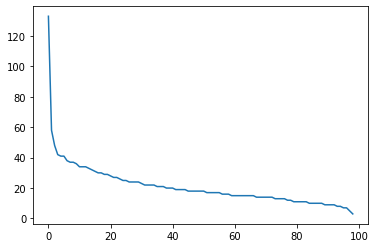

In [27]:
x = VID5['SumaTodosValores']
plot(x)
show()

In [5]:
Mascara_children = myData.srch_children_cnt == 1
myData[Mascara_children].head()

date_time  site_name  posa_continent  user_location_country  \
435  2013-06-25 00:02:16         25               2                     23   
436  2013-06-25 00:07:09         25               2                     23   
437  2013-06-25 00:07:30         25               2                     23   
438  2013-06-25 00:07:53         25               2                     23   
439  2013-06-25 00:09:38         25               2                     23   

     user_location_region  user_location_city  orig_destination_distance  \
435                    79               26143                        NaN   
436                    79               26143                        NaN   
437                    79               26143                        NaN   
438                    79               26143                        NaN   
439                    79               26143                        NaN   

     user_id  is_mobile  is_package  ...  srch_children_cnt srch_rm_cnt  \
435     3972          0           0  ...                  1         1.0   
436     3972          0           0  ...                  1         1.0   
437     3972          0           0  ...                  1         1.0   
438     3972          0           0  ...                  1         1.0   
439     3972          0           0  ...                  1         1.0   

    srch_destination_id  srch_destination_type_id  is_booking   cnt  \
435             14908.0                       1.0         0.0  23.0   
436             14908.0                       1.0         0.0   2.0   
437             14908.0                       1.0         0.0   4.0   
438             14908.0                       1.0         0.0   2.0   
439             14908.0                       1.0         0.0   2.0   

     hotel_continent  hotel_country  hotel_market  hotel_cluster  
435              3.0           88.0        1032.0           30.0  
436              3.0           88.0        1032.0           30.0  
437              3.0           88.0        1032.0           30.0  
438              3.0           88.0        1032.0           30.0  
439              3.0           88.0        1032.0           30.0  

[5 rows x 24 columns]

In [6]:
ValoresDiferentes=myData[Mascara_children].head()['ValoresDiferentes']
ValoresDiferentes=list(ValoresDiferentes)  
#ValoresContentID #labels 

#definimos los PORCENTAJES DE CADA PORCIÓN, lo calculado anteriormente el % repeticiones.
PCTrep=myData[Mascara_children].head()['%repeticiones']
PCTrep=list(PCTrep)

#DEFIMIMOS COLORES
colores = ['#E29DB9', '#E173B9', '#E04BAA', '#F10E9E','#AD5990'] #LabelColor

#DIBUJAMOS GRÁFICA.  
plt.pie(PCTrep, labels = ValoresDiferentes, colors=colores,
        startangle=5, explode = (0.1, 0.1, 0.1, 0.1,0.1),
        radius =2.7, autopct = '%1.2f%%')

#TITULO
plt.title('Volumen de clientes que hay por cada país\n\n\n\n\n\n\n\n\n\n')

#MOSTRAMOS GRÁFICA. '#E29DAF',
plt.show()#SI lo comento se me imprime si no, no. not exactly

KeyError: 'ValoresDiferentes'

In [870]:
Mascara_continente333 = myData.hotel_cluster == 82.0
myData[Mascara_continente333]

date_time  site_name  posa_continent  user_location_country  \
0       2014-08-11 07:46:59          2               3                     66   
1       2014-08-11 08:22:12          2               3                     66   
2       2014-08-11 08:24:33          2               3                     66   
3       2014-08-09 18:05:16          2               3                     66   
4       2014-08-09 18:08:18          2               3                     66   
5       2014-08-09 18:13:12          2               3                     66   
6       2014-07-16 09:42:23          2               3                     66   
7       2014-07-16 09:45:48          2               3                     66   
8       2014-07-16 09:52:11          2               3                     66   
9       2014-07-16 09:55:24          2               3                     66   
10      2014-07-16 10:00:06          2               3                     66   
11      2014-07-16 10:02:58          2               3                     66   
12      2014-01-17 06:24:56          2               3                     66   
13      2014-01-18 14:33:31          2               3                     66   
14      2014-01-21 06:39:08          2               3                     66   
15      2014-01-21 06:40:18          2               3                     66   
16      2014-01-22 06:10:02          2               3                     66   
17      2014-01-24 11:52:04          2               3                     66   
18      2014-01-24 17:26:24          2               3                     66   
19      2014-02-27 17:44:23          2               3                     66   
20      2014-02-27 18:01:32          2               3                     66   
21      2014-12-30 09:50:51          2               3                     66   
22      2014-12-30 09:55:43          2               3                     66   
23      2014-12-30 09:56:26          2               3                     66   
24      2014-10-22 12:20:56          2               3                     66   
25      2014-11-10 12:38:02          2               3                     66   
26      2013-06-15 15:10:49         30               4                    195   
27      2013-06-15 15:38:05         30               4                    195   
28      2014-11-22 14:32:46         30               4                    195   
29      2014-11-22 14:37:05         30               4                    195   
...                     ...        ...             ...                    ...   
243414  2014-10-03 10:13:51         37               1                     69   
243415  2014-10-21 15:10:49         37               1                     69   
243416  2014-10-25 16:10:26         37               1                     69   
243417  2014-10-25 16:11:42         37               1                     69   
243418  2014-10-25 16:15:07         37               1                     69   
243419  2014-10-26 09:57:10         37               1                     69   
243420  2014-10-26 09:59:10         37               1                     69   
243421  2014-10-26 19:39:39         37               1                     69   
243422  2014-10-26 19:44:49         37               1                     69   
243423  2014-10-26 19:45:27         37               1                     69   
243424  2014-10-26 19:50:35         37               1                     69   
243425  2014-10-29 16:07:17         37               1                     69   
243426  2014-10-29 16:07:49         37               1                     69   
243427  2014-10-29 16:09:02         37               1                     69   
243428  2014-10-29 16:13:01         37               1                     69   
243429  2014-10-31 15:48:49         37               1                     69   
243430  2014-10-31 16:03:28         37               1                     69   
243431  2014-10-31 16:29:02         37           

In [871]:
corr =myData[Mascara_continente333].corr()
corr

site_name  posa_continent  user_location_country  \
site_name                   1.000000       -0.748224               0.097609   
posa_continent             -0.748224        1.000000               0.119584   
user_location_country       0.097609        0.119584               1.000000   
user_location_region        0.302728       -0.208878              -0.022875   
user_location_city         -0.003296       -0.002371               0.094618   
orig_destination_distance   0.056167       -0.009159               0.061060   
user_id                     0.035374       -0.046493               0.030636   
is_mobile                   0.005506       -0.000309              -0.004275   
is_package                  0.119553       -0.128737              -0.021380   
channel                    -0.062027        0.086420               0.072104   
srch_adults_cnt            -0.013022        0.007995               0.023655   
srch_children_cnt          -0.035230        0.024984               0.033521   
srch_rm_cnt                 0.014948       -0.021783               0.008555   
srch_destination_id         0.017125       -0.013598              -0.004688   
srch_destination_type_id   -0.030835        0.049860               0.017361   
is_booking                 -0.011680        0.012970               0.005150   
cnt                         0.019500       -0.013323               0.008974   
hotel_continent             0.262242       -0.365031              -0.031581   
hotel_country               0.226723       -0.168493               0.122610   
hotel_market               -0.059635        0.053099               0.014571   
hotel_cluster                    NaN             NaN                    NaN   

                           user_location_region  user_location_city  \
site_name                              0.302728           -0.003296   
posa_continent                        -0.208878           -0.002371   
user_location_country                 -0.022875            0.094618   
user_location_region                   1.000000            0.077455   
user_location_city                     0.077455            1.000000   
orig_destination_distance              0.075410           -0.015442   
user_id                                0.023342           -0.002012   
is_mobile                              0.005007           -0.016802   
is_package                             0.045323            0.024873   
channel                               -0.022765            0.005727   
srch_adults_cnt                       -0.015036            0.003598   
srch_children_cnt                     -0.019435            0.001337   
srch_rm_cnt                           -0.010576           -0.000481   
srch_destination_id                    0.012806           -0.007186   
srch_destination_type_id               0.006021           -0.011740   
is_booking                             0.013742           -0.003596   
cnt                                   -0.005810            0.002067   
hotel_continent                        0.085767           -0.000737   
hotel_country                         -0.030265           -0.014798   
hotel_market                           0.031542            0.007642   
hotel_cluster                               NaN                 NaN   

                           orig_destination_distance   user_id  is_mobile  \
site_name                                   0.056167  0.035374   0.005506   
posa_continent                             -0.009159 -0.046493  -0.000309   
user_location_country                       0.061060  0.030636  -0.004275   
user_location_region                        0.075410  0.023342   0.005007   
user_location_city                         -0.015442 -0.002012  -0.016802   
orig_destination_distance                   1.000000  0.028465  -0.057874   
user_id                                     0.028465  1.000000  -0.022301   
is_mobile                                  -0.057874 -0.022301   1.000000   
is_package                      

In [867]:
pd.unique(myData['hotel_cluster'].values.ravel())

array([1], dtype=int64)

In [353]:
Arr4 =pd.unique(myData[Mascara_continente4]['user_location_country'].values.ravel())
Arr4

array([195,  77, 198,   1, 133,  32, 167,  80,  66,  85,  69,  50, 119,
        10, 231,   3], dtype=int64)

In [354]:
len(Arr4)

16

In [316]:
req=df['Pais'].groupby('Continente').size()
req

KeyError: 'Continente'

In [116]:
myData['hotel_country'].value_counts()

50.0     118231
8.0       12327
198.0     10381
70.0       9121
105.0      8758
204.0      7269
77.0       5946
182.0      5107
144.0      4088
106.0      3699
163.0      2920
63.0       2075
171.0      2040
48.0       2023
208.0      1967
5.0        1933
68.0       1785
99.0       1763
22.0       1749
168.0      1586
47.0       1536
51.0       1502
151.0      1445
126.0      1310
130.0      1251
170.0      1249
104.0      1193
146.0      1177
128.0      1138
82.0       1078
          ...  
75.0          7
76.0          7
55.0          7
74.0          7
184.0         6
29.0          6
42.0          5
197.0         5
14.0          5
134.0         5
30.0          4
205.0         3
28.0          3
120.0         2
65.0          2
33.0          2
210.0         2
178.0         1
150.0         1
101.0         1
207.0         1
167.0         1
18.0          1
85.0          1
94.0          1
37.0          1
191.0         1
166.0         1
176.0         1
109.0         1
Name: hotel_country, Len

In [117]:
contarValores = myData['hotel_country'].value_counts().head(20)
contarValores

50.0     118231
8.0       12327
198.0     10381
70.0       9121
105.0      8758
204.0      7269
77.0       5946
182.0      5107
144.0      4088
106.0      3699
163.0      2920
63.0       2075
171.0      2040
48.0       2023
208.0      1967
5.0        1933
68.0       1785
99.0       1763
22.0       1749
168.0      1586
Name: hotel_country, dtype: int64

In [118]:
Mascara_66 = myData.user_location_country == 66
myData[Mascara_66]

date_time  site_name  posa_continent  user_location_country  \
0       2014-08-11 07:46:59          2               3                     66   
1       2014-08-11 08:22:12          2               3                     66   
2       2014-08-11 08:24:33          2               3                     66   
3       2014-08-09 18:05:16          2               3                     66   
4       2014-08-09 18:08:18          2               3                     66   
5       2014-08-09 18:13:12          2               3                     66   
6       2014-07-16 09:42:23          2               3                     66   
7       2014-07-16 09:45:48          2               3                     66   
8       2014-07-16 09:52:11          2               3                     66   
9       2014-07-16 09:55:24          2               3                     66   
10      2014-07-16 10:00:06          2               3                     66   
11      2014-07-16 10:02:58          2               3                     66   
12      2014-01-17 06:24:56          2               3                     66   
13      2014-01-18 14:33:31          2               3                     66   
14      2014-01-21 06:39:08          2               3                     66   
15      2014-01-21 06:40:18          2               3                     66   
16      2014-01-22 06:10:02          2               3                     66   
17      2014-01-24 11:52:04          2               3                     66   
18      2014-01-24 17:26:24          2               3                     66   
19      2014-02-27 17:44:23          2               3                     66   
20      2014-02-27 18:01:32          2               3                     66   
21      2014-12-30 09:50:51          2               3                     66   
22      2014-12-30 09:55:43          2               3                     66   
23      2014-12-30 09:56:26          2               3                     66   
24      2014-10-22 12:20:56          2               3                     66   
25      2014-11-10 12:38:02          2               3                     66   
74      2013-02-15 13:18:43          2               3                     66   
75      2013-02-16 11:57:50          2               3                     66   
76      2013-02-16 12:03:45          2               3                     66   
77      2013-02-16 12:23:57          2               3                     66   
...                     ...        ...             ...                    ...   
243372  2014-07-28 21:03:18          2               3                     66   
243373  2014-07-28 21:10:36          2               3                     66   
243374  2014-07-28 21:17:03          2               3                     66   
243375  2014-07-28 21:18:18          2               3                     66   
243376  2014-07-28 21:23:21          2               3                     66   
243377  2014-07-29 12:53:36          2               3                     66   
243378  2014-08-12 21:01:48          2               3                     66   
243379  2014-08-12 21:02:11          2               3                     66   
243380  2014-08-12 21:08:58          2               3                     66   
243381  2014-08-12 21:24:44          2               3                     66   
243382  2014-08-21 12:38:31          2               3                     66   
243383  2014-08-25 16:12:20          2               3                     66   
243384  2014-08-30 13:18:45          2               3                     66   
243385  2014-09-02 17:43:09          2               3                     66   
243386  2014-09-14 16:58:21          2               3                     66   
243387  2014-09-24 07:00:59          2               3                     66   
243388  2014-09-28 14:16:00          2               3                     66   
243389  2014-11-01 19:56:35          2           

In [119]:
myData[Mascara_66]['hotel_country'].value_counts()

50.0     93505
8.0       9260
105.0     3064
198.0     2963
204.0     2957
70.0      2534
163.0     2233
77.0      1447
47.0      1395
51.0      1239
144.0     1174
146.0      913
128.0      894
106.0      776
99.0       655
208.0      622
182.0      601
171.0      563
96.0       553
63.0       494
31.0       475
82.0       464
32.0       403
22.0       402
119.0      393
104.0      393
46.0       388
68.0       385
169.0      372
107.0      362
         ...  
44.0         8
102.0        7
112.0        7
38.0         7
29.0         5
36.0         5
143.0        5
188.0        5
61.0         4
71.0         4
88.0         3
27.0         3
26.0         3
200.0        3
33.0         2
78.0         2
2.0          2
148.0        2
161.0        2
197.0        2
64.0         2
74.0         2
120.0        2
89.0         2
83.0         2
55.0         2
66.0         1
37.0         1
18.0         1
24.0         1
Name: hotel_country, Length: 142, dtype: int64

In [120]:
clasificacion20 = myData['user_location_country'].value_counts().head(20)
clasificacion20

66     140891
205     21765
69      19661
3        7017
46       5739
1        3753
77       3644
133      3506
215      3250
119      2418
23       2189
70       1715
167      1622
194      1395
231      1131
80       1096
182      1062
195       893
179       859
154       829
Name: user_location_country, dtype: int64

In [121]:
clasificacion20?

Me sale que es una serie

In [122]:
ListaClasificacion20 = list(myData['user_location_country'].value_counts().head(20))
ListaClasificacion20

[140891,
 21765,
 19661,
 7017,
 5739,
 3753,
 3644,
 3506,
 3250,
 2418,
 2189,
 1715,
 1622,
 1395,
 1131,
 1096,
 1062,
 893,
 859,
 829]

In [123]:
dfLista = pd.DataFrame(np.array(ListaClasificacion20))
dfLista

0
0   140891
1    21765
2    19661
3     7017
4     5739
5     3753
6     3644
7     3506
8     3250
9     2418
10    2189
11    1715
12    1622
13    1395
14    1131
15    1096
16    1062
17     893
18     859
19     829

SCRAPING

In [ ]:
import requests
page = requests.get('http://www.universidadeuropea.es')